# Jabodetabek House Price

Alur pembuatan
1. Mencari Karakteristik Dataset -- Preparing the Data, Dataset Feature, Duplicated Observatio, Features with Suspicious Record, Zeroes and Missing Reco
2. Eksplorasi
3. Membuat pemodelan -- menggunakan simple linear model mendapatkan nilai r2 46% namun setelah ditrain nilainya naik jadi 52%
4. penggunaan modeling
nya


_ada lanjutan_ :
Perkenalan
Mempersiapkan Dataset dan Modul
Pemodelan Linier
Kinerja Prediktif Model Linier
Penerapan Model Parametrik: Cara Memaksimalkan Keuntungan Penjualan Rumah Bagi Pengembang
Penutupan
Referensi

## Mencari Karakteristik Dataset

### Preparing the Data

In [1]:
# data wrangling, inspecting and utilities modules
import pandas as pd
import numpy as np
import itertools
import re
import data_exploration as DataExploration
import warnings
# statistical analysis modules
from scipy.stats.mstats import mquantiles_cimj, median_cihs
from scipy.stats import bootstrap
# informative chart modules
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.graph_objs import Scattermapbox, Layout, Figure
import plotly.express as px
# data transformation modules
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
# modules automating transformation flow
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from joblib import dump

# setting pandas options
pd.set_option('display.float', '{:,.2f}'.format)
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 75)
pd.set_option('display.max_info_columns', 50)
warnings.filterwarnings('ignore', category=DeprecationWarning)


# Load the data 
house_df = pd.read_csv('jabodetabek_house_price.csv')

In [2]:
house_df

url      price_in_rp  \
0     https://www.rumah123.com/properti/bekasi/hos11... 2,990,000,000.00   
1     https://www.rumah123.com/properti/bekasi/hos10... 1,270,000,000.00   
2     https://www.rumah123.com/properti/bekasi/hos10... 1,950,000,000.00   
3     https://www.rumah123.com/properti/bekasi/hos10... 3,300,000,000.00   
4     https://www.rumah123.com/properti/bekasi/hos10... 4,500,000,000.00   
...                                                 ...              ...   
3548  https://www.rumah123.com/properti/tangerang/ho...   588,000,000.00   
3549  https://www.rumah123.com/properti/tangerang/ho...   785,000,000.00   
3550  https://www.rumah123.com/properti/tangerang/ho...   755,000,000.00   
3551  https://www.rumah123.com/properti/tangerang/ho...   800,000,000.00   
3552  https://www.rumah123.com/properti/tangerang/ho...   655,000,000.00   

                                                  title  \
0     Rumah cantik Sumarecon Bekasi\nLingkungan asri...   
1             Rumah Kekinian, Magenta Summarecon Bekasi   
2     Rumah Cantik 2 Lantai Cluster Bluebell Summare...   
3     Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...   
4     Rumah Hoek di Cluster Maple Summarecon Bekasi,...   
...                                                 ...   
3548   Terbaru Cluster Minimalis Sudimara Dekat Stasiun   
3549  Rumah Modern Asri dan Nyaman Bebas Banjir Loka...   
3550  Rumah Mewah Murah 2 Lantai Gratis Biaya Biaya ...   
3551  Rumah 2 Lantai Dekat Perkantoran BSD City AEON...   
3552  Rumah 2 Lantai Harga 1 Lantai Di Pamulang, Fre...   

                               address               district        city  \
0            Summarecon Bekasi, Bekasi      Summarecon Bekasi      Bekasi   
1            Summarecon Bekasi, Bekasi      Summarecon Bekasi      Bekasi   
2            Summarecon Bekasi, Bekasi      Summarecon Bekasi      Bekasi   
3            Summarecon Bekasi, Bekasi      Summarecon Bekasi      Bekasi   
4            Summarecon Bekasi, Bekasi      Summarecon Bekasi      Bekasi   
...                                ...                    ...         ...   
3548                Jombang, Tangerang                Jombang   Tangerang   
3549         Lengkong Kulon, Tangerang         Lengkong Kulon   Tangerang   
3550         Lengkong Kulon, Tangerang         Lengkong Kulon   Tangerang   
3551  BSD Provance Parkland, Tangerang  BSD Provance Parkland   Tangerang   
3552               Sudimara, Tangerang               Sudimara   Tangerang   

       lat   long                                         facilities  \
0    -6.22 106.99       Tempat Jemuran, Jalur Telepon, Taman,  Taman   
1    -6.22 106.99                                              Taman   
2    -6.22 106.99   Jogging Track,  Kolam Renang, Masjid,  Taman,...   
3    -6.22 106.99   Jalur Telepon,  Jogging Track, Track Lari,  K...   
4    -6.22 106.99   Jogging Track,  Kolam Renang, Taman, Jalur Te...   
...    ...    ...                                                ...   
3548 -6.30 106.70  Masjid,  Taman, Tempat Jemuran, Keamanan 24 ja...   
3549 -6.28 106.64  Masjid,  Keamanan,  Jogging Track,  Taman, Tem...   
3550 -6.28 106.64   Keamanan,  Taman, Jogging Track, Tempat Jemur...   
3551 -6.29 106.67  Tempat Jemuran, Keamanan, Keamanan 24 jam, Was...   
3552 -6.30 106.71  Kulkas, Masjid,  Taman, Lapangan Bola, Tempat ...   

     property_type       ads_id  bedrooms  bathrooms  land_size_m2  \
0            rumah  hos11360272      4.00       4.00        239.00   
1            rumah  hos10680347      3.00       2.00         55.00   
2            rumah  hos10685867      3.00       3.00        119.00   
3            rumah  hos10927790      3.00       3.00        180.00   
4            rumah  hos10785530      4.00       3.00        328.00   
...            ...          ...       ...        ...           ...   
3548         rumah  hos11361759      2.00       1.00         72.00   
3549         rumah  hos11359615      3.00       2.00         85.00   
3550      

### Dataset Features

In [3]:
# .T artinya mentransposisi DataFrame terpilih, yang berarti baris menjadi kolom dan kolom menjadi baris.
# merubah nama column menjadi fe

features = house_df.sample(1).T.rename_axis('features', axis='columns')

features

features                                                             55
url                   https://www.rumah123.com/properti/bekasi/hos11...
price_in_rp                                              495,000,000.00
title                        Rumah sangat murah di Bekasi dekat stasiun
address                                                  Bekasi, Bekasi
district                                                         Bekasi
city                                                             Bekasi
lat                                                               -6.28
long                                                             106.97
facilities             Jogging Track, Track Lari,  Kolam Renang, Mas...
property_type                                                     rumah
ads_id                                                      hos11292455
bedrooms                                                           2.00
bathrooms                                                          1.00
land_size_m2                                                      86.00
building_size_m2                                                  45.00
carports                                                           1.00
certificate                                  shm - sertifikat hak milik
electricity                                                    1300 mah
maid_bedrooms                                                      0.00
maid_bathrooms                                                     0.00
floors                                                             1.00
building_age                                                       0.00
year_built                                                     2,022.00
property_condition                                                 baru
building_orientation                                            selatan
garages                                                            1.00
furnishing                                                          NaN

In [4]:
#cek tipe data
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

#### Typedata Dataset Features

In [5]:
#ubah tipe data

house_df['property_type'] = house_df['property_type'].astype('category')

In [6]:
house_df['bedrooms'] = house_df['bedrooms'].astype('Int64')
house_df['bathrooms'] = house_df['bathrooms'].astype('Int64')

In [7]:
house_df['floors'] = house_df['floors'].astype('Int64')
house_df['building_age'] = house_df['building_age'].astype('Int64')
house_df['year_built'] = house_df['year_built'].astype('Int64')


In [8]:
house_df['property_condition'] = house_df['property_condition'].astype('category')
house_df['building_orientation'] = house_df['building_orientation'].astype('category')
house_df['furnishing'] = house_df['furnishing'].astype('category')
house_df['garages'] = house_df['garages'].astype('Int64')

In [9]:
house_df['carports'] = house_df['carports'].astype('Int64')
house_df['maid_bedrooms'] = house_df['maid_bedrooms'].astype('Int64')
house_df['maid_bathrooms'] = house_df['maid_bathrooms'].astype('Int64')

house_df['certificate'] = house_df['certificate'].astype('category')
house_df['electricity'] = house_df['electricity'].astype('category')


In [10]:
#cek tipe data lagi--outputnya dh sesuai yang diinginkan, diganti tipe datanya biar lebih gampang buat pengolahan data selanjutnya
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   url                   3553 non-null   object  
 1   price_in_rp           3553 non-null   float64 
 2   title                 3553 non-null   object  
 3   address               3553 non-null   object  
 4   district              3553 non-null   object  
 5   city                  3553 non-null   object  
 6   lat                   3553 non-null   float64 
 7   long                  3553 non-null   float64 
 8   facilities            3553 non-null   object  
 9   property_type         3552 non-null   category
 10  ads_id                3549 non-null   object  
 11  bedrooms              3519 non-null   Int64   
 12  bathrooms             3524 non-null   Int64   
 13  land_size_m2          3551 non-null   float64 
 14  building_size_m2      3551 non-null   float64 
 15  carp

In [11]:
#inspect kolom kategori

category_columns = \
    house_df.select_dtypes(include='category').columns

for column in category_columns:
    categories = list(house_df[column].dtypes.categories)
    print(column, ': CATEGORIES : ', categories, '\n')

property_type : CATEGORIES :  ['rumah'] 

certificate : CATEGORIES :  ['hgb - hak guna bangunan', 'hp - hak pakai', 'lainnya (ppjb,girik,adat,dll)', 'shm - sertifikat hak milik'] 

electricity : CATEGORIES :  ['10000 mah', '10600 mah', '11000 mah', '12700 mah', '1300 mah', '13200 mah', '13300 mah', '13900 mah', '16500 mah', '17600 mah', '2200 mah', '22000 mah', '23000 mah', '24000 mah', '3300 mah', '33000 mah', '3500 mah', '41500 mah', '4400 mah', '450 mah', '47500 mah', '53000 mah', '5500 mah', '6600 mah', '7600 mah', '7700 mah', '8000 mah', '900 mah', '9500 mah', 'lainnya mah'] 

property_condition : CATEGORIES :  ['bagus', 'bagus sekali', 'baru', 'butuh renovasi', 'semi furnished', 'sudah renovasi', 'unfurnished'] 

building_orientation : CATEGORIES :  ['barat', 'barat daya', 'barat laut', 'selatan', 'tenggara', 'timur', 'timur laut', 'utara'] 

furnishing : CATEGORIES :  ['baru', 'furnished', 'semi furnished', 'unfurnished'] 



In [12]:
house_df.loc[house_df.property_condition.isin(['unfurnished', 'semi furnished']), 'property_condition'].value_counts()

property_condition
unfurnished       25
semi furnished     4
bagus              0
bagus sekali       0
baru               0
butuh renovasi     0
sudah renovasi     0
Name: count, dtype: int64

In [13]:
house_df.loc[house_df.furnishing == 'baru', 'furnishing'].value_counts()

furnishing
baru              29
furnished          0
semi furnished     0
unfurnished        0
Name: count, dtype: int64

In [14]:
house_df.loc[house_df.furnishing == 'baru', ['url', 'furnishing', 'property_condition']]

url furnishing  \
274   https://www.rumah123.com/properti/bekasi/hos11...       baru   
275   https://www.rumah123.com/properti/bekasi/hos11...       baru   
276   https://www.rumah123.com/properti/bekasi/hos11...       baru   
1504  https://www.rumah123.com/properti/depok/hos113...       baru   
1505  https://www.rumah123.com/properti/depok/hos113...       baru   
1506  https://www.rumah123.com/properti/depok/hos113...       baru   
1554  https://www.rumah123.com/properti/depok/hos113...       baru   
1555  https://www.rumah123.com/properti/depok/hos113...       baru   
1556  https://www.rumah123.com/properti/depok/hos113...       baru   
1557  https://www.rumah123.com/properti/depok/hos113...       baru   
1558  https://www.rumah123.com/properti/depok/hos113...       baru   
1559  https://www.rumah123.com/properti/depok/hos113...       baru   
1679  https://www.rumah123.com/properti/depok/hos113...       baru   
1710  https://www.rumah123.com/properti/depok/hos113...       baru   
1711  https://www.rumah123.com/properti/depok/hos113...       baru   
1712  https://www.rumah123.com/properti/depok/hos113...       baru   
1834  https://www.rumah123.com/properti/depok/hos113...       baru   
1835  https://www.rumah123.com/properti/depok/hos113...       baru   
1836  https://www.rumah123.com/properti/depok/hos113...       baru   
1837  https://www.rumah123.com/properti/depok/hos113...       baru   
1948  https://www.rumah123.com/properti/depok/hos113...       baru   
1949  https://www.rumah123.com/properti/depok/hos113...       baru   
1950  https://www.rumah123.com/properti/depok/hos113...       baru   
1951  https://www.rumah123.com/properti/depok/hos113...       baru   
1952  https://www.rumah123.com/properti/depok/hos113...       baru   
1953  https://www.rumah123.com/properti/depok/hos113...       baru   
1954  https://www.rumah123.com/properti/depok/hos113...       baru   
2980  https://www.rumah123.com/properti/tangerang/ho...       baru   
3119  https://www.rumah123.com/properti/tangerang/ho...       baru   

     property_condition  
274      semi furnished  
275      semi furnished  
276      semi furnished  
1504        unfurnished  
1505        unfurnished  
1506        unfurnished  
1554        unfurnished  
1555        unfurnished  
1556        unfurnished  
1557        unfurnished  
1558        unfurnished  
1559        unfurnished  
1679        unfurnished  
1710        unfurnished  
1711        unfurnished  
1712     semi furnished  
1834        unfurnished  
1835        unfurnished  
1836        unfurnished  
1837        unfurnished  
1948        unfurnished  
1949        unfurnished  
1950        unfurnished  
1951        unfurnished  
1952        unfurnished  
1953        unfurnished  
1954        unfurnished  
2980        unfurnished  
3119        unfurnished

saat memeriksa korespondensi antara dua kondisi atau atribut, seperti 'furnishing' dan 'property_condition', jumlah total observasi atau baris dalam dataset sesuai dengan harapan. Artinya, tidak ada kejanggalan dalam jumlah baris antara kedua kolom tersebut. Namun, meskipun jumlah baris sesuai, ada kemungkinan bahwa nilai-nilai dalam kolom tersebut tercampur atau terbalik.

Dalam kasus ini, disebutkan bahwa setelah pemeriksaan lebih lanjut terhadap setiap URL, ternyata ada konfirmasi bahwa catatan atau entri dalam kolom 'furnishing' dan 'property_condition' telah terbalik. Ini mengindikasikan bahwa informasi yang seharusnya berada dalam kolom 'furnishing' sebenarnya ada di kolom 'property_condition', dan sebaliknya.

Jadi, maksud dari pernyataan tersebut adalah bahwa meskipun tidak ada masalah dengan jumlah total data, terdapat kemungkinan nilai-nilai yang tercampur atau terbalik antara dua kolom tersebut, dan kejanggalan ini dapat diidentifikasi setelah pemeriksaan lebih lanjut terhadap setiap URL atau sumber data yang digunakan.

In [15]:
replace_furnish = house_df.loc[house_df.furnishing == 'baru', 'property_condition']
replace_furnish = pd.Categorical(replace_furnish, categories=['baru', 'furnished', 'semi furnished', 'unfurnished'])
replace_furnish

['semi furnished', 'semi furnished', 'semi furnished', 'unfurnished', 'unfurnished', ..., 'unfurnished', 'unfurnished', 'unfurnished', 'unfurnished', 'unfurnished']
Length: 29
Categories (4, object): ['baru', 'furnished', 'semi furnished', 'unfurnished']

In [16]:
replace_furnish = house_df.loc[house_df.furnishing == 'baru', 'property_condition']
replace_furnish = pd.Categorical(
    replace_furnish, 
    categories=['baru', 'furnished', 'semi furnished', 'unfurnished'])
house_df.loc[house_df.furnishing == 'baru', 'furnishing'] = replace_furnish


house_df.furnishing.value_counts()

furnishing
unfurnished       2091
semi furnished     837
furnished          238
baru                 0
Name: count, dtype: int64

In [17]:
house_df[house_df.property_condition.isin(['semi furnished', 'unfurnished'])] = \
    house_df[house_df.property_condition.isin(['semi furnished', 'unfurnished'])].assign(
        property_condition='baru'
    ) 

house_df.property_condition.value_counts()

property_condition
bagus             1437
baru              1357
bagus sekali       261
sudah renovasi     158
butuh renovasi      94
semi furnished       0
unfurnished          0
Name: count, dtype: int64

In [18]:
house_df = house_df.assign(
    furnishing=pd.Categorical(
        house_df.furnishing, 
        categories=list(house_df.furnishing.dropna().unique())
        )
    )
house_df = house_df.assign(
    property_condition=pd.Categorical(
        house_df.property_condition, 
        categories=list(house_df.property_condition.dropna().unique())
        )
    )
for column in ['property_condition', 'furnishing']:
    categories = list(house_df[column].dtypes.categories)
    print(column, '. Categories: ', categories, '\n')

property_condition . Categories:  ['bagus', 'bagus sekali', 'baru', 'sudah renovasi', 'butuh renovasi'] 

furnishing . Categories:  ['unfurnished', 'semi furnished', 'furnished'] 



In [19]:
def sort_elect(string_value):
    num_value = re.findall(r'\d+', string_value)
    if len(num_value) == 0:
        return 0
    else:
        return int(num_value[0])

# ordering of category
certificate_order = [
    'shm - sertifikat hak milik', 'hgb - hak guna bangunan', 
    'hp - hak pakai', 'lainnya (ppjb,girik,adat,dll)'
    ]
electricity_order = sorted(
    list(house_df['electricity'].dtypes.categories),
    key=sort_elect
    )
property_condition_order = [
     'baru', 'bagus sekali', 'bagus', 'sudah renovasi',
     'butuh renovasi'
    ]
furnishing_order = [
    'furnished', 'semi furnished', 'unfurnished'
    ]
# apply ordering
for column, order in zip(
    ['certificate', 'electricity', 'property_condition', 'furnishing'],
    [certificate_order, electricity_order, property_condition_order, furnishing_order]):
    house_df[column] = \
        pd.Categorical(
            values=house_df[column],
            categories=order,
            ordered=True
            )

#### Electricity Features


In [20]:
# bikin represintasi numerik untuk features electric yang datatypesnya category

def electricity_num_format(records):
    try:
        value = float(records.split(' ')[0])
        return value
    except ValueError:
        return np.nan

electricity_num_format_vectd = np.vectorize(electricity_num_format)
house_df = house_df.assign(
    electricity_num=electricity_num_format_vectd(house_df.electricity)
    )

#### Facilities Features



In [21]:
# bikin format list buat features facilities, soalnya terlalu banyak isi fasilitas dari masing-masingnya (terlalu beragam)
house_df = house_df.assign(
    facilities = house_df.facilities.str.split(', ')
    )
for index, facilities in enumerate(house_df.facilities.values):
    for facility in facilities:
        facility_formatted = facility.lower().strip().replace(' ', '_')
        if facility_formatted:
            house_df.loc[house_df.index == index, f'fac_{facility_formatted}'] = 1  

In [22]:
# menggabungkan fasilitas yang serupa menjadi satu entitas dan menggunakan one-hot encoding 
# untuk mengubahnya menjadi variabel-variabel biner dalam bentuk kode.
# format: (delete, preserve)

col_pair_duplicated = [
    ('fac_keamanan_24_jam', 'fac_keamanan'),
    ('fac_track_lari', 'fac_jogging_track'),
    ('fac_tempat_laundry', 'fac_tempat_jemuran'),
    ('fac_taman', 'fac_garden'),
    ('fac_carport', 'fac_akses_parkir'),
    ('fac_pemanas_air', 'fac_water_heater'),
    ('fac_kompor', 'fac_kitchen_set'),
    ('fac_2_unit_ac', 'fac_ac'),
    ('fac_carport_1_mobil', 'fac_akses_parkir'),
    ('fac_security_24_jam', 'fac_keamanan'),
    ('fac_pool', 'fac_kolam_renang'),
    ('fac_private_pool', 'fac_kolam_renang'),
    ('fac_kolam_renang_anak', 'fac_kolam_renang'),
    ('fac_kitchen_set_(opsional)', 'fac_kitchen_set'),
    ('fac_security24_jam', 'fac_keamanan'),
    ('fac_taman_luas', 'fac_garden'),
    ('fac_musholla_exclusive', 'fac_masjid'),
    ('fac_toren_500_liter', 'fac_plumbing_system'),
    ('fac_torn_650ltr', 'fac_plumbing_system'),
    ('fac_one_gate_sistem', 'fac_one_gate_system'),
    ('fac_torn_air', 'fac_plumbing_system'),
    ('fac_jetpump', 'fac_plumbing_system'),
    ('fac_cctv_area', 'fac_cctv'),
    ('fac_mushola', 'fac_masjid'),
    ('fac_security_24h', 'fac_keamanan'),
    ('fac_taman_minimalis', 'fac_garden'),
    ('fac_swimming_pool', 'fac_kolam_renang'),
    ('fac_full_kitchen_set', 'fac_kitchen_set'),
    ('fac_ac_2_unit', 'fac_ac'),
    ('fac_ac_3_unit', 'fac_ac'),
    ('fac_free_kitchen_set', 'fac_kitchen_set'),
    ('fac_onegate', 'fac_one_gate_system'),
    ('fac_security_24jam', 'fac_keamanan'),
    ('fac_1_unit_ac', 'fac_ac'),
    ('fac_securty_24_jam', 'fac_keamanan'),
    ('fac_carport_2_mobil', 'fac_akses_parkir'),
    ('fac_smart_lock_door', 'fac_smart_home'),
    ('fac_torrent', 'fac_plumbing_system'),
    ('fac_servis_area', 'fac_service_area'),
    ('fac_smarthome', 'fac_smart_home'),
    ('fac_dapur_bersih_dan_kotor', 'fac_wastafel'),
    ('fac_pompa_air_wasser_dan_booster', 'fac_plumbing_system'),
    ('fac_kompor_exhaust', 'fac_kitchen_set')
    ]
fac_to_drop = [
    'fac_posisi_hoek', 'fac_void', 'fac_living_room',
    'fac_lemari_kayu', 'fac_pagar'
    ]
for delete, preserve in col_pair_duplicated:
    house_df.loc[house_df[delete] == 1, preserve] = 1
    house_df.drop(
     delete, axis=1, inplace=True   
    )
house_df.drop(
    fac_to_drop, axis=1, inplace=True
    )
# manually apply one-hot encoding
fac_columns = house_df.columns[pd.Series(house_df.columns).str.contains('fac_.*', regex=True)]
n_ = len(fac_columns)
fillna_fac = dict([(i) for i in zip(
    fac_columns, 
    list(itertools.repeat(0, n_)))
    ])
house_df.fillna(fillna_fac, inplace=True)
house_df.loc[:, list(fac_columns)] = house_df.loc[:, list(fac_columns)].astype('Int64', errors='ignore')

house_df.sample(3).T

87    \
url                        https://www.rumah123.com/properti/bekasi/hos11...   
price_in_rp                                                   950,000,000.00   
title                      Rumah Cluster Ifolia Harapan Indah Harganya Be...   
address                                                Harapan Indah, Bekasi   
district                                                       Harapan Indah   
city                                                                  Bekasi   
lat                                                                    -6.18   
long                                                                  106.97   
facilities                        [Taman,  One Gate System, Keamanan 24 jam]   
property_type                                                          rumah   
ads_id                                                           hos11369099   
bedrooms                                                                   2   
bathrooms                                                                  1   
land_size_m2                                                           90.00   
building_size_m2                                                      120.00   
carports                                                                   1   
certificate                                       shm - sertifikat hak milik   
electricity                                                         2200 mah   
maid_bedrooms                                                              0   
maid_bathrooms                                                             0   
floors                                                                     2   
building_age                                                            <NA>   
year_built                                                              <NA>   
property_condition                                                     bagus   
building_orientation                                                     NaN   
garages                                                                    1   
furnishing                                                       unfurnished   
electricity_num                                                     2,200.00   
fac_tempat_jemuran                                                      0.00   
fac_jalur_telepon                                                       0.00   
fac_jogging_track                                                       0.00   
fac_kolam_renang                                                        0.00   
fac_masjid                                                              0.00   
fac_keamanan                                                            1.00   
fac_cctv                                                                0.00   
fac_kitchen_set                                                         0.00   
fac_one_gate_system                                                     1.00   
fac_akses_parkir                                                        0.00   
fac_playground                                                          0.00   
fac_wastafel                                                            0.00   
fac_ac                                                                  0.00   
fac_lapangan_basket                                                     0.00   
fac_tempat_gym                                                          0.00   
fac_kolam_ikan                                                          0.00   
fac_lapangan_voli                                                       0.00   
fac_lapangan_tenis                                                      0.00   
fac_lapangan_bola                                                       0.00   
fac_mesin_cuci                                                          0.00   
fac_lapangan_bulu_tangkis                                               0.00   
fac_kulkas                                                              

### cek duplikasi

In [23]:
duplicates_nos = len(house_df[house_df.drop(['facilities', 'url'], axis=1).duplicated()])
print(f'Duplicated observations: {duplicates_nos}')

Duplicated observations: 88


### hapus duplikasi

In [24]:
house_df.drop(
    house_df[house_df.drop(['facilities', 'url'], axis=1).duplicated()].index, 
    inplace=True
    )
duplicates_nos = len(house_df[house_df.drop('facilities', axis=1).iloc[:, 1:-1].duplicated()])
print(f'Duplicated observations: {duplicates_nos}')

Duplicated observations: 0


### cek ringkasan buat liat ada features mencurigakan ga--atau aneh
deteksi anomali dalam catatan adalah dengan melihat sekilas ringkasan kumpulan data.

In [25]:
house_df.iloc[:, 0:15].describe(percentiles=[0.5]).T.rename(columns={'50%': 'median'})

count             mean               std           min  \
price_in_rp      3,465.00 4,182,611,544.01 13,884,600,751.69 42,000,000.00   
lat              3,465.00            -6.33              0.13         -6.89   
long             3,465.00           106.79              0.17        106.40   
bedrooms         3,432.00             3.33              2.70          1.00   
bathrooms        3,437.00             2.63              2.73          1.00   
land_size_m2     3,463.00           205.16            405.84         12.00   
building_size_m2 3,463.00           186.14            249.04          1.00   

                           median                max  
price_in_rp      1,500,000,000.00 580,000,000,000.00  
lat                         -6.30              -6.10  
long                       106.80             109.77  
bedrooms                     3.00              99.00  
bathrooms                    2.00              99.00  
land_size_m2               108.00           8,000.00  
building_size_m2           110.00           6,000.00

### histogram ringkasan
Histogram adalah jenis grafik yang menampilkan distribusi frekuensi dari suatu variabel numerik.

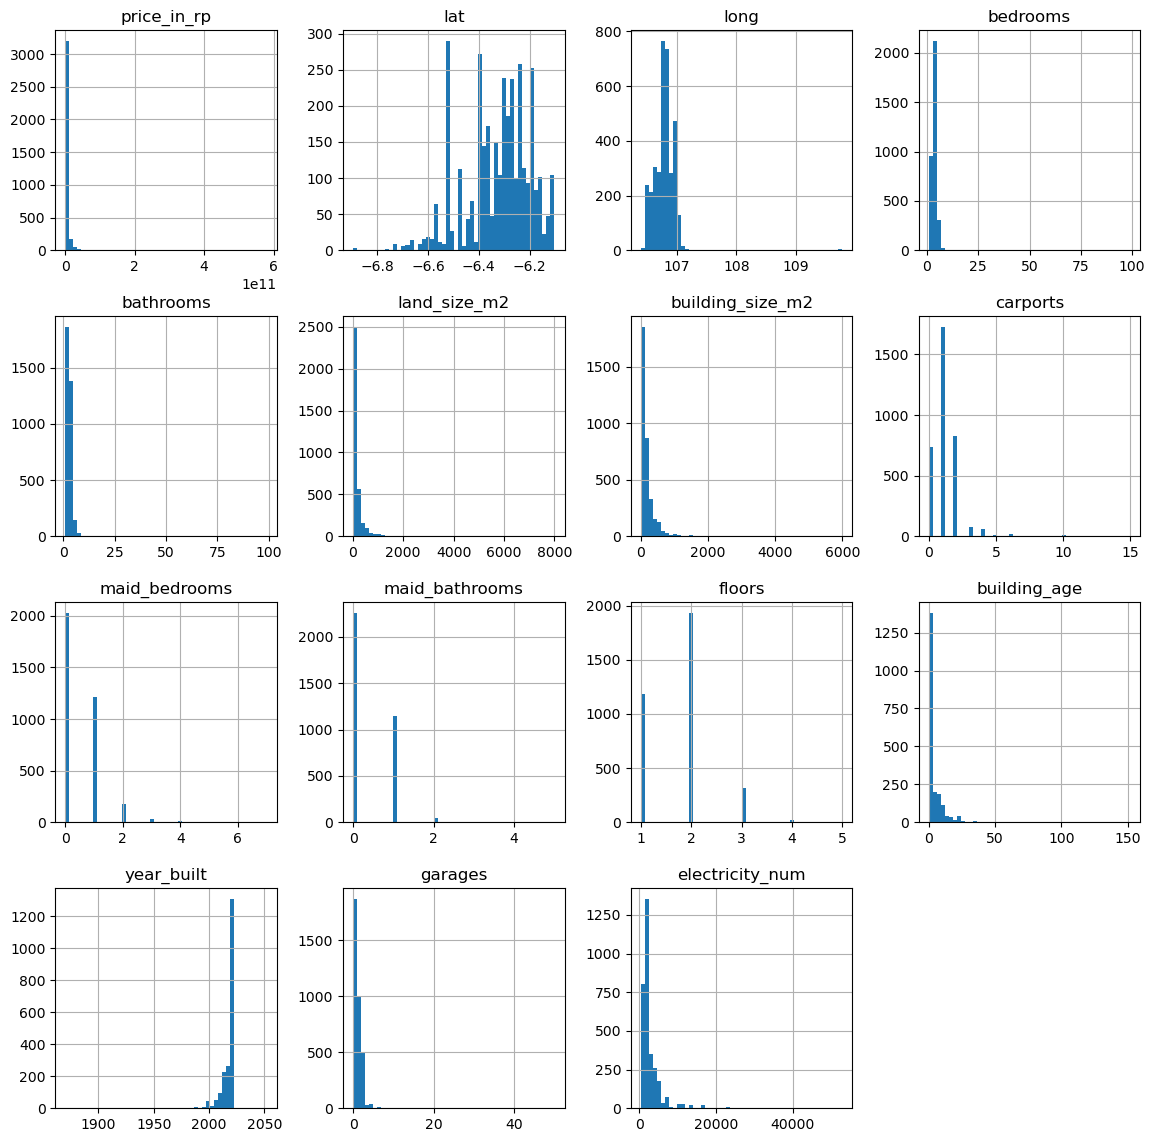

In [26]:
house_df.iloc[:, 0:28].hist(bins=50, figsize=(14, 14))
plt.show()

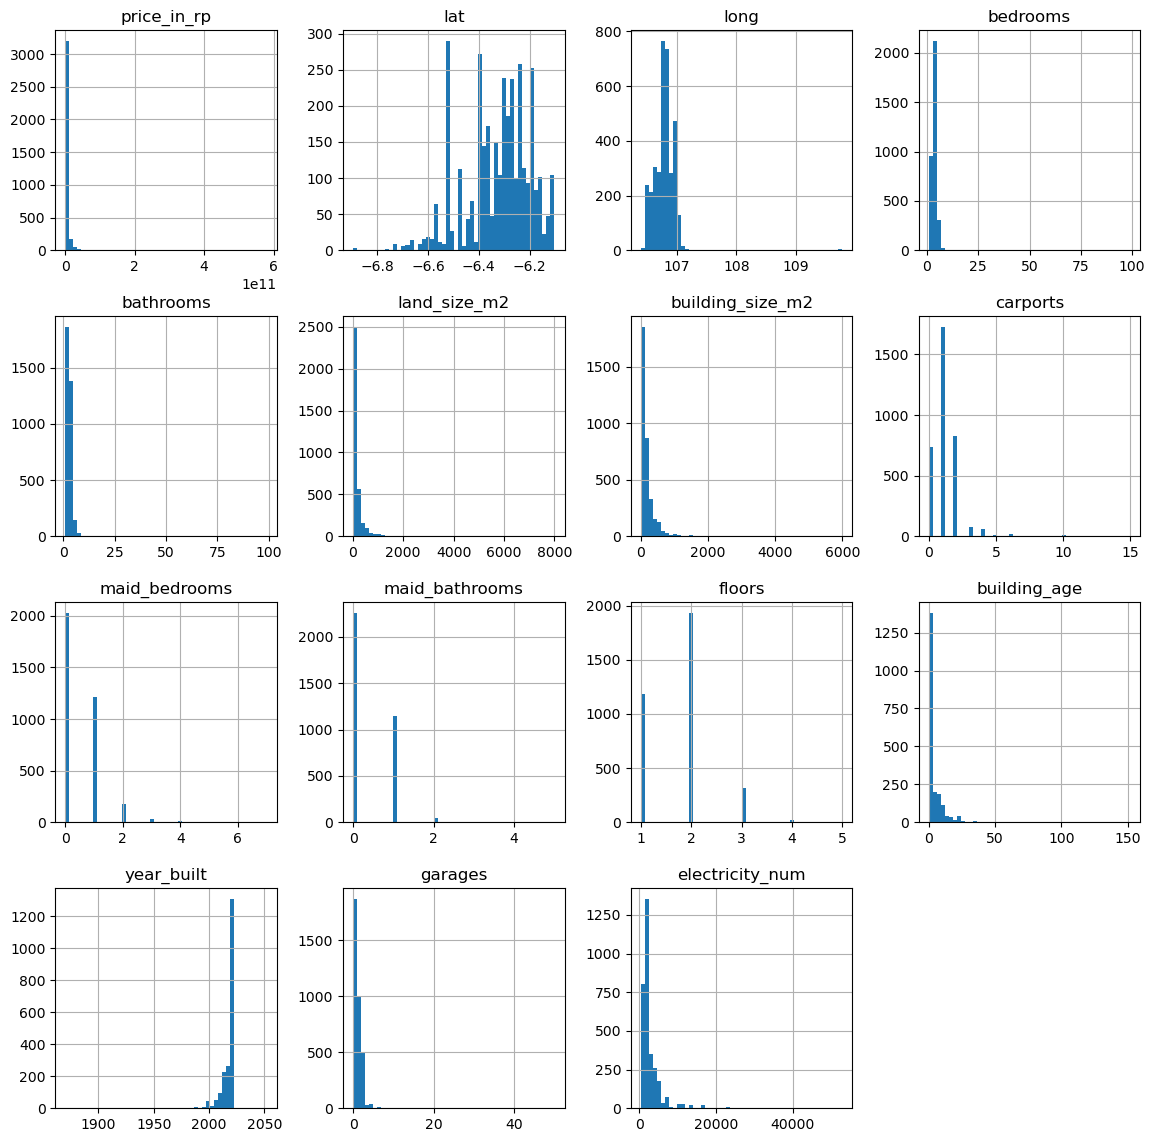

In [27]:
house_df.iloc[:, 0:28].hist(bins=50, figsize=(14, 14))
plt.show()

### penjelasan histogram
datanya kebanyakan condong ke kanan berarti distribusi data memiliki skewness atau kemiringan ke kanan, yang mengindikasikan bahwa sebagian besar nilai berada di sisi kiri (nilai yang lebih rendah) dan ada ekor panjang ke kanan (nilai yang lebih tinggi).

#### Condong ke kanan (Right-skewed) menunjukkan bahwa sebagian besar data terpusat pada nilai yang lebih rendah dengan sedikit nilai yang sangat tinggi.

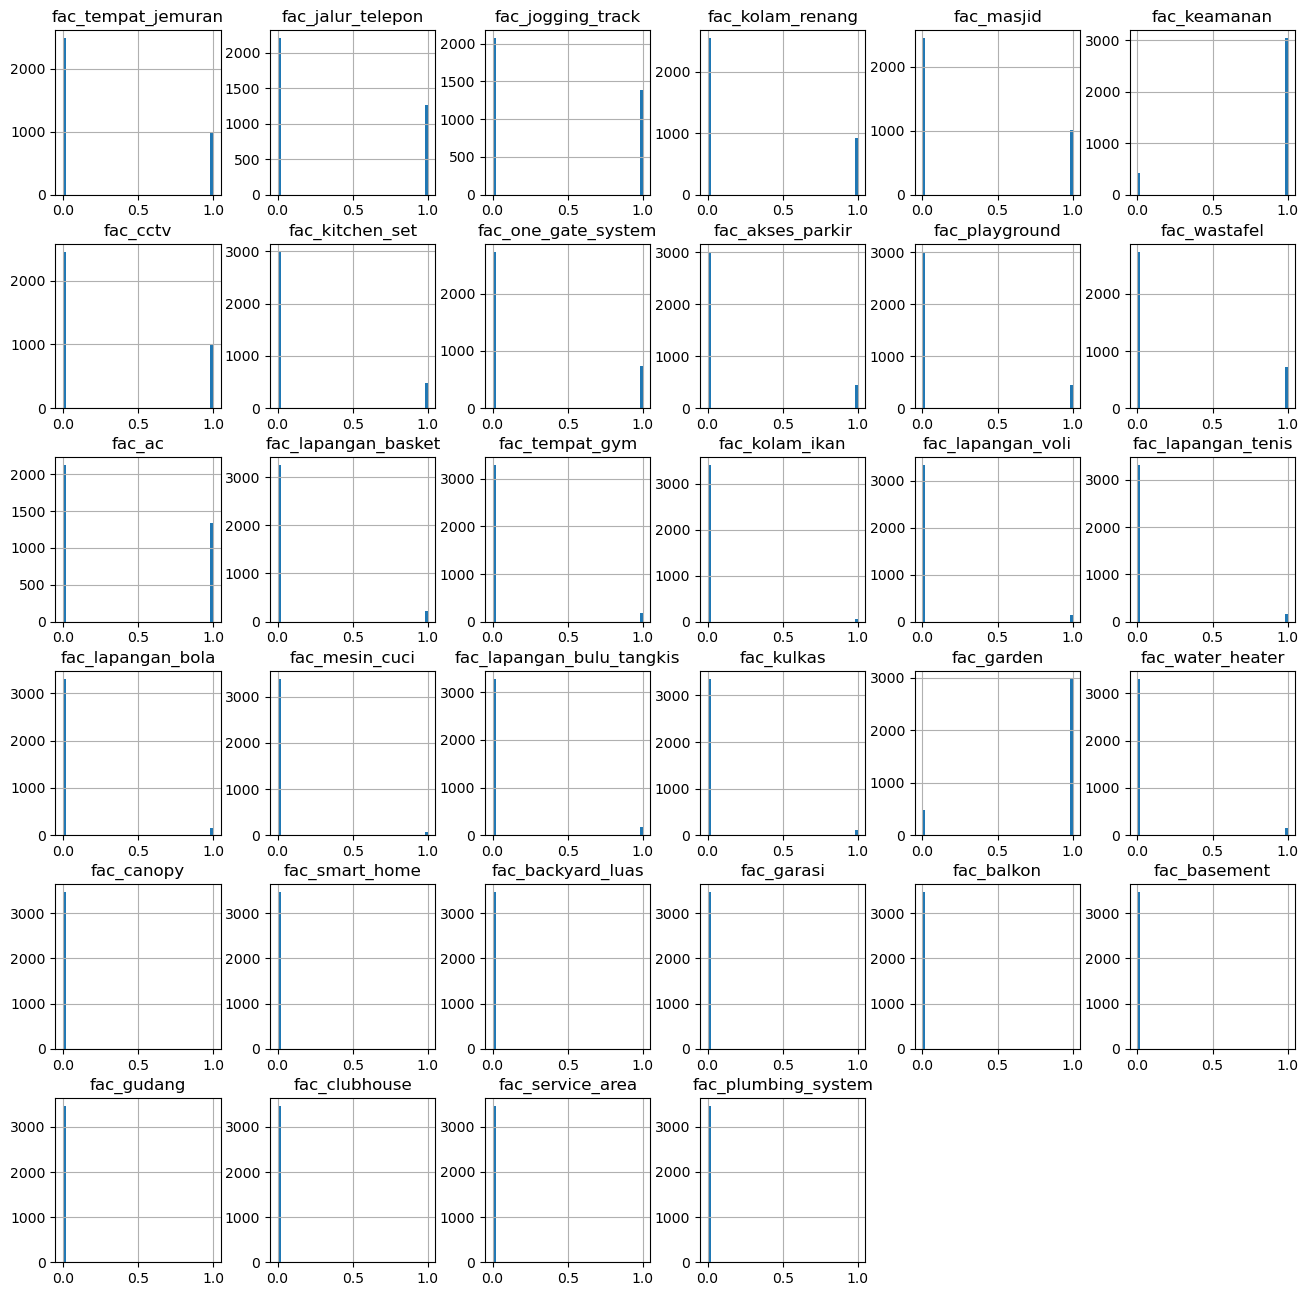

In [28]:
house_df.iloc[:, 28:].hist(bins=50, figsize=(16, 16))
plt.xticks([0, 1])
plt.show()

Mayoritas fasilitas memiliki proporsi keberadaan yang sangat rendah. Misalnya, sebagian besar observasi tidak memiliki fac_plumbing_system dalam catatannya. Variabel-variabel semacam itu kemungkinan besar akan terbukti tidak signifikan sebagai fitur untuk menggeneralisasi dataset.

#### Cek features mencurigakan -- Features Price

In [29]:
{"tags": ["hide-input"]}

house_df[['price_in_rp']].describe(percentiles=[0.5]).T.rename(columns={'50%': 'median'})

count             mean               std           min  \
price_in_rp 3,465.00 4,182,611,544.01 13,884,600,751.69 42,000,000.00   

                      median                max  
price_in_rp 1,500,000,000.00 580,000,000,000.00

- standar deviasi price_in_rp meningkat karena catatan harga maksimum yang besar dan tidak proporsional. Nilai terbesar saat ini adalah Rp. 580 Miliar, angka yang sangat tinggi untuk harga rumah.
- Standar deviasi adalah suatu ukuran statistik yang digunakan untuk menggambarkan seberapa tersebar data dalam sebuah dataset. Secara lebih spesifik, standar deviasi menunjukkan seberapa jauh setiap nilai dalam dataset menyimpang dari nilai rata-rata (mean) dataset tersebut.

- 
Setelah dicek, ternyata di deskripsinya tertulis harga yang harusnya Rp. 5,8 Mili -- pada data scrapping saat cek webnyar.

In [30]:
house_df.loc[house_df.price_in_rp == 580000000000, 'price_in_rp'] = 5800000000

harga minimal = 42jt, seperti tidak make sense buat harga sebuah rumah di jabodetabek

In [31]:
#mencari keberadaan data yang memiliki harga 42jt

minimum_price = house_df.loc[
        house_df.price_in_rp == 42000000, 
        ['url', 'price_in_rp', 'bedrooms', 'land_size_m2', 'building_size_m2', 'floors']
    ]
minimum_price

url   price_in_rp  \
159  https://www.rumah123.com/properti/bekasi/hos11... 42,000,000.00   
340  https://www.rumah123.com/properti/bekasi/hos11... 42,000,000.00   

     bedrooms  land_size_m2  building_size_m2  floors  
159         2         60.00             40.00       1  
340         2         60.00             40.00       1

Ternyata setelah dilihat di website, harga yang ditampilkan adalah harga kredit, bukan harga rumahnya. Oleh karena itu, lebih baik dihapus karena menjadi outlier. Setelah diinspeksi, beberapa data yang kurang diperlukan harus dibersihkan. Tujuannya adalah untuk menghilangkan outlier, high leverage observation, dan Cook's distance.

Pengertian Outlier

Outliers adalah data yang secara signifikan berbeda dari sebagian besar data dalam dataset. Mereka bisa sangat tinggi atau sangat rendah dibandingkan dengan data lainnya. Outliers bisa disebabkan oleh kesalahan pengukuran, kesalahan pencatatan, atau variasi alami dalam data.

Pentingnya Deteksi Outlier:

- Pengaruh pada Analisis Statistik: Outliers dapat mempengaruhi hasil analisis statistik dan model prediktif, sering kali menyebabkan model yang tidak akurat.
- Pembersihan Data: Deteksi outlier membantu dalam memahami dan membersihkan data untuk analisis yang lebih akurat.

Metode Deteksi Outlier:

- Visualisasi:
  - Box plot
  - Scatter plot
- Statistik:
  - Z-score
  - IQR (Interquartile Range)
- Berbasis Model:
  - Deteksi anomali menggunakan modpat ditambahkan di sini.
on dapat ditambahkan di sini.
 kecil tergantung pada ukuran dataset.

In [32]:
# Nilai minimum fixed

house_df = house_df.assign(
    title=house_df.title.str.lower().replace(r'\n', ' ', regex=True).replace('*', '')
    )
title_tag_to_drop = [
    'overkredit', 'over kredit', 'oper kredit', 'operkredit', 
    'takeover', 'take over', 'take oper','oper', 'dioper', 'diover']
price_records_to_drop = [
    42000000, 70000000, 75000000, 85000000, 100000000, 130000000,
    135000000
    ]
url_to_drop = [
    'https://www.rumah123.com/properti/bogor/hos11086291/#qid~a3b85dc6-9dd7-4fa9-9eac-113f4eba7868',
    'https://www.rumah123.com/properti/tangerang/hos11359461/#qid~0d9492e8-7326-465d-85ee-e54559fedc26',
    'https://www.rumah123.com/properti/bogor/hos11351345/#qid~9ab0b10c-8ceb-4c9a-9e7a-479f91a141d1'
    ]
for tag in title_tag_to_drop:
    house_df.drop(
        house_df[house_df.title.str.contains(f'^{tag}\s')].index,
        inplace=True
    )
    house_df.drop(
        house_df[house_df.title.str.contains(f'\s{tag}\s')].index,
        inplace=True
    )
    house_df.drop(
        house_df[house_df.title.str.contains(f'\s{tag}$')].index,
        inplace=True
    )
for price in price_records_to_drop:
    house_df.drop(
        house_df[house_df.price_in_rp == price].index,
        inplace=True)
for url in url_to_drop:
    house_df.drop(
        house_df[house_df.url == url].index,
        inplace=True)
house_df[house_df.url == 'https://www.rumah123.com/properti/bekasi/hos11222131/#qid~aeb345f5-d0dd-46bf-8173-9872e4274ee2']\
    .price_in_rp == 1250000000

house_df[['price_in_rp']].describe(percentiles=[0.5]).T.rename(columns={'50%': 'median'})

count             mean              std            min  \
price_in_rp 3,446.00 4,038,244,631.46 9,873,694,516.03 125,000,000.00   

                      median                max  
price_in_rp 1,500,000,000.00 250,000,000,000.00

#### Cek features mencurigakan -- features Bedrooms & Bathrooms

In [33]:
{"tags": ["hide-input"]}

house_df[['bedrooms', 'bathrooms']].describe(percentiles=[0.5]).T.rename(columns={'50%': 'median'})

count  mean  std  min  median   max
bedrooms  3,414.00  3.34 2.71 1.00    3.00 99.00
bathrooms 3,418.00  2.63 2.73 1.00    2.00 99.00

In [34]:
# cari jumlah berapa banyak kamar dalam data itu 
pd.DataFrame({
    'count':house_df[['bedrooms']].value_counts().sort_index()
}).T

bedrooms  1    2     3    4    5   6   7   8  9  10 11 12 13 16 20 21 36 37  \
count     18  919  1342  780  212  92  14  10  2  5  2  5  2  2  2  1  1  1   

bedrooms 50 54 57 99  
count     1  1  1  1

In [35]:
# cari jumlah berapa banyak kamar mandi dalam data itu 
{"tags": ["hide-input"]}

pd.DataFrame({
    'count':house_df[['bathrooms']].value_counts().sort_index()
}).T

bathrooms   1     2    3    4    5   6   7   8  9  10 11 12 13 15 16 20 21 36  \
count      747  1099  943  434  109  33  20  10  3  3  2  3  1  2  1  2  1  1   

bathrooms 50 54 57 99  
count      1  1  1  1

- .T tu artinya transformasi--Fungsi .T pada DataFrame di Pandas digunakan untuk men-transpose DataFrame, yaitu menukar baris menjadi kolom dan kolom menjadi baris

- jumlah kamar mandi dan kamar tidur lebih banyak = rumahnya juga lebih luas

In [36]:
#cek rumah yang punya kamar tidur >=20

large_bedrooms_inst = house_df.loc[
        house_df.bedrooms >= 20, 
        ['url', 'price_in_rp', 'bedrooms', 'land_size_m2', 'building_size_m2', 'floors']
    ].sort_values('bedrooms')

large_bedrooms_inst

url       price_in_rp  \
2283  https://www.rumah123.com/properti/jakarta-sela... 26,000,000,000.00   
2545  https://www.rumah123.com/properti/jakarta-sela... 27,000,000,000.00   
2282  https://www.rumah123.com/properti/jakarta-sela... 26,000,000,000.00   
346   https://www.rumah123.com/properti/bekasi/hos11...  9,000,000,000.00   
1333  https://www.rumah123.com/properti/bogor/hos109...  2,700,000,000.00   
2483  https://www.rumah123.com/properti/jakarta-sela... 30,000,000,000.00   
2687  https://www.rumah123.com/properti/jakarta-sela... 28,000,000,000.00   
2634  https://www.rumah123.com/properti/jakarta-sela... 11,800,000,000.00   
2888  https://www.rumah123.com/properti/tangerang/ho... 55,000,000,000.00   

      bedrooms  land_size_m2  building_size_m2  floors  
2283        20        915.00            600.00       2  
2545        20      1,195.00            950.00       2  
2282        21        900.00            700.00       2  
346         36        939.00            500.00       1  
1333        37        500.00            350.00       1  
2483        50        517.00          2,417.00       5  
2687        54        890.00          1,800.00       5  
2634        57        491.00          1,500.00       4  
2888        99      1,150.00          6,000.00       4

kesimpulan dari rumah yang punya >=20 kamar adalah rumah kos/hotel

#### Cek features mencurigakan -- Features Land_size and Building Size

In [37]:
{"tags": ["hide-input"]}

house_df[['land_size_m2', 'building_size_m2']].describe(percentiles=[0.5]).T.rename(columns={'50%': 'median'})

count   mean    std   min  median      max
land_size_m2     3,444.00 205.92 406.82 12.00  108.00 8,000.00
building_size_m2 3,444.00 186.91 249.50  1.00  112.50 6,000.00

harusnya ga mungkin si ada rumah yang luas bangunannya cuma semeter- hzzzzzzzzzzzzz---- hapus

In [38]:
house_df.drop(
    house_df[house_df.building_size_m2 == 1].index, inplace=True)

#### Cek features mencurigakan -- Features Gareges

In [39]:
{"tags": ["hide-input"]}

house_df[['garages']].describe(percentiles=[0.5]).T.rename(columns={'50%': 'median'})

count  mean  std  min  median   max
garages 3,445.00  0.71 1.32 0.00    0.00 50.00

In [40]:
{"tags": ["hide-input"]}

pd.DataFrame({
    'count':house_df[['garages']].value_counts().sort_index()
}).T

garages    0    1    2   3   4  5   6  10 12 20 50
count    1864  991  497  31  40  6  10  3  1  1  1

In [41]:
#cek data yang punya >= 50 garasi

large_garages_inst = house_df.loc[
        house_df.garages >= 50, 
        ['url', 'price_in_rp', 'bedrooms', 'land_size_m2', 'building_size_m2', 'floors', 'garages']
    ]

large_garages_inst

url       price_in_rp  \
2888  https://www.rumah123.com/properti/tangerang/ho... 55,000,000,000.00   

      bedrooms  land_size_m2  building_size_m2  floors  garages  
2888        99      1,150.00          6,000.00       4       50

kesimpulan : ternyata rumah kost, 6000 meter gils

### Zeroes and Missing Value


#### Zeroes Records

In [42]:
def show_nans_or_zeroes(data, label: str, filter=None):
    features = list(filter) or list(data.columns)
    total_records = data.shape[0]
    if label == 'nans':
        label_data = (data[features].isna())
    elif label == 'zeroes':
        label_data = (data[features] == 0)
    else:
        raise ValueError('Wrong argument for "label"')
    label_count = label_data.sum()
    label_percent = label_data.mean() * 100
    data_types = data[features].dtypes
    return(
        pd.DataFrame({f'{label} Count'.title(): label_count, 
            f'{label} Percentage (%)'.title(): label_percent,
            'Data Types': data_types
        })
    )
numerical_features = house_df.select_dtypes(exclude=['object', 'category']).columns
show_nans_or_zeroes(house_df, 'zeroes', numerical_features)

Zeroes Count  Zeroes Percentage (%) Data Types
price_in_rp                           0                   0.00    float64
lat                                   0                   0.00    float64
long                                  0                   0.00    float64
bedrooms                              0                   0.00      Int64
bathrooms                             0                   0.00      Int64
land_size_m2                          0                   0.00    float64
building_size_m2                      0                   0.00    float64
carports                            733                  21.28      Int64
maid_bedrooms                      2010                  58.35      Int64
maid_bathrooms                     2239                  64.99      Int64
floors                                0                   0.00      Int64
building_age                       1011                  49.85      Int64
year_built                            0                   0.00      Int64
garages                            1864                  54.11      Int64
electricity_num                       0                   0.00    float64
fac_tempat_jemuran                 2471                  71.73    float64
fac_jalur_telepon                  2197                  63.77    float64
fac_jogging_track                  2066                  59.97    float64
fac_kolam_renang                   2531                  73.47    float64
fac_masjid                         2446                  71.00    float64
fac_keamanan                        420                  12.19    float64
fac_cctv                           2450                  71.12    float64
fac_kitchen_set                    2974                  86.33    float64
fac_one_gate_system                2718                  78.90    float64
fac_akses_parkir                   2994                  86.91    float64
fac_playground                     2996                  86.97    float64
fac_wastafel                       2721                  78.98    float64
fac_ac                             2113                  61.34    float64
fac_lapangan_basket                3226                  93.64    float64
fac_tempat_gym                     3266                  94.80    float64
fac_kolam_ikan                     3386                  98.29    float64
fac_lapangan_voli                  3311                  96.11    float64
fac_lapangan_tenis                 3287                  95.41    float64
fac_lapangan_bola                  3293                  95.59    float64
fac_mesin_cuci                     3367                  97.74    float64
fac_lapangan_bulu_tangkis          3264                  94.75    float64
fac_kulkas                         3336                  96.84    float64
fac_garden                          484                  14.05    float64
fac_water_heater                   3288                  95.44    float64
fac_canopy                         3441                  99.88    float64
fac_smart_home                     3442                  99.91    float64
fac_backyard_luas                  3444                  99.97    float64
fac_garasi                         3443                  99.94    float64
fac_balkon                         3444                  99.97    float64
fac_basement                       3444                  99.97    float64
fac_gudang                         3444                  99.97    float64
fac_clubhouse                      3444                  99.97    float64
fac_service_area                   3443                  99.94    float64
fac_plumbing_system                3440                  99.85    float64

#### Missing Records

In [43]:
show_nans_or_zeroes(house_df, 'nans', numerical_features)

Nans Count  Nans Percentage (%) Data Types
price_in_rp                         0                 0.00    float64
lat                                 0                 0.00    float64
long                                0                 0.00    float64
bedrooms                           32                 0.93      Int64
bathrooms                          28                 0.81      Int64
land_size_m2                        2                 0.06    float64
building_size_m2                    2                 0.06    float64
carports                            0                 0.00      Int64
maid_bedrooms                       0                 0.00      Int64
maid_bathrooms                      0                 0.00      Int64
floors                              6                 0.17      Int64
building_age                     1417                41.13      Int64
year_built                       1417                41.13      Int64
garages                             0                 0.00      Int64
electricity_num                   285                 8.27    float64
fac_tempat_jemuran                  0                 0.00    float64
fac_jalur_telepon                   0                 0.00    float64
fac_jogging_track                   0                 0.00    float64
fac_kolam_renang                    0                 0.00    float64
fac_masjid                          0                 0.00    float64
fac_keamanan                        0                 0.00    float64
fac_cctv                            0                 0.00    float64
fac_kitchen_set                     0                 0.00    float64
fac_one_gate_system                 0                 0.00    float64
fac_akses_parkir                    0                 0.00    float64
fac_playground                      0                 0.00    float64
fac_wastafel                        0                 0.00    float64
fac_ac                              0                 0.00    float64
fac_lapangan_basket                 0                 0.00    float64
fac_tempat_gym                      0                 0.00    float64
fac_kolam_ikan                      0                 0.00    float64
fac_lapangan_voli                   0                 0.00    float64
fac_lapangan_tenis                  0                 0.00    float64
fac_lapangan_bola                   0                 0.00    float64
fac_mesin_cuci                      0                 0.00    float64
fac_lapangan_bulu_tangkis           0                 0.00    float64
fac_kulkas                          0                 0.00    float64
fac_garden                          0                 0.00    float64
fac_water_heater                    0                 0.00    float64
fac_canopy                          0                 0.00    float64
fac_smart_home                      0                 0.00    float64
fac_backyard_luas                   0                 0.00    float64
fac_garasi                          0                 0.00    float64
fac_balkon                          0                 0.00    float64
fac_basement                        0                 0.00    float64
fac_gudang                          0                 0.00    float64
fac_clubhouse                       0                 0.00    float64
fac_service_area                    0                 0.00    float64
fac_plumbing_system                 0                 0.00    float64

features yang plaing banyak missing value = year built

In [44]:
non_numeric_features = house_df.select_dtypes(include=['object', 'category']).columns
show_nans_or_zeroes(house_df, 'nans', non_numeric_features)

Nans Count  Nans Percentage (%) Data Types
url                            0                 0.00     object
title                          0                 0.00     object
address                        0                 0.00     object
district                       0                 0.00     object
city                           0                 0.00     object
facilities                     0                 0.00     object
property_type                  1                 0.03   category
ads_id                         4                 0.12     object
certificate                  140                 4.06   category
electricity                    0                 0.00   category
property_condition           242                 7.02   category
building_orientation        1591                46.18   category
furnishing                   372                10.80   category

## Eksplorasi Data

### Median statistic-Median Price_in_rp

karna tadi waktu menggunakan histogram banyak data yang condong ke kanan (skewnes right), maka dicari mediannya sebagai pusat distribusi harga (nilai tangah for  price_in_rp)


C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


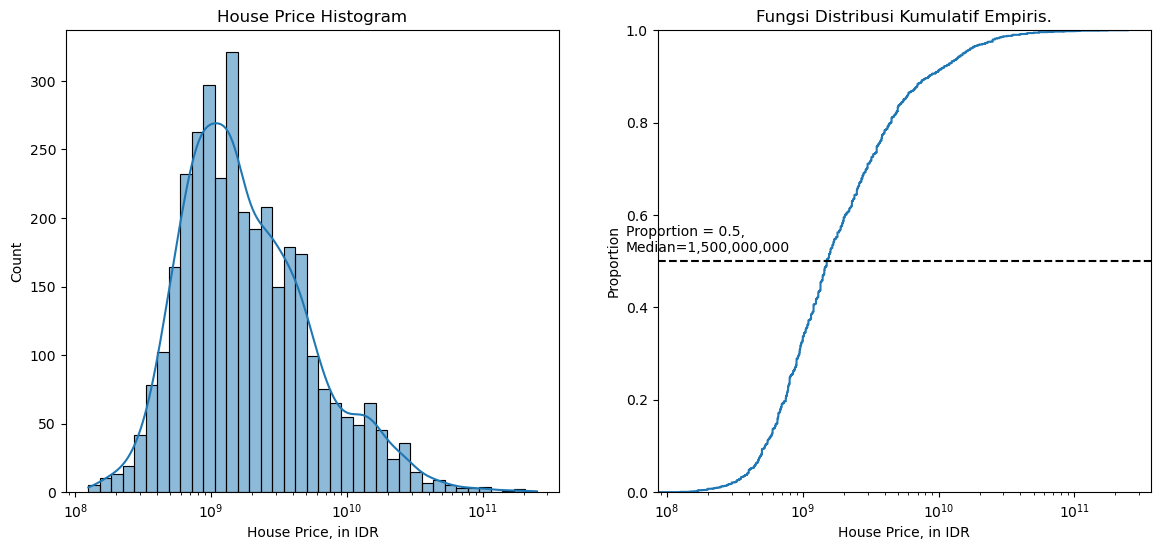

In [45]:
median = house_df['price_in_rp'].median()
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(
    data=house_df, x='price_in_rp', kde=True, 
    log_scale=True, ax=ax[0]
    )
sns.ecdfplot(
    data=house_df, x='price_in_rp', log_scale=True, ax=ax[1]
)
ax[0].set_title('House Price Histogram')
ax[1].axhline(y=0.5, ls='--', color='black')
ax[1].text(x=5e7, y=0.52, s=f'Proportion = 0.5,\nMedian={median:,.0f}')
ax[1].set_title('Fungsi Distribusi Kumulatif Empiris.')
for ax_ in ax:
    ax_.set_xlabel('House Price, in IDR')
plt.show()

- kemiringan ke kanan terlihat jelas setelah penskalaan sumbu log (sebelah kanan)

- Harga median keseluruhan dataset yang mewakili Harga Rumah di Jabodetabek terletak pada Rp. 1.500.000.000 (1,5 miliar rupiah).
- Fungsi Distribusi Kumulatif Empiris" (Empirical Cumulative Density Function, ECDF) adalah representasi statistik dari distribusi kumulatif suatu dataset yang diamati. Ini menggambarkan proporsi atau jumlah data yang kurang dari atau sama dengan nilai tertentu.


C:\Users\HANIN\AppData\Local\Temp\ipykernel_16016\3744569997.py:7: FutureWarning: The provided callable <function median at 0x0000024AC2BDA660> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  .aggregate(np.median)\


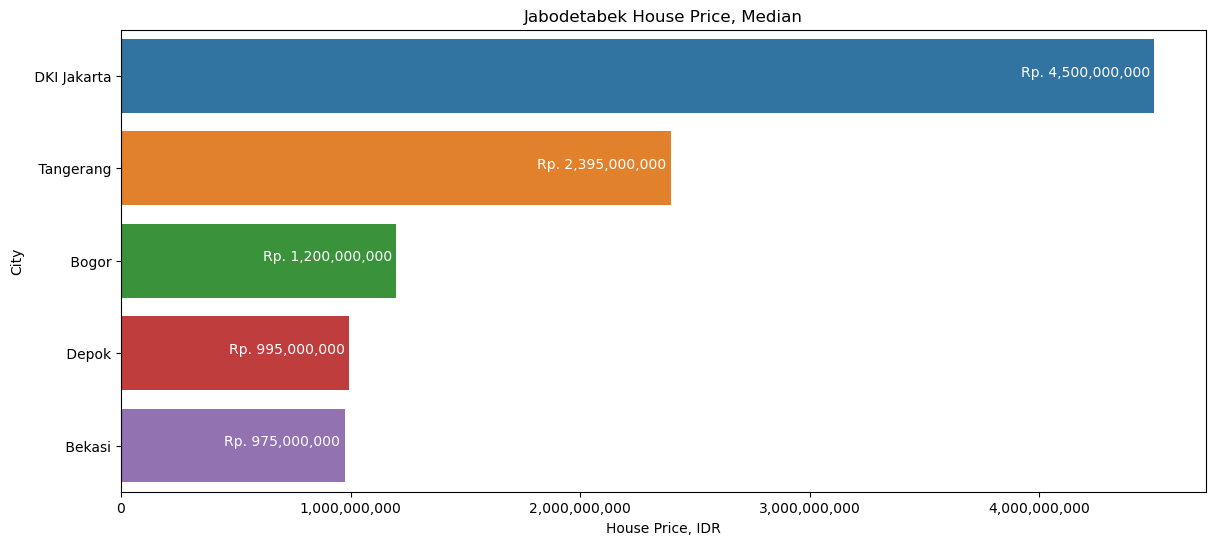

In [46]:
# median harga di masing-masing kota di jabodetabek

house_df_simple = house_df.copy()
house_df_simple.loc[house_df_simple.city.str.contains('Jakarta'), 'city'] = ' DKI Jakarta'
median = house_df_simple[['city', 'price_in_rp']]\
    .groupby('city')\
    .aggregate(np.median)\
    .reset_index()\
    .sort_values('price_in_rp', ascending=False)

# plot_order = list(median.sort_values('price_in_rp', ascending=False).city)
plt.figure(figsize=(14, 6))
sns.barplot(y='city', x='price_in_rp',data=median)
for y, x in enumerate(median.price_in_rp):
    plt.text(x=x, y=y, s=f'Rp. {x:,.0f} ', ha='right', color='white')
plt.title('Jabodetabek House Price, Median')
plt.xlabel('House Price, IDR')
plt.ylabel('City')
current_xticks = plt.xticks()[0][:-1]
plt.xticks(current_xticks, ['{:,.0f}'.format(x) for x in current_xticks])
plt.show()

kesimpulan : median harga di dki jakarta paling tinggi daripada kota lain

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


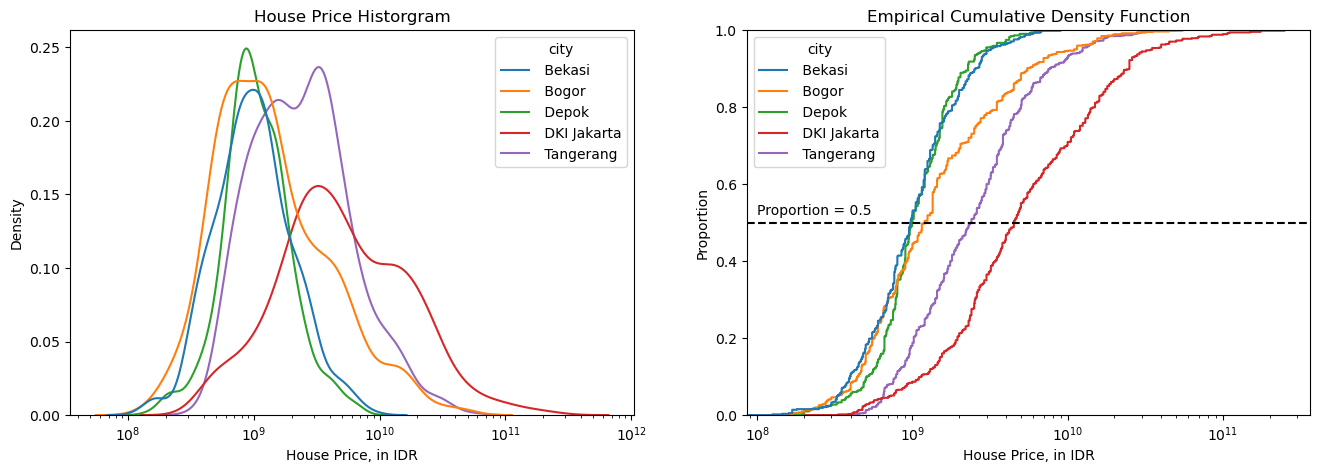

In [47]:
#Distribusi Harga Rumah

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.kdeplot(
    data=house_df_simple, x='price_in_rp',
    log_scale=True, hue='city', ax=ax[0]
    )
sns.ecdfplot(
    data=house_df_simple, x='price_in_rp', 
    log_scale=True, hue='city', ax=ax[1]
    )
ax[0].set_title('House Price Historgram')
ax[1].axhline(y=0.5, ls='--', color='black')
ax[1].text(x=1e8, y=0.52, s=f'Proportion = 0.5')
ax[1].set_title('Empirical Cumulative Density Function')
for ax_ in ax:
    ax_.set_xlabel('House Price, in IDR')
plt.show()

setelah dilakukan distribusi harga ternyata persebarannya antara Bogor, Depok, dan Bekasi juga tipikal (setipe). Namun, wilayah Bogor lebih condong ke kanan, hal ini mungkin menunjukkan bahwa ada beberapa daerah di Bogor yang memiliki harga jauh lebih tinggi dibandingkan kisaran harga pada umumnya.

In [48]:
median_df = \
    house_df\
        .groupby('district')\
        .agg(median_price=('price_in_rp', np.median), 
             unit_count=('price_in_rp', np.count_nonzero),
             median_size=('building_size_m2', np.median)
            )\
        .reset_index()\
        .merge(house_df[['district','city', 'lat', 'long']].drop_duplicates(subset=['district']), on='district')\
        .sort_values('city')
hover_data = {
    'district': True,
    'city': True,
    'lat': False,
    'long': False,
    'median_price': ':,.0f',
    'median_size': ':,.0f',
    'unit_count': True,
    }    
fig = px.scatter_mapbox(
    median_df, lat='lat', lon='long', 
    color='city', size=(median_df.median_price / 10e3),
    hover_data=hover_data, hover_name='district', 
    )
fig.update_layout(
    title='Jabodetabek House Price Map',
    mapbox_style="carto-darkmatter",            
    autosize=True,
    hovermode='closest', 
    )
fig.show(renderer='iframe')

C:\Users\HANIN\AppData\Local\Temp\ipykernel_16016\1204116187.py:4: FutureWarning: The provided callable <function median at 0x0000024AC2BDA660> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  .agg(median_price=('price_in_rp', np.median),
C:\Users\HANIN\AppData\Local\Temp\ipykernel_16016\1204116187.py:4: FutureWarning: The provided callable <function median at 0x0000024AC2BDA660> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  .agg(median_price=('price_in_rp', np.median),


Dalam konteks ini, ukuran gelembung (bubbles) yang lebih besar menunjukkan beberapa hal tergantung pada konteks data yang diwakilinya:

1. **Statistik Median:**
   - Jika gelembungnya lebih besar, ini bisa berarti bahwa nilai median dari data di distrik tersebut relatif lebih tinggi dibandingkan dengan distrik lainnya. Dalam konteks ini, ukuran gelembung mencerminkan distribusi harga rumah di setiap distrik.

2. **Jumlah Unit:**
   - Gelembung yang lebih besar juga dapat menunjukkan jumlah unit properti yang lebih banyak di distrik tersebut. Artinya, distrik tersebut mungkin memiliki lebih banyak properti yang dipantau atau dievaluasi dalam analisis.

3. **Representasi Visual:**
   - Secara visual, gelembung yang lebih besar akan menonjol lebih jelas dan menarik perhatian pengamat. Hal ini memungkinkan pengguna untuk dengan cepat melihat perbedaan dalam ukuran atau statistik lain yang diwakili oleh gelembung, seperti median harga atau jumlah unit.

Jadi, secara umum, gelembung yang lebih besar dalam visualisasi data seperti ini menunjukkan ukuran relatif yang lebih besar dalam beberapa dimensi data yang diwakilinya.

### DKI Jakarta House Price

C:\Users\HANIN\AppData\Local\Temp\ipykernel_16016\1466240840.py:4: FutureWarning:

The provided callable <function median at 0x0000024AC2BDA660> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.



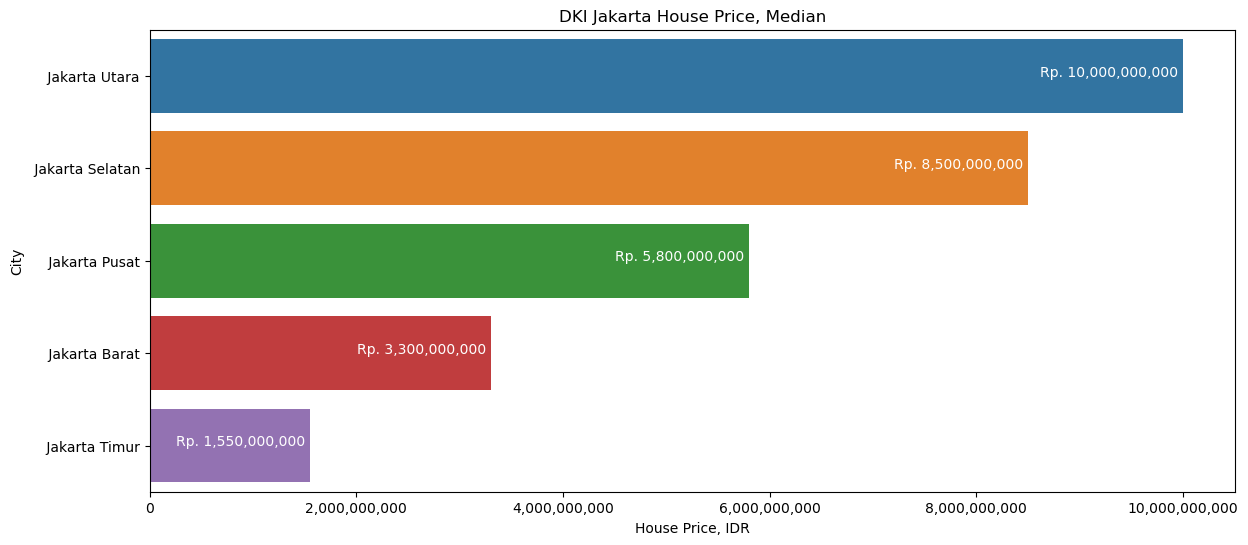

In [49]:
house_df_jakarta = house_df[house_df.city.str.contains('Jakarta')]
median = house_df_jakarta[['city', 'price_in_rp']]\
    .groupby('city')\
    .aggregate(np.median)\
    .reset_index()\
    .sort_values('price_in_rp', ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(y='city', x='price_in_rp',data=median)
for y, x in enumerate(median.price_in_rp):
    plt.text(x=x, y=y, s=f'Rp. {x:,.0f} ', ha='right', color='white')
plt.title('DKI Jakarta House Price, Median')
plt.xlabel('House Price, IDR')
plt.ylabel('City')
current_xticks = plt.xticks()[0][:-1]
plt.xticks(current_xticks, ['{:,.0f}'.format(x) for x in current_xticks])
plt.show()

kesimpulan : jakarta utara punya median price paling tinggi, dan jakarta timur paling rendah-- harga terendahnya hampir mirip sama harga terendah di kota bogor,depok, dan bekasi

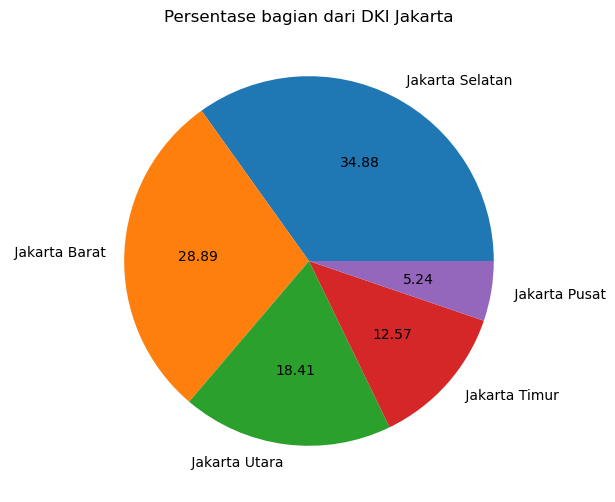

In [50]:
{"tags": ["hide-input"]}

fig, ax = plt.subplots(figsize=(12, 6))
house_df_jakarta.city.value_counts().plot.pie(autopct="%.2f", ax=ax)
ax.set_ylabel('')
ax.set_title('Persentase bagian dari DKI Jakarta')
plt.show()

bagian jatim lebih kecil jadi kemungkinan harganya lebih rendah karna itu(??)--tapi jakpus yang paling kecil punya median harga yang lebih tinggi-- ya karna pusatnya ga si mungkin aaaaaaa

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



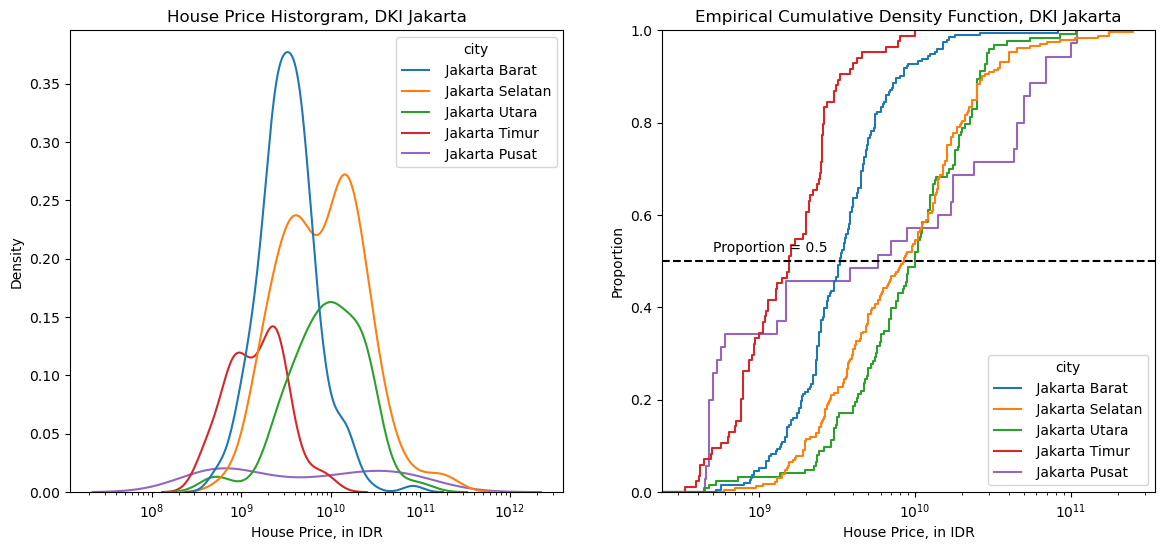

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.kdeplot(
    data=house_df_jakarta, x='price_in_rp',
    log_scale=True, hue='city', ax=ax[0]
    )
sns.ecdfplot(
    data=house_df_jakarta, x='price_in_rp', 
    log_scale=True, hue='city', ax=ax[1]
)
ax[0].set_title('House Price Historgram, DKI Jakarta')
ax[1].axhline(y=0.5, ls='--', color='black')
ax[1].text(x=5e8, y=0.52, s=f'Proportion = 0.5')
ax[1].set_title('Empirical Cumulative Density Function, DKI Jakarta')
for ax_ in ax:
    ax_.set_xlabel('House Price, in IDR')


- Fungsi Kepadatan Kumulatif Empiris (Empirical Cumulative Distribution Function, ECDF) adalah fungsi statistik yang memberikan perkiraan probabilitas bahwa variabel acak akan memiliki nilai kurang dari atau sama dengan suatu nilai tertentu.
- Dalam konteks DKI Jakarta, ECDF dapat digunakan untuk menganalisis distribusi dari berbagai data, seperti harga rumah, pendapatan penduduk, atau data lainnya yang relevan dengan kota tersebut.
- ECDF memberikan gambaran tentang sebaran atau distribusi data, membantu untuk memahami karakteristik dan perilaku dari dataset tersebut dalam konteks DKI Jakarta.
  
Distribusi harga rumah di Jakarta Pusat menunjukkan pola yang mirip dengan distribusi yang merata, yang tidak umum dalam distribusi harga rumah. Pengamatan di Jakarta Pusat tidak cukup meliputi untuk mewakili distribusi harga rumah di sana.

Kesimpulan tentang keterbatasan pengamatan DKI Jakarta adalah sebagai berikut:

- Ketidakcukupan cakupan untuk Jakarta Pusat, Jakarta Timur, dan Jakarta Utara menghasilkan analisis atau justifikasi yang kurang sesuai yang melibatkan kota-kota tersebut.
- Analisis lebih lanjut dari kota-kota tersebut dianggap tepat jika lebih banyak data dapat diperoleh, diikuti dengan justifikasi cakupan yang menyeluruh hingga dianggap cukup mewakili populasi sebenarnya.
- Untuk memaksimalkan ruang lingkup analisis ini, kami masih akan mempertimbangkan semua kota di DKI Jakarta selain Jakarta Pusat jika terbukti secara statistik signifikan, karena distribusi mereka masih cukup logis.
- Perhatikan bahwa keterbatasan di atas akan diakui jikadi DKI Jakarta.iperlukan.erlukan.

---


#### Kesimpulan JABODETABEK Median House Price

Menentukan interval estimasi dalam bentuk high confidence level untuk menganalisis kepresisian dan keandalan statistik median kita. High confidence level menjelaskan rentang nilai yang masuk akal dari perkiraan populasi berdasarkan data kita untuk menyimpulkan seberapa dekatnya dengan nilai median sebenarnya.

Informasi tentang kepresisian interval estimasi disampaikan oleh lebar interval:

- High confidence level yang diikuti oleh interval yang cukup sempit menunjukkan bahwa dataset memberikan pengetahuan yang cukup presisi tentang parameter tersebut.
- Confidence level yang lebar menunjukkan bahwa ada banyak ketidakpastian mengenai nilai yang 
imasi tersebut.

In [52]:
{"tags": ["hide-input"]}

house_df[['price_in_rp']].describe(percentiles=[0.5]).T.rename(columns={'50%': 'median'})

count             mean              std            min  \
price_in_rp 3,445.00 4,034,482,148.04 9,872,656,878.52 125,000,000.00   

                      median                max  
price_in_rp 1,500,000,000.00 250,000,000,000.00


---

#### Menentukan Interval Confidence Level untuk Statistik Median

Untuk menentukan interval confidence level dari statistik median, terdapat beberapa metode non-parametrik yang tersedia yang dapat kita gunakan, yang dikenal cukup kuat untuk memperkirakan interval median. Dalam analisis ini, kita akan mempertimbangkan:

1. **Estimator Maritz-Jarrett (MJ)**
2. **Interpolasi Hettmansperger-Sheather (HS)**
3. **Bootstrapping median dari dataset**

Berikut adalah penjelasan masing-masing metode:

- **Metode HS** didasarkan pada interpolasi dari pengamatan yang diurutkan dalam dataset, sehingga nilai interval harus merupakan salah satu pengamatan yang disertakan dalam dataset.
  
- **Confidence level bootstrapping** didasarkan pada distribusi bootstrapping, di mana kita menggambar berulang kali dari sampel untuk mencoba merepresentasikan apa yang diketahui pengguna tentang populasi yang mendasarinya. Keandalan bootstrapping dipengaruhi oleh seberapa dekat sampel asli mewakili seluruh distribusi.

- **Metode MJ** menggunakan kesalahan standar kuantil yang diestimasi, sehingga nilai mungkin bukan merupakan bagian dari dataset.

Mari kita tentukan interval untuk masing-masing metode di atas berdasarkan tingkat keptingkat kepercayaan 95%.

In [53]:
#mengestimasi median atau kuantil dari distribusi data-- melihat confidence interval (ci) dari masing2 metode non parametrik yang digunakan
# yaitu 'Maritz-Jarrett', 'Hetmasperger-Sheather', 'Bootstrap CI'

median = np.median(house_df.price_in_rp)
price_data = house_df.price_in_rp.values
median_ci_mj = [
    float(ci) for ci in mquantiles_cimj(
        data=price_data,
        prob=[0.5],
        alpha=0.05)
    ]
median_ci_hs = median_cihs(
        data=price_data,
        alpha=0.05
        )
median_ci_bootstrap = [
    float(ci) for ci in bootstrap(
        data=(price_data, ), method='percentile',
        statistic=np.median, random_state=99).confidence_interval
    ]
median_ci = [
    {'method': method, 'median':median, 'ci_lower': ci[0], 'ci_upper': ci[1]}\
        for method, median, ci in zip(
            ['Maritz-Jarrett', 'Hetmasperger-Sheather', 'Bootstrap CI'],
            [i for i in itertools.repeat(median, 3)],
            [median_ci_mj, median_ci_hs, median_ci_bootstrap]
            )
    ]

pd.DataFrame(median_ci)

method           median         ci_lower         ci_upper
0         Maritz-Jarrett 1,500,000,000.00 1,436,204,280.83 1,563,795,719.17
1  Hetmasperger-Sheather 1,500,000,000.00 1,450,000,000.00 1,590,000,000.00
2           Bootstrap CI 1,500,000,000.00 1,450,000,000.00 1,590,000,000.00


---

- `median = np.median(house_df.price_in_rp)`: Menghitung nilai median dari data harga rumah.
- `price_data = house_df.price_in_rp.values`: Mengambil nilai harga rumah sebagai array.
- `median_ci_mj`: Menghitung interval kepercayaan median menggunakan metode Maritz-Jarrett.
- `median_ci_hs`: Menghitung interval kepercayaan median menggunakan metode Hettmansperger-Sheather.
- `median_ci_bootstrap`: Menghitung interval kepercayaan median menggunakan metode Bootstrapping CI.

Sebagai contoh hasil:

> "With 95% confidence level, based on the provided dataset, the median estimate of Jabodetabek House Price is 1,500,000 rupiahs with a margin of error no more than ±90,000,000 rupiahs."

Kesalahan ini cukup rendah, kurang dari 10% dari estimasi kita.

- `median_ci`: Menggabungkan semua hasil perhitungan ke dalam satu DataFrame.
- DataFrame akhir akan berisi kolom `method` yang menunjukkan metode yang digunakan, `median` yang berisi nilai median, `ci_lower` yang merupakan batas bawah interval kepercayaan, dan `ci_upper` yang merupakan batas atas interval kepercayaan.

Ini adalah pendekatan yang umum digunakan untuk mengevaluasi interval kepercayaan dari median dalam adalam bentuk DataFrame.is data.

### Menguji Reliabilitas Estimasi Interval

Cara memastikan confidence interval is good enough:

Kita dapat mensimulasikan probabilitas cakupan dari estimasi interval. Probabilitas cakupan menunjukkan bahwa, jika kita mengambil sampel dari populasi secara berulang-ulang, maka dari semua sampel, berapa probabilitas bahwa interval kepercayaan yang kita tentukan dari sampel-sampel tersebut mengandung statistik sebenarnya dari populasi.

Untuk mensimulasikan probabilitas cakupan:

1. Ambillah n sampel berulang kali dari sebuah populasi. Sebagian besar waktu kita tidak mengetahui nilai sebenarnya dari statistik populasi tersebut. Dengan membentuk populasi teoretis, kita kemudian dapat "mengetahui", misalnya, median dari populasi tersebut.
2. Hitunglah probabilitas cakupan sebagai berikut:

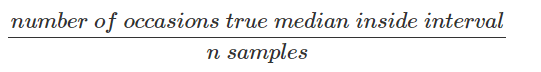

Kami akan mendekati distribusi populasi kami dengan menggunakan distribusi teoretis yang meniru karakteristik kumpulan data kami. Oleh karena itu, Distribusi Teoritis akan diperkirakan dari dataset kami menggunakan metode Gaussian KDE sebabmbantu pemahaman.erikut

In [54]:
# price_data = house_df.price_in_rp.values
#Kernel Density Estimation adalah metode non-parametrik untuk memperkirakan distribusi probabilitas dari suatu data. 
#KDE memberikan gambaran yang halus dari distribusi data dengan menggunakan fungsi kernel untuk menghaluskan setiap titik data individu. 
#Kernel Gaussian adalah salah satu jenis kernel yang sering digunakan dalam KDE.

from scipy.stats import gaussian_kde

density = gaussian_kde(price_data)

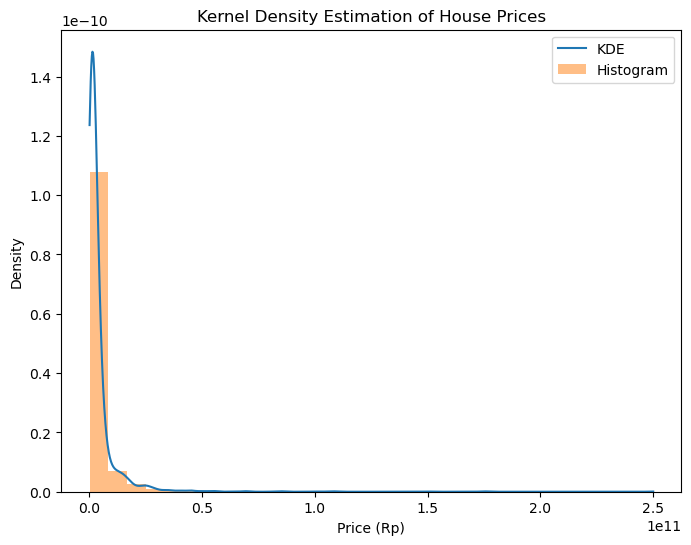

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Menghasilkan rentang nilai untuk evaluasi kepadatan
x = np.linspace(min(price_data), max(price_data), 1000)

# Mengevaluasi kepadatan pada rentang nilai tersebut
kde_values = density(x)

# Membuat plot dari estimasi kepadatan
plt.figure(figsize=(8, 6))
plt.plot(x, kde_values, label='KDE')
plt.hist(price_data, bins=30, density=True, alpha=0.5, label='Histogram')
plt.xlabel('Price (Rp)')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of House Prices')
plt.legend()
plt.show()




---

Setelah kita memperkirakan distribusi teoritisnya, kita dapat menentukan median sebenarnya dari distribusi tersebut. Kita tahu bahwa median adalah persentil ke-50 dari suatu distribusi, dan kita akan menggunakan program optimasi dari scipy untuk menghitung persentil 50% tersebut.

Saya menggunakan fungsi `root_scalar`, yang merupakan metode iteratif pemecah akar untuk menemukan solusi suatu fungsi. Dengan menggunakan metode iteratif ini, kita tidak perlu mengetahui turunan dari fungsi tersebut untuk menyelesaikannya.

Persentil ke-50 adalah saat nilai fungsi distribusi kumulatif (CDF) sama dengan 0.5. Jadi, saya membuat fungsi skalar (fungsi yang mengembalikan skalar) yang memodelkan perbedaan antara nilai CDF dan 0.5, lalu mencari akar dari fungsi tersebut.

Dengan cara ini, kita dapat menemukan nilai median dari distribusi teoritis tanpa perlu mengetahui distribusi secara ecara langsung.sep di atas:

In [56]:
from scipy.optimize import root_scalar

def get_cdf(upper_bound):
    density = gaussian_kde(price_data)
    return (density.integrate_box(-np.inf, upper_bound) - 0.5)

solver = root_scalar(get_cdf, method='secant',  xtol=10e-5, x0=1500000000, x1=1600000000)
print('Median: Rp. {:,.2f}'.format(solver.root))

Median: Rp. 2,145,251,456.29


Distribusi teoritis hanya digunakan untuk pengambilan sampel berulang kali, berfungsi sebagai distribusi yang meniru karakteristik populasi kita.

Kode di bawah ini mensimulasikan pengambilan sampel, lalu menghitung probabilitas cakupan, menggunakan berbagai jumlah pengamatan yang dimiliki setiap sampel (berbagai ukuran sampel).

Dengan menggunakan kode di bawah ini, kami mendemonstrasikan pengambilan sampel berulang kali sekitar 1000 kali. Metode kokoh akan memberikan nilai mendekati interval kepercayaan nominal, yang ditetapkan sebesar 95% dalam analisis ini.

---
**Penjelasan Kode:**

`CoverageProba` digunakan untuk mensimulasikan pengambilan sampel dari suatu dataset berulang kali dan menghitung probabilitas cakupan dari interval kepercayaan median menggunakan tiga metode berbeda: Median Jackknife (MJ), Harrell-Davis (HS), dan Bootstrap.

**Inisialisasi Kelas `CoverageProba`**

- **`__init__` Method:**
  - Inisialisasi kelas dengan dataset, tingkat signifikansi 𝛼, dan berbagai ukuran sampel.
  - Menggunakan Gaussian KDE untuk memperkirakan distribusi dari dataset.
  - Menghitung median dari distribusi teoretis menggunakan metode secant dari `root_scalar`.
  - Inisialisasi list untuk menyimpan probabilitas cakupan dari tiga metode yang berbeda.

**Metode `get_proba`**

- **`get_proba` Method:**
  - Mensimulasikan pengambilan sampel berulang kali sebanyak n_iterate untuk setiap ukuran sampel dalam self._n_sample.
  - Menghitung interval kepercayaan median menggunakan tiga metode yang berbeda.
  - Mengembalikan DataFrame yang berisi ukuran sampel dan probabilitas cakupan untuk setiap metode.

**Metode untuk Menghitung Interval Kepercayaan**

- **`_median_ci_mj` Method:**
  - Menghitung interval kepercayaan median menggunakan metode Median Jackknife (MJ) untuk suatu sampel.
  - Memeriksa apakah median dari dataset asli berada dalam interval kepercayaan yang dihitung.

- **`_median_ci_hs` Method:**
  - Menghitung interval kepercayaan median menggunakan metode Harrell-Davis (HS) untuk suatu sampel.
  - Memeriksa apakah median dari dataset asli berada dalam interval kepercayaan yang dihitung.

- **`_median_ci_bootstrap` Method:**
  - Menghitung interval kepercayaan median menggunakan metode Bootstrap untuk suatu sampel.
  - Memeriksa apakah median dari dataset asli berada dalam interval kepercayaan yang dihitung.

**Fungsi CDF**

- **`_get_cdf` Method:**
  - Menghitung fungsi distribusi kumulatif (CDF) untuk mencari median dari distribusi teoretis.

**Kesimpulan**

Kode ini bertujuan untuk memverifikasi keandalan metode penentuan interval kepercayaan untuk median dari dataset dengan melakukan simulasi pengambilan sampel berulang kali. Dengan membandingkan probabilitas cakupan dari berbagai metode dan ukuran sampel, kita dapat mengevaluasi seberapa baik metode tersebut dalam menangkap parameter sebenarnya dari populasi.an dari distribusi teoretis.

#### We will use hs to determine interval estimate of median price, since bootstrap involves more computation.

For Jabodetabek house price:

In [57]:
def median_ci_hs(array, alpha=0.05, output='upper'):
    ci_l, ci_h = median_cihs(
            data=array,
            alpha=alpha
            )
    if output =='lower':
        return ci_l
    return ci_h

def get_ci_df(df):
    df_ = df.copy()
    return (df_[['city', 'price_in_rp']]\
        .groupby('city')\
        .aggregate(
            median=pd.NamedAgg(column='price_in_rp', aggfunc=np.median),
            ci_lower = pd.NamedAgg(column='price_in_rp', aggfunc=lambda x: median_ci_hs(x, output='lower')),
            ci_upper = pd.NamedAgg(column='price_in_rp', aggfunc=lambda x: median_ci_hs(x)))\
        .reset_index()\
        .sort_values('median')
        )

house_df_simple = house_df.copy()
house_df_simple.loc[house_df_simple.city.str.contains('Jakarta'), 'city'] = ' DKI Jakarta'  
median_ci_jabodetabek = get_ci_df(house_df_simple)

median_ci_jabodetabek

C:\Users\HANIN\AppData\Local\Temp\ipykernel_16016\3732201577.py:14: FutureWarning:

The provided callable <function median at 0x0000024AC2BDA660> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.



city           median         ci_lower         ci_upper
0        Bekasi   975,000,000.00   920,000,000.00 1,050,000,000.00
3         Depok   995,000,000.00   945,000,000.00 1,070,686,822.87
1         Bogor 1,200,000,000.00 1,090,403,259.36 1,350,000,000.00
4     Tangerang 2,395,000,000.00 2,154,472,505.05 2,600,000,000.00
2   DKI Jakarta 4,500,000,000.00 4,000,000,000.00 4,950,000,000.00

Kode tersebut berfungsi untuk menghitung median dan interval kepercayaan (CI) untuk harga rumah di area Jabodetabek (Jakarta, Bogor, Depok, Tangerang, Bekasi). 

1. Fungsi `median_ci_hs`: Menghitung interval kepercayaan untuk median menggunakan metode Hettmansperger-Sheather.
2. Fungsi `get_ci_df`: Menghasilkan DataFrame yang berisi median, CI bawah, dan CI atas untuk setiap kota dalam Jabodetabek.
3. Variabel `house_df_simple`: DataFrame rumah dengan kolom kota yang disederhanakan, menyatukan semua data kota Jakarta menjadi "DKI Jakarta".
4. `median_ci_jabodetabek`: DataFrame hasil dari `get_ci_df` untuk data rumah di Jabodetabek.

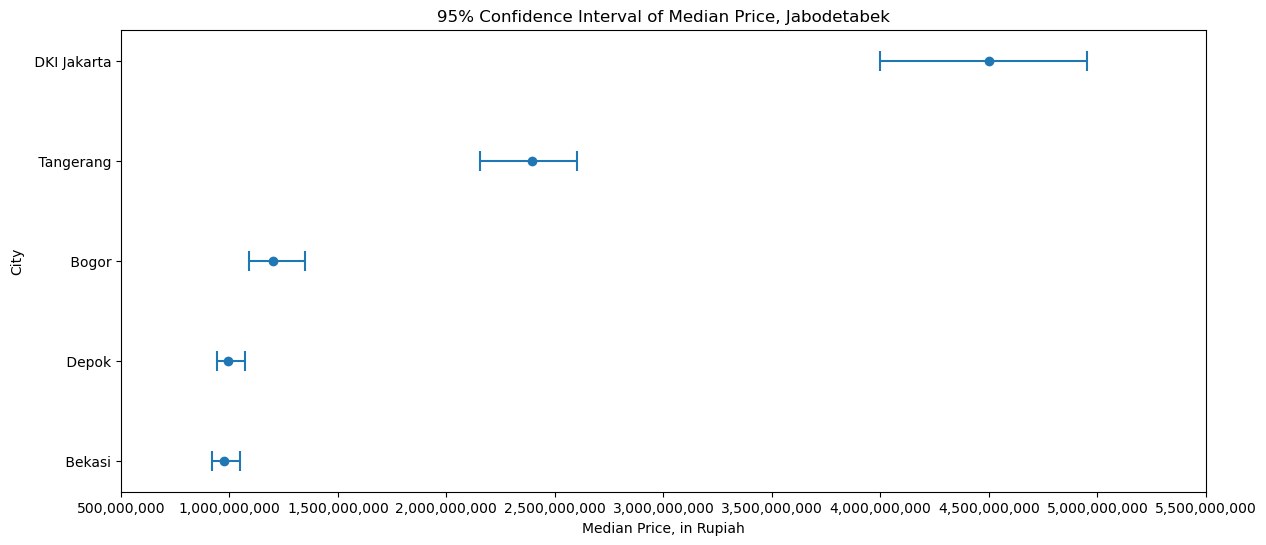

In [58]:
def plot_ci(df, title):
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))
    ax.hlines(y=df.city, xmin=df.ci_lower, xmax=df.ci_upper)
    y_ticks = np.array(ax.get_yticks())
    x_ticks = ax.get_xticks()
    x_ticks = x_ticks.copy()[x_ticks.copy() >= 0]
    ax.vlines(x=df.ci_lower, ymin=(y_ticks - (len(y_ticks) * 0.02)), ymax=(y_ticks + (len(y_ticks) * 0.02)))
    ax.vlines(x=df.ci_upper, ymin=(y_ticks - (len(y_ticks) * 0.02)), ymax=(y_ticks + (len(y_ticks) * 0.02)))
    ax.scatter(x=df['median'], y=df.city)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(['{:,.0f}'.format(xtick) for xtick in x_ticks])
    ax.set_title(f'95% Confidence Interval of Median Price, {title}')
    ax.set_xlabel('Median Price, in Rupiah')
    ax.set_ylabel('City')

plot_ci(median_ci_jabodetabek, 'Jabodetabek')

kesimpulan :dki jakarta punya rentang interval paling bersar daripada kota lainnya

kode di bawah : ngeinspect interval estimate dki jkt

In [59]:
{"tags": ["hide-input"]}

median_ci_jakarta = get_ci_df(house_df_jakarta)
median_ci_jakarta

C:\Users\HANIN\AppData\Local\Temp\ipykernel_16016\3732201577.py:14: FutureWarning:

The provided callable <function median at 0x0000024AC2BDA660> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.



city            median         ci_lower          ci_upper
3     Jakarta Timur  1,550,000,000.00 1,123,907,782.14  2,036,207,490.18
0     Jakarta Barat  3,300,000,000.00 2,871,827,173.85  3,728,172,826.15
1     Jakarta Pusat  5,800,000,000.00   812,627,444.89 17,500,000,000.00
2   Jakarta Selatan  8,500,000,000.00 6,250,000,000.00 10,687,341,965.65
4     Jakarta Utara 10,000,000,000.00 7,535,086,312.49 11,824,568,437.56

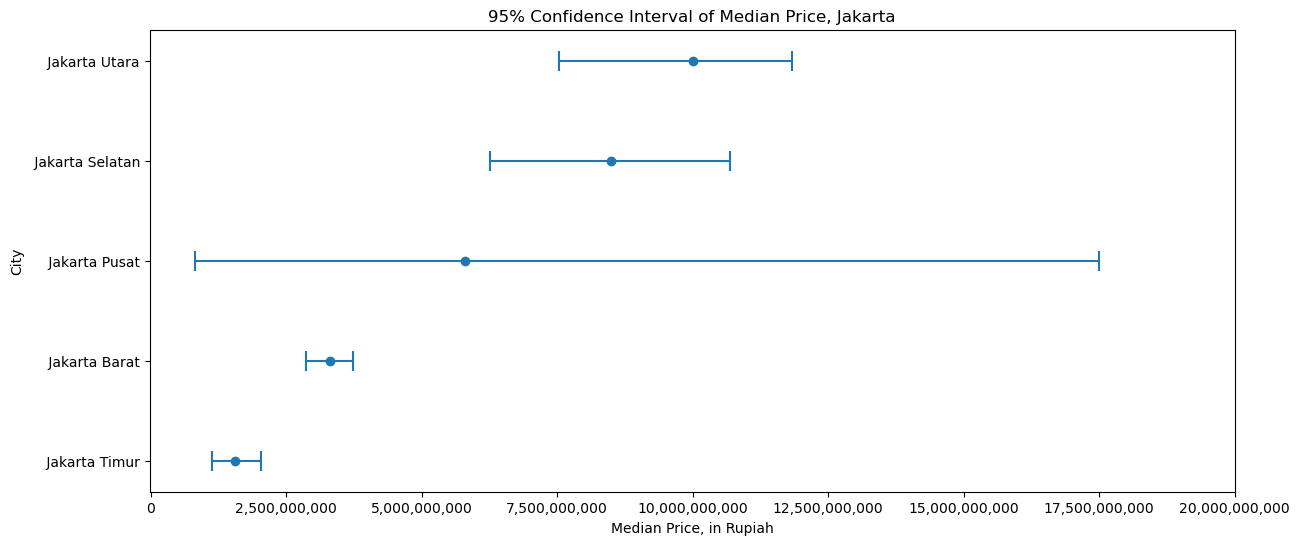

In [60]:
{"tags": ["hide-input"]}

plot_ci(median_ci_jakarta, 'Jakarta')

kesimpulan  :  terdapat banyak ketidakpastian mengenai harga rumah di Jakarta Pusat, yang semakin memperkuat pengetahuan kami sebelumnya tentang kurangnya cakupan Jakarta Pusat dari data kami.

### House Price berdasarkan features Certificate Type

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



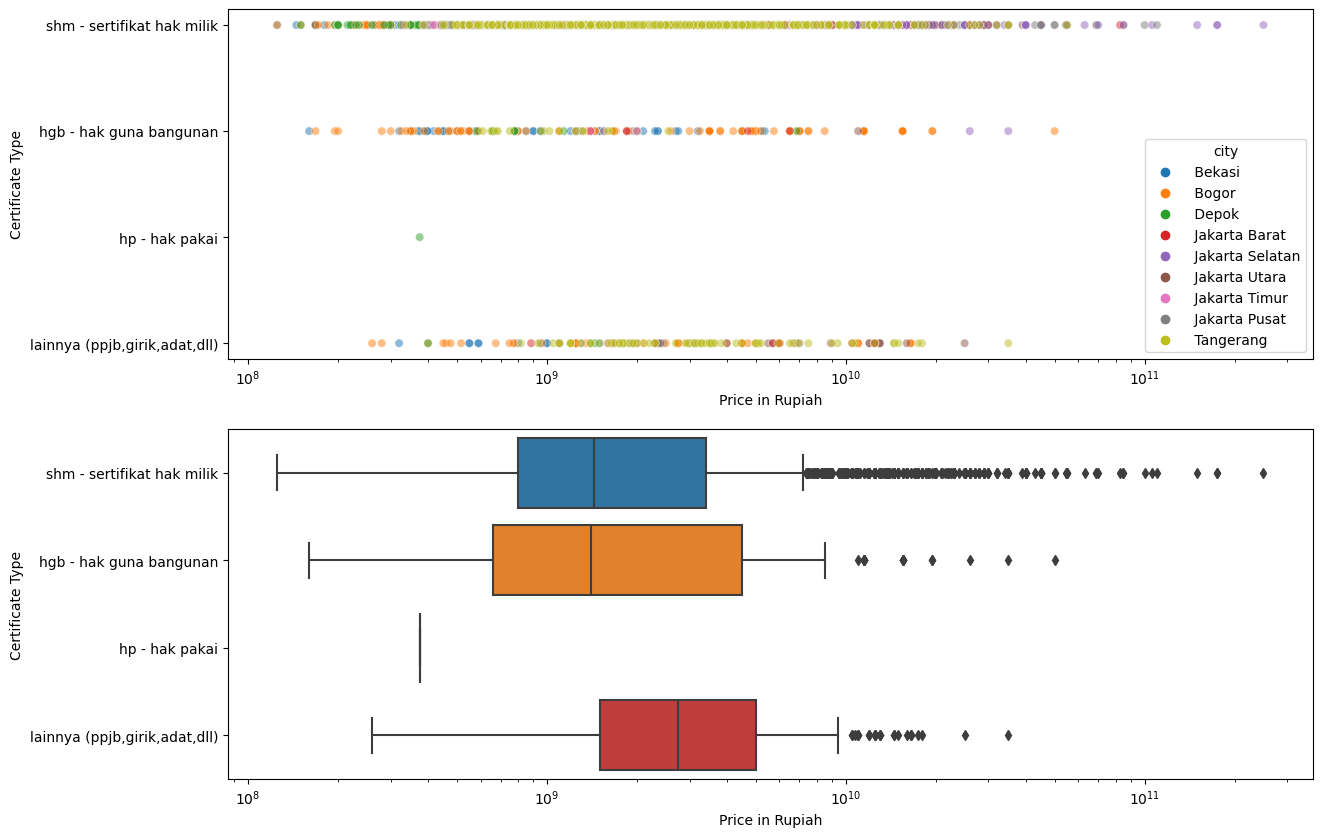

In [61]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
sns.scatterplot(data=house_df, y='certificate', x='price_in_rp', hue='city', ax=ax[0], alpha=0.5)
sns.boxplot(data=house_df, y='certificate', x='price_in_rp', ax=ax[1])
for ax_ in ax:
    ticks = ax_.get_xticks()
    xticks = ticks[ticks >= 0]
    ax_.set_xticks(xticks)
    ax_.set_xticklabels(['{:,.0f}'.format(xtick) for xtick in xticks])
    ax_.set_xlabel('Price in Rupiah')
    ax_.set_ylabel('Certificate Type')
    ax_.set_xscale('log')

---
Pernyataan tersebut menyiratkan bahwa dalam gambar tersebut, sumbu Y akan diurutkan berdasarkan harga sertifikat, dengan SHM (Sertifikat Hak Milik) dianggap paling berharga dan jenis sertifikat lainnya diurutkan sesuai dengan tingkat keberhargaannya yang didasarkan pada persepsi bersama. 

Untuk melakukan uji statistik berdasarkan interval kepercayaan perbedaan median antara berbagai jenis sertifikat untuk setiap kota, mereka mengusulkan penggunaan metode bootstrap yang diimplementasikan dalam fungsi `scipy.bootstrap`. Metode bootstrap memungkinkan kita untuk menentukan distribusi sampling dari data yang ada tanpa membuat asumsi tertentu tentang distribusi populasi. Ini membantu dalam menguji perbedaan antara median dari dua kelompok (misalnya, dua jenis sertifikat) dengan menghasilkan interval kepercayaan untuk perbedaan median.

Contoh pengujian untuk rumah di Bogor mungkin melibatkan membandingkan median harga rumah dengan berbagai jenis sertifikat, seperti SHM, PPJB, Girik, dll. Dengan metode bootstrap, mereka dapat menghitung interval kepercayaan untuk perbedaan median harga rumah antara dua jenis sertifikat, yang dapat memberikan wawasan tentang apakah ada perbedaan signifikan dalam harga rumah berdasarkan jenis sertifikat di Bogor


In [62]:
def median_diff(sample_1, sample_2):
    statistic = np.median(sample_1) - np.median(sample_2)
    return statistic

sample_size = 50
city = ' Bogor'
categories = ['shm - sertifikat hak milik', 'hgb - hak guna bangunan', 'lainnya (ppjb,girik,adat,dll)']
sample_1 = \
    house_df[(house_df.city == ' Bogor') & (house_df.certificate == 'shm - sertifikat hak milik')]\
        .price_in_rp.sample(sample_size).values
sample_2 = \
    house_df[(house_df.city == ' Bogor') & (house_df.certificate == 'hgb - hak guna bangunan')]\
        .price_in_rp.sample(sample_size).values
data = (sample_1, sample_2)
res = bootstrap(data, median_diff, method='basic', vectorized=False)

res.confidence_interval

ConfidenceInterval(low=-3810000000.0, high=-535000000.0)

---
Berdasarkan confidence interval yang disebutkan di atas, nilai statistik yang dihitung adalah selisih median antara sampel 1 dan sampel 2. Di sini, sampel 1 adalah rumah dengan sertifikat SHM (Sertifikat Hak Milik), dan sampel 2 adalah rumah dengan sertifikat HGB (Hak Guna Bangunan).

Interval tersebut terletak di area negatif, yang berarti bahwa untuk Bogor, sebagian besar rumah dengan sertifikat SHM terkait dengan harga rumah yang lebih rendah daripada rumah dengan sertifikat HGB. Namun, kita tidak bisa sekadar menyimpulkan bahwa sertifikat SHM menyebabkan penurunan harga rumah.

Perlu diingat bahwa interval kepercayaan mengandung nilai perkiraan yang masuk akal. Oleh karena itu, interval yang mencakup nilai 0 berarti ada bukti tidak adanya perbedaan median antara sampel yang diuji. Dalam contoh di atas, disimpulkan bahwa ada perbedaan median antara rumah dengan sertifikat SHM dan HGB.

Penting untuk dicatat signifikansi praktis dari statistik yang dihitung. Misalnya, selisih median sebesar 10.000.000 mungkin menolak hipotesis nol tetapi tidak signifikan untuk harga rumah ti
pintinya SHM kemungkinan kurang bervalue daripada HGB
ikal.

Temuan di atas juga dapat diperiksa menggunakan box-plot di ba
wah ini.

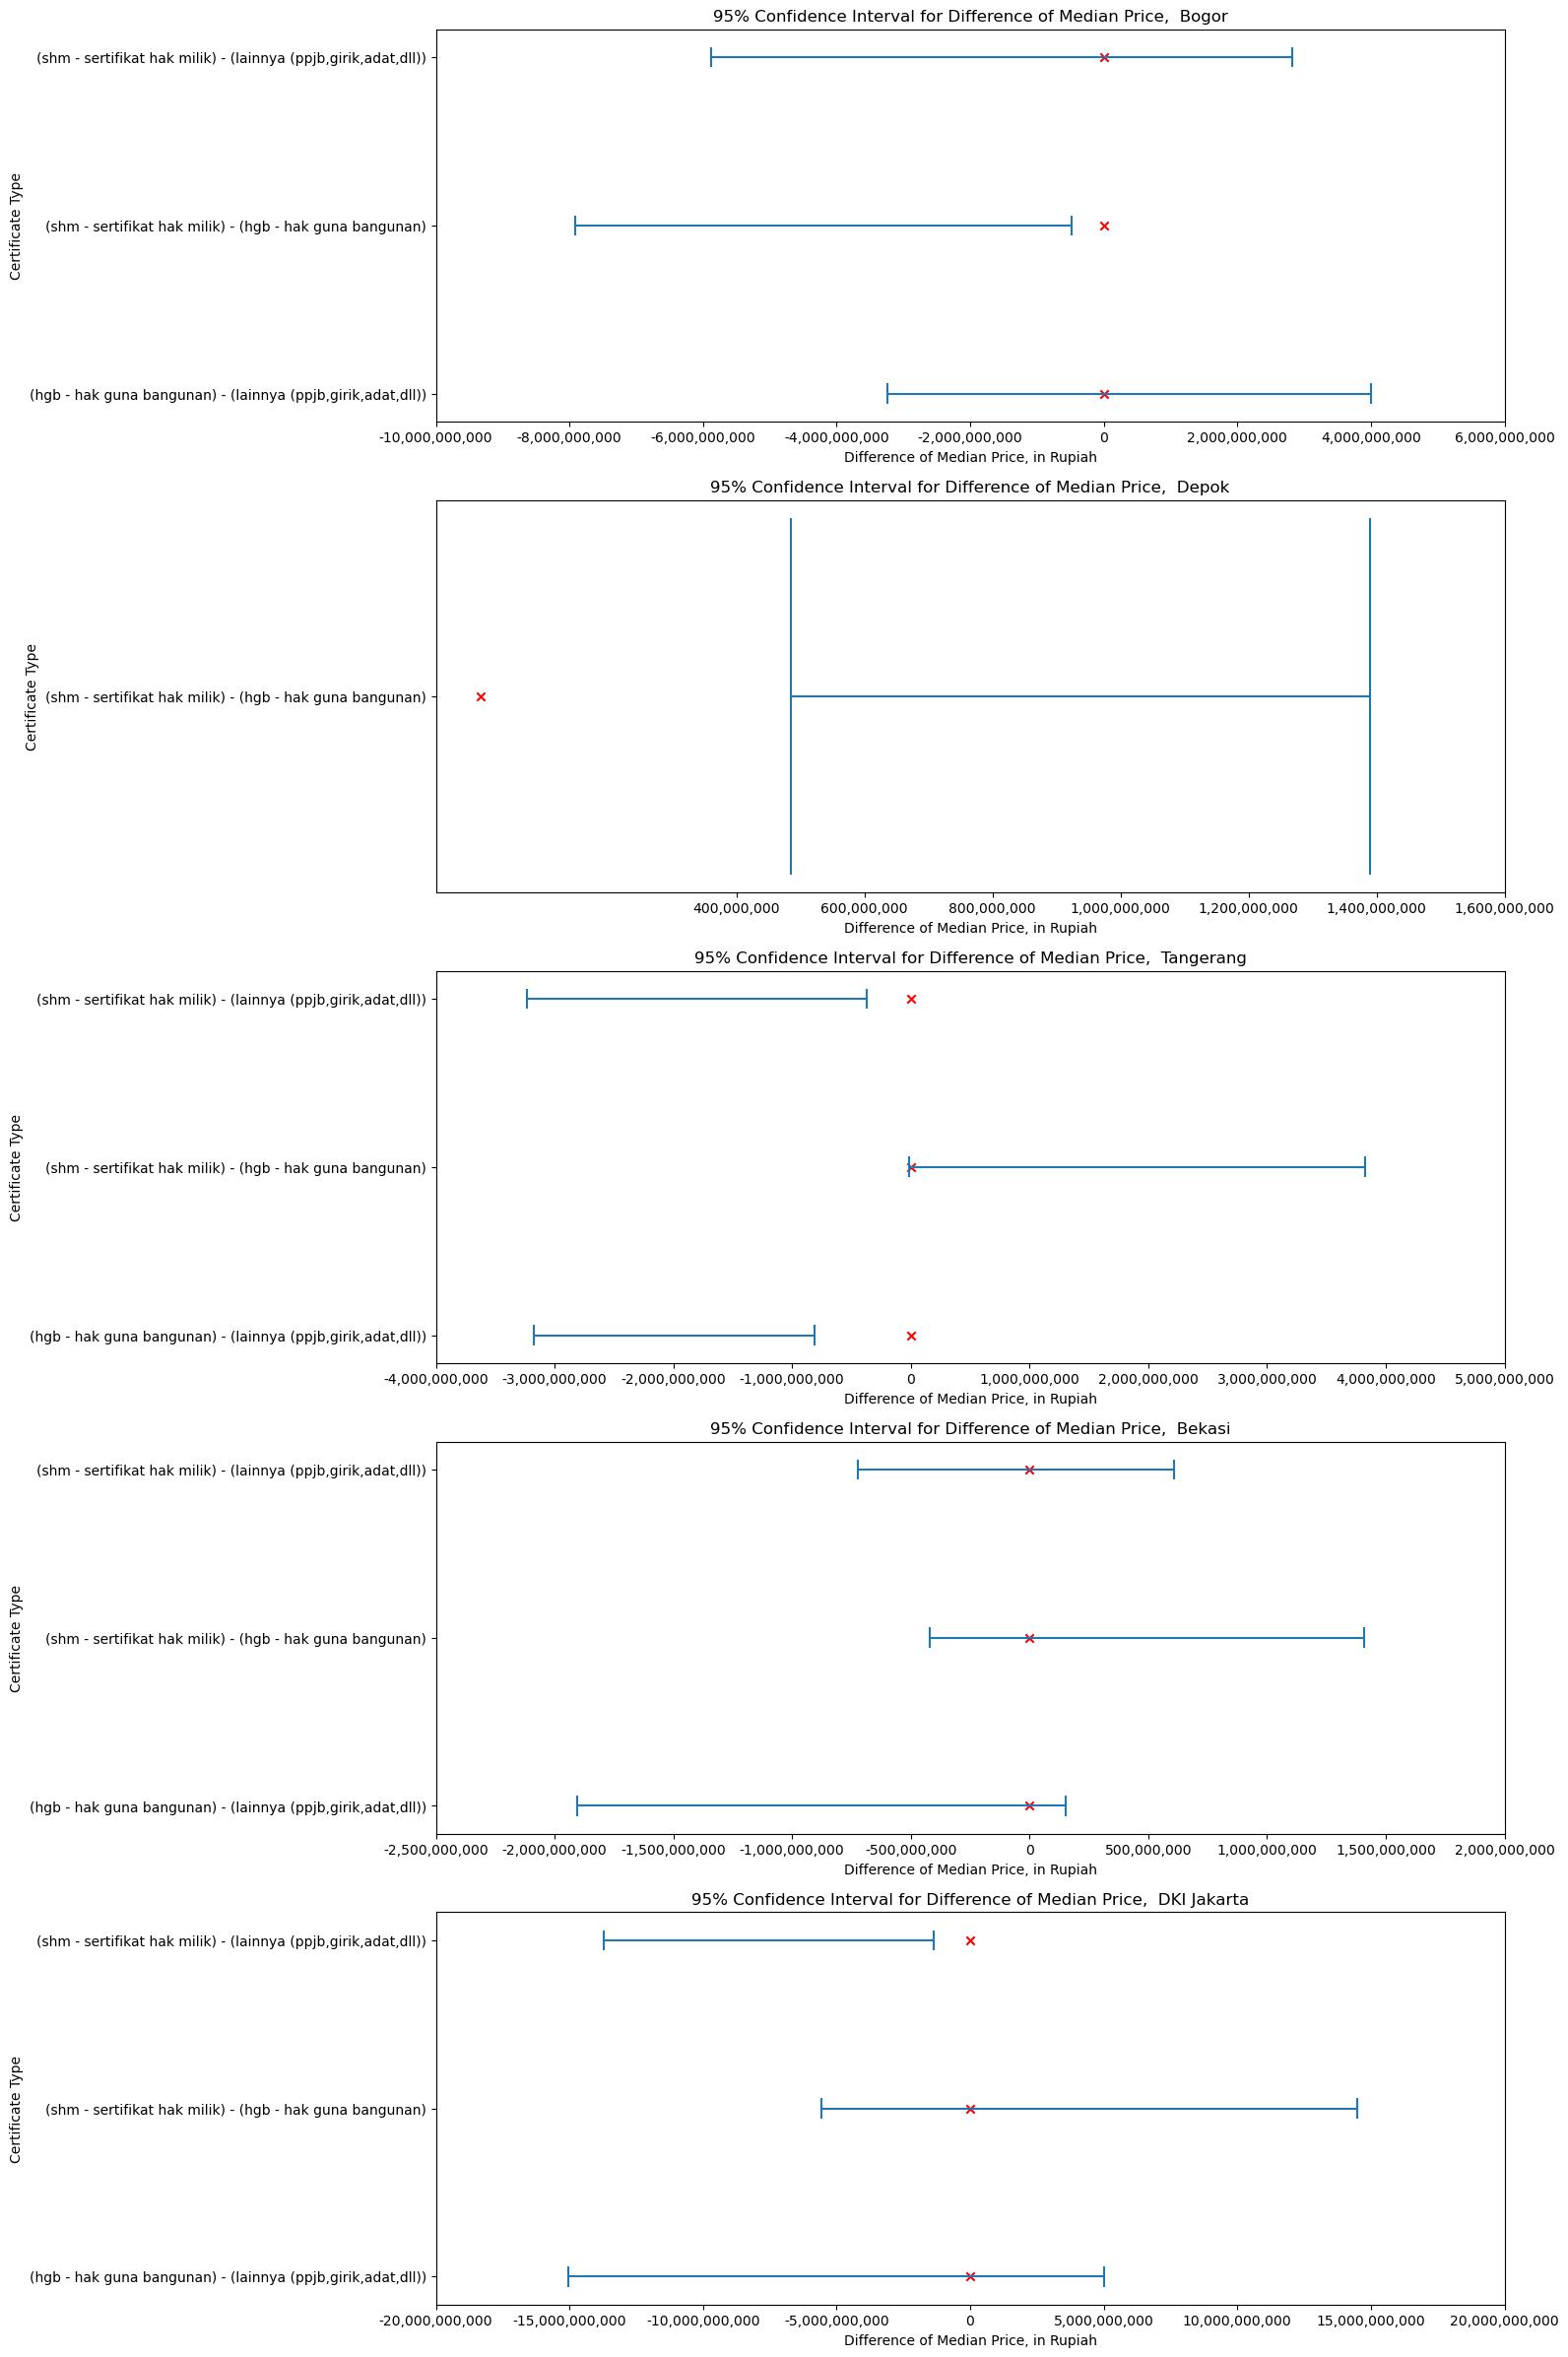

In [63]:
for column, order in zip(
    ['certificate', 'electricity', 'property_condition', 'furnishing'],
    [certificate_order, electricity_order, property_condition_order, furnishing_order]):
    house_df_simple[column] = \
        pd.Categorical(
            values=house_df_simple[column],
            categories=order,
            ordered=True
            )
cities = [' Bogor', ' Depok', ' Tangerang', ' Bekasi', ' DKI Jakarta']
categories = list(house_df_simple.certificate.dtypes.categories)
index = [i for i in range(len(categories))]
combination = [comb for comb in itertools.combinations(index, 2)]
records = []
sample_size = 10
for city in cities:
    df = house_df_simple[house_df_simple.city == city]
    for index_1, index_2 in combination:
        category_1 = categories[index_1]
        category_2 = categories[index_2]
        try:
            sample_1 = df[
                df.certificate == category_1
                ].price_in_rp.sample(sample_size).values
            sample_2 = df[
                df.certificate == category_2
                ].price_in_rp.sample(sample_size).values
        except (ValueError, IndexError):
            continue
        data = (sample_1, sample_2)
        res = bootstrap(data, median_diff, method='basic', vectorized=False)
        ci_l = res.confidence_interval[0]
        ci_h = res.confidence_interval[1]
        records.append({
            'city': city, 'category_1': category_1,
            'category_2': category_2, 'category': f'({category_1}) - ({category_2})',
            'ci_l': ci_l, 'ci_h': ci_h
        })
median_df_test = pd.DataFrame(records)
fig, ax = plt.subplots(len(cities), 1, figsize=(14, len(cities) * 6))
for index, city in enumerate(cities):
    df = median_df_test[median_df_test.city == city].sort_values('category_1')
    ax[index].hlines(y=df.category, xmin=df.ci_l, xmax=df.ci_h)
    y_ticks = np.array(ax[index].get_yticks())
    x_ticks = ax[index].get_xticks()
    ax[index].vlines(x=df.ci_l, ymin=(y_ticks - (len(y_ticks) * 0.02)), ymax=(y_ticks + (len(y_ticks) * 0.02)))
    ax[index].vlines(x=df.ci_h, ymin=(y_ticks - (len(y_ticks) * 0.02)), ymax=(y_ticks + (len(y_ticks) * 0.02)))
    ax[index].scatter(
        x=np.repeat(0, len(df.category)), y=df.category,
        marker='x', color='r')
    ax[index].set_xticks(x_ticks)
    ax[index].set_xticklabels(['{:,.0f}'.format(xtick) for xtick in x_ticks])
    ax[index].set_title(f'95% Confidence Interval for Difference of Median Price, {city}')
    ax[index].set_xlabel('Difference of Median Price, in Rupiah')
    ax[index].set_ylabel('Certificate Type')

---
intervalnya agak sewenang-wenang (tidak teratur/berpola), tidak ada pola yang dapat diidentifikasi. Jika keyakinan kami benar, intervalnya akan berpindah dari kanan atas ke kiri bawah.

Selain itu, pada confidence level 95%, menyajikan bukti tidak adanya perbedaan median (interval mencakup nilai 0, ditandai dengan x merah).

Singkatnya, secara statistik, harga rumah yang lebih tinggi tidak berhubungan dengan jenis sertifikat tertentu.

Dengan demikian, grafik tersebut membantu untuk melihat apakah perbedaan median harga antara dua kategori sertifikat di suatu kota signifikan atau tidak. Jika interval kepercayaan tidak melintasi nol, maka perbedaan median harga dianggap signifikan.
nti.

###  House Price berdasarkan Property Condition

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



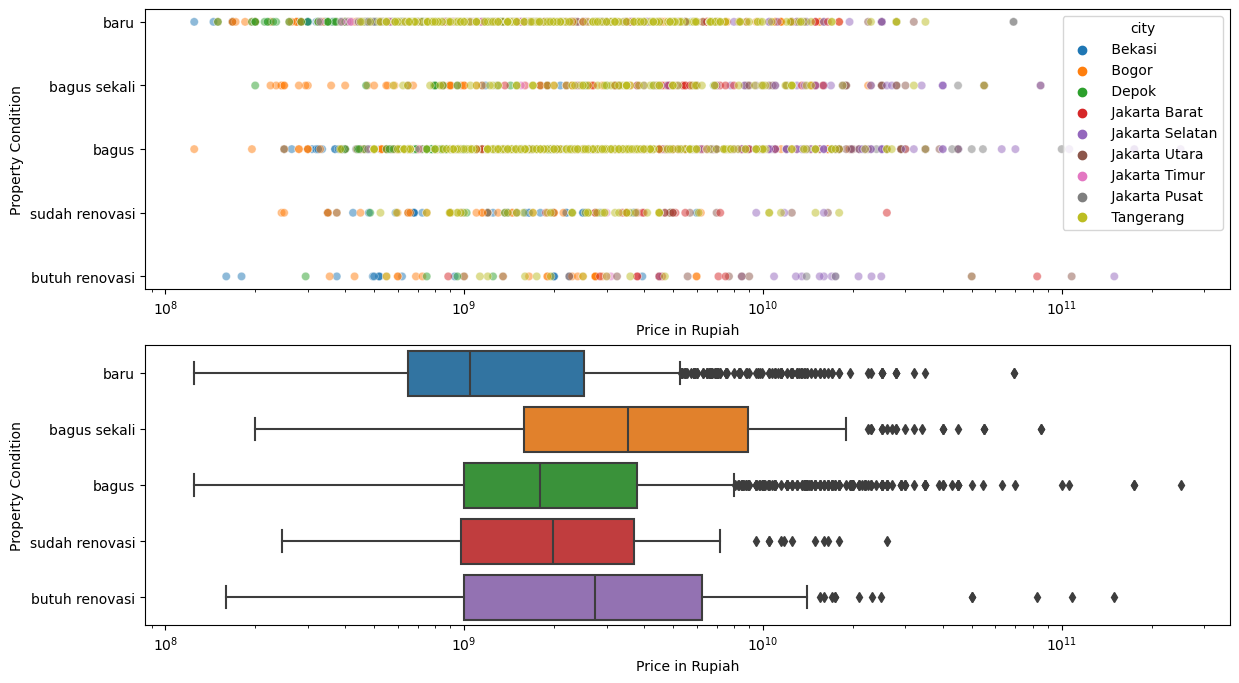

In [64]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
sns.scatterplot(data=house_df, y='property_condition', x='price_in_rp', hue='city', ax=ax[0], alpha=0.5)
sns.boxplot(data=house_df, y='property_condition', x='price_in_rp', ax=ax[1])
for ax_ in ax:
    ticks = ax_.get_xticks()
    xticks = ticks[ticks >= 0]
    ax_.set_xticks(xticks)
    ax_.set_xticklabels(['{:,.0f}'.format(xtick) for xtick in xticks])
    ax_.set_xlabel('Price in Rupiah')
    ax_.set_ylabel('Property Condition')
    ax_.set_xscale('log')

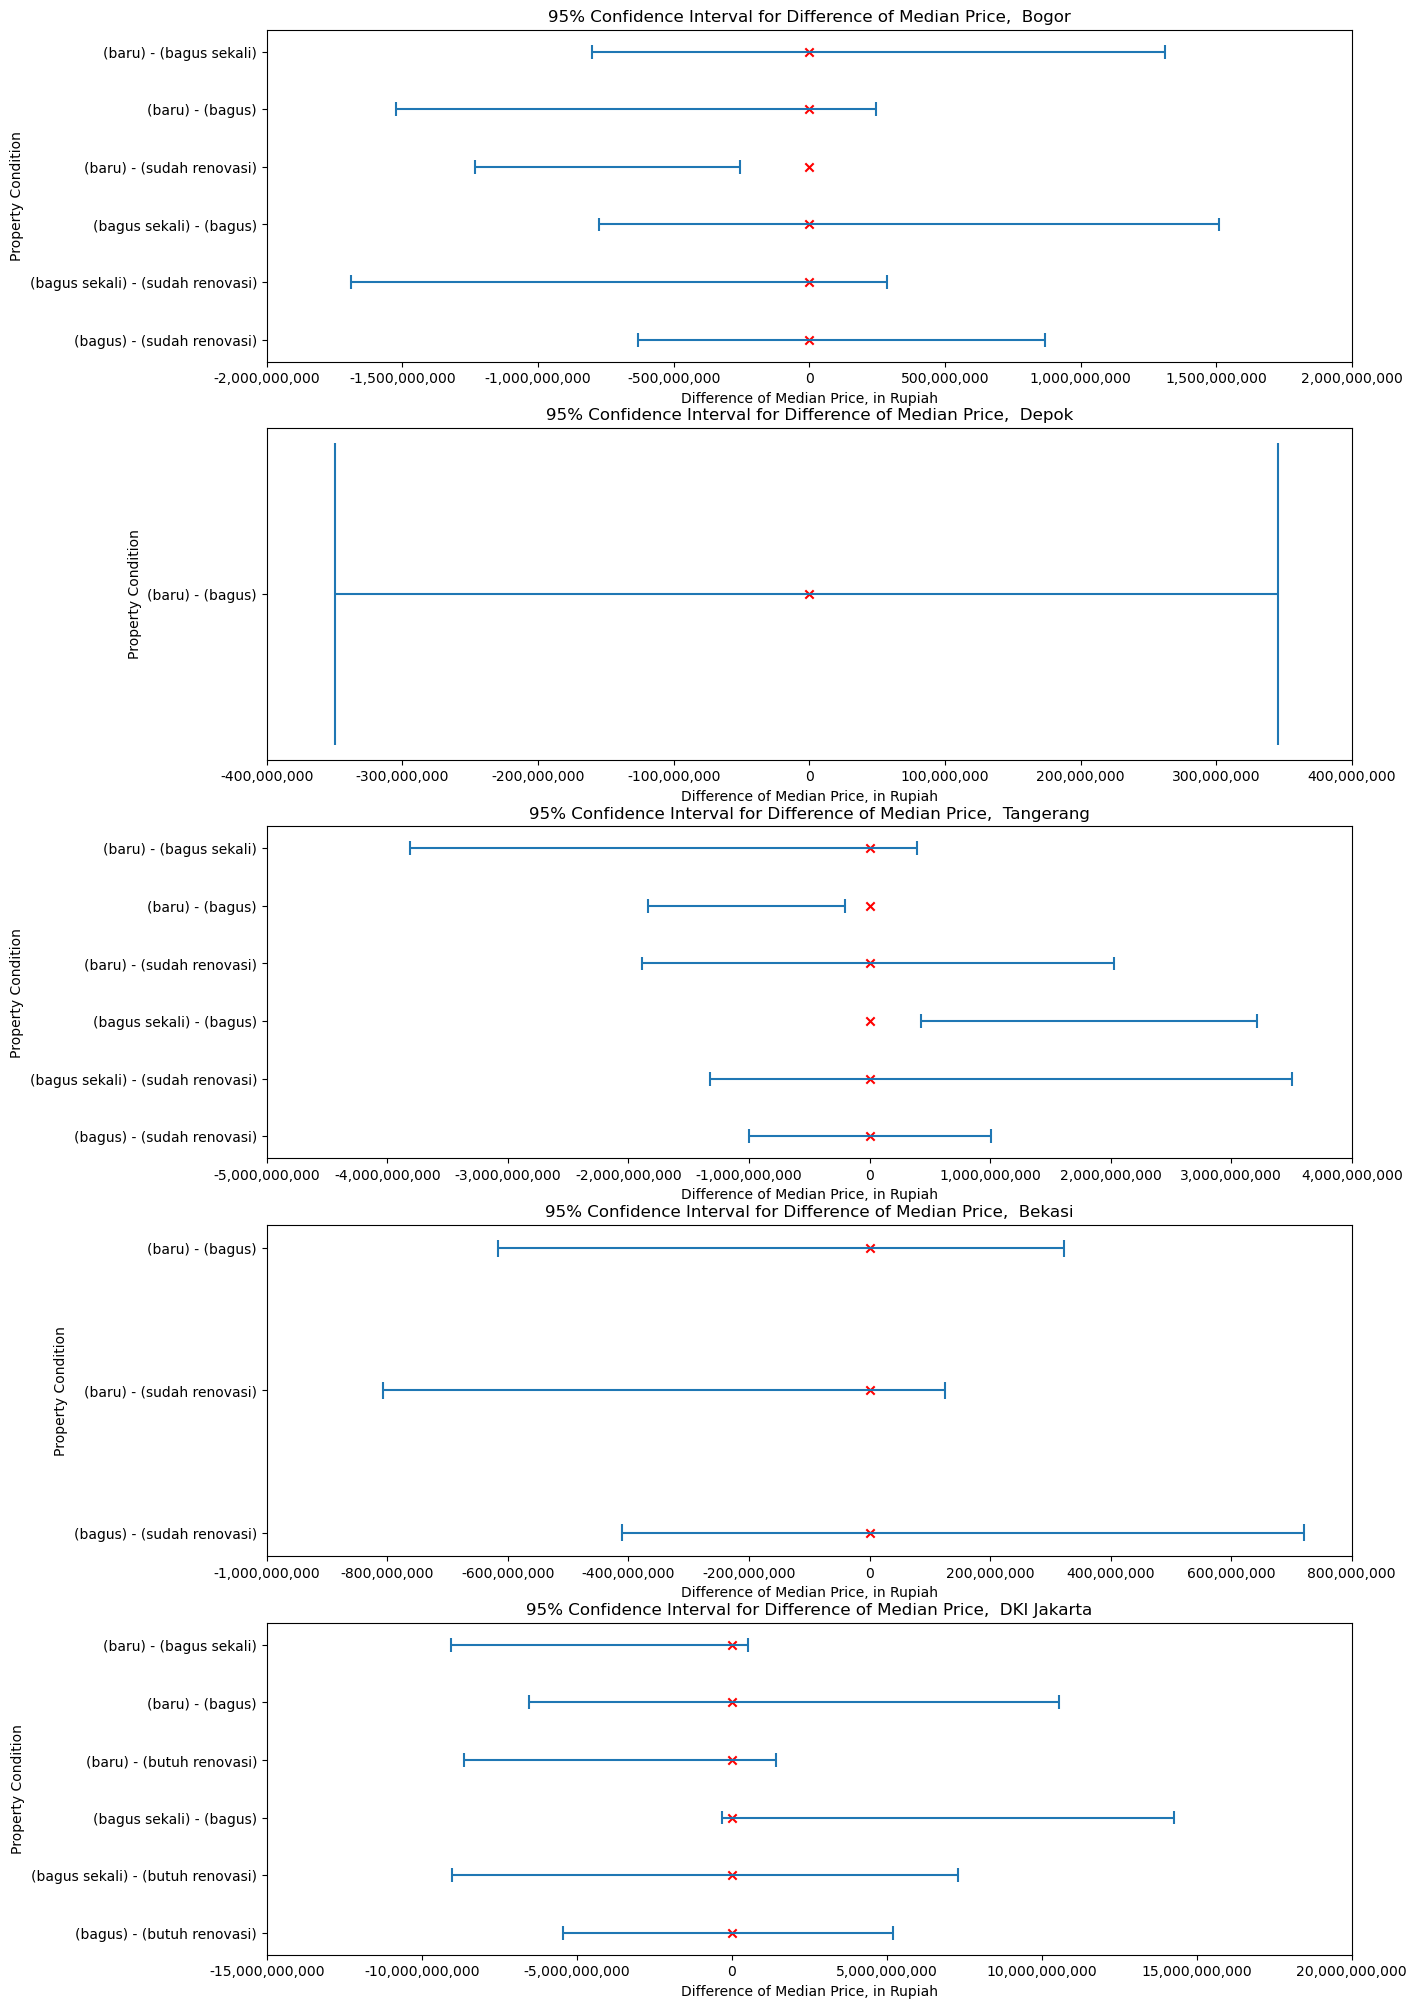

In [65]:
{"tags": ["hide-input"]}

cities = [' Bogor', ' Depok', ' Tangerang', ' Bekasi', ' DKI Jakarta']
analyze_condition = ['baru', 'bagus sekali', 'bagus', 'sudah renovasi', 'butuh renovasi']
records = []
sample_size = 30
categories = list(house_df_simple.property_condition.dtypes.categories)
index = [i for i in range(len(categories))]
combination = [comb for comb in itertools.combinations(index, 2)]
for city in cities:
    df = house_df_simple[
        (house_df_simple.city == city) & (house_df.property_condition.isin(analyze_condition))]
    for index_1, index_2 in combination:
        category_1 = categories[index_1]
        category_2 = categories[index_2]
        try:
            sample_1 = df[
                df.property_condition == category_1
                ].price_in_rp.sample(sample_size).values
            sample_2 = df[
               df.property_condition == category_2
                ].price_in_rp.sample(sample_size).values
        except (ValueError, IndexError):
            continue
        data = (sample_1, sample_2)
        res = bootstrap(data, median_diff, method='basic', vectorized=False)
        ci_l = res.confidence_interval[0]
        ci_h = res.confidence_interval[1]
        records.append({
            'city': city, 'category_1': category_1,
            'category_2': category_2, 'category': f'({category_1}) - ({category_2})',
            'ci_l': ci_l, 'ci_h': ci_h
        })
median_df_test = pd.DataFrame(records)
fig, ax = plt.subplots(len(cities), 1, figsize=(14, len(cities) * 5))
for index, city in enumerate(cities):
    df = median_df_test[median_df_test.city == city]
    df = df.iloc[::-1]
    ax[index].hlines(y=df.category, xmin=df.ci_l, xmax=df.ci_h)
    y_ticks = np.array(ax[index].get_yticks())
    x_ticks = ax[index].get_xticks()
    ax[index].vlines(x=df.ci_l, ymin=(y_ticks - (len(y_ticks) * 0.02)), ymax=(y_ticks + (len(y_ticks) * 0.02)))
    ax[index].vlines(x=df.ci_h, ymin=(y_ticks - (len(y_ticks) * 0.02)), ymax=(y_ticks + (len(y_ticks) * 0.02)))
    ax[index].scatter(
        x=np.repeat(0, len(df.category)), y=df.category,
        marker='x', color='r')
    ax[index].set_xticks(x_ticks)
    ax[index].set_xticklabels(['{:,.0f}'.format(xtick) for xtick in x_ticks])
    ax[index].set_title(f'95% Confidence Interval for Difference of Median Price, {city}')
    ax[index].set_xlabel('Difference of Median Price, in Rupiah')
    ax[index].set_ylabel('Property Condition')

kesimpulan : tidak ada pola yang dapat diidentifikasi. Bukti statistik tidak adanya perbedaan median sebagian besar terdapat pada setiap kota di Jabodetabek.

Secara statistik, harga rumah yang lebih tinggi tidak berhubungan dengan kondisi properti tertentu.

### House Price berdasarkan Electricity features

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



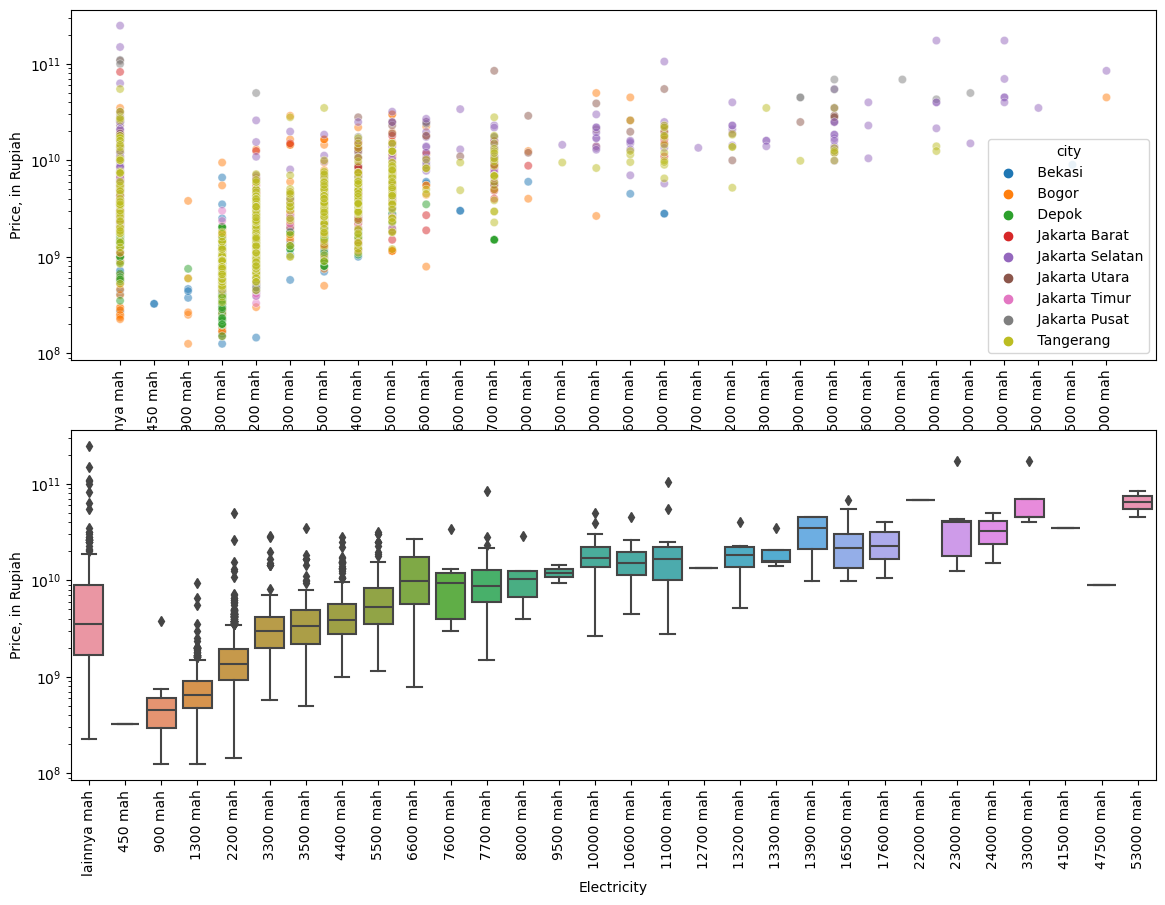

In [66]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
sns.scatterplot(data=house_df, y='price_in_rp', x='electricity', hue='city', ax=ax[0], alpha=0.5)
sns.boxplot(data=house_df, y='price_in_rp', x='electricity', ax=ax[1])
for ax_ in ax:
    ticks = ax_.get_yticks()
    yticks = ticks[ticks >= 0]
    ax_.set_xticks(ax_.get_xticks())
    ax_.set_xticklabels(ax_.get_xticklabels(), rotation=90)
    ax_.set_yticks(yticks)
    ax_.set_yticklabels(['{:,.0f}'.format(ytick) for ytick in yticks])
    ax_.set_xlabel('Electricity')
    ax_.set_ylabel('Price, in Rupiah')
    ax_.set_yscale('log')

Catatan listrik yang hilang mencakup hampir seluruh kisaran harga rumah. Perhatikan bahwa listrik yang lebih besar dikaitkan dengan harga rumah yang lebih besar. Hal ini bisa dimaklumi karena rumah berukuran besar cenderung memiliki pengaturan listrik yang lebih tinggi. Alasan ini dapat dibuktikan jika listrik mempunyai koefisien korelasi yang tinggi dengan ukuran_m2 bangunan.

### House Price berdasarkan Numerical Features

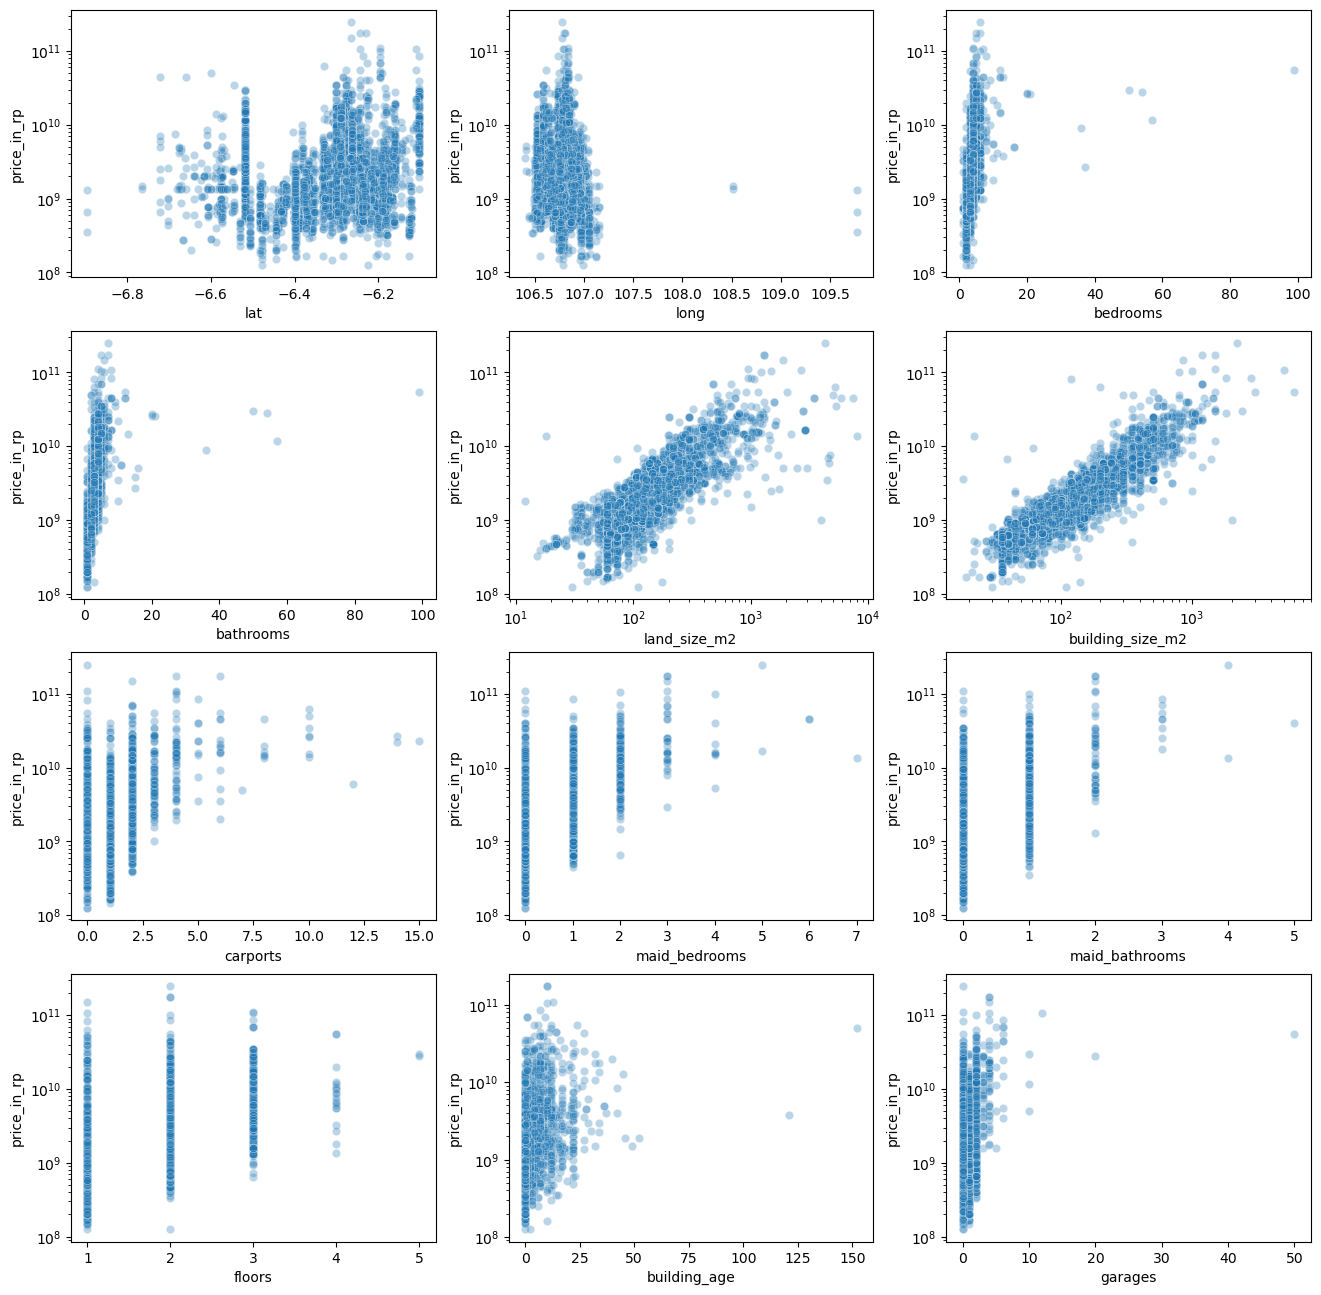

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numerical_features = house_df\
    .select_dtypes(exclude=['object', 'category'])\
    .drop(['price_in_rp', 'year_built'], axis=1).columns

fig, ax = plt.subplots(4, 3, figsize=(16, 16))

for (ax_index, ax_), feature in zip(np.ndenumerate(ax), numerical_features):
    sns.scatterplot(data=house_df[house_df[feature].notna()], x=feature, y='price_in_rp', alpha=0.3, ax=ax[ax_index])
    if (house_df[feature].dtypes == 'float') & (feature not in ['lat', 'long', 'electricity_num']):
        ax[ax_index].set_xscale('log')
        ax[ax_index].set_yscale('log')
    else:
        ax[ax_index].set_yscale('log')


Pola linier teridentifikasi pada fitur ukuran bangunan dan ukuran lahan. Untuk variabel (misalnya lantai, carport) yang nilainya lebih besar dikaitkan dengan ukuran bangunan yang lebih besar, juga menunjukkan pola kenaikan harga rumah.

Peta panas koefisien korelasi ditunjukkan di bawah ini. Koefisien dihitung dengan menggunakan metode Spearman. Algoritma clustering diterapkan untuk grafik. Ini mengurutkan fitur-fitur yang memiliki korelasi serupa yang letaknya berdekatan, sehingga menghasilkan presentasi yang lebih tinggi sehingga lebih mudah untuk dianalisis.

heatmap tidak bisa ditampilkan jadinya pake yang udh ada dianalisis bahwa dari heatmaps tersebut kita dapat mengenali fitur yang memiliki koefisien korelasi tinggi dengan ukuran_m2 bangunan juga memiliki korelasi tinggi dengan harga_dalam_rp. Ciri-ciri tersebut kemungkinan mempengaruhi harga rumah, yang akan dianalisis  selanjutnya

## Preparing Dataset for Modeling

### Subsetting Set Tes untuk Menilai Prediksi

In [68]:
from sklearn.model_selection import train_test_split

X = house_df.drop('price_in_rp', axis=1)
y = house_df.price_in_rp

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=99
    )

Kode di atas adalah contoh penggunaan fungsi `train_test_split` dari library `scikit-learn` dalam Python. Fungsi ini digunakan untuk membagi dataset menjadi dua bagian: data latih (train) dan data uji (test), yang kemudian akan digunakan untuk melatih dan menguji model.

Penjelasan variabel:
- `X`: Variabel independen yang berisi fitur-fitur dari dataset, kecuali variabel target.
- `y`: Variabel dependen atau target yang ingin diprediksi.
- `test_size=0.1`: Parameter yang menentukan proporsi data yang akan dialokasikan untuk data uji. Dalam contoh ini, 10% dari data akan dialokasikan untuk data uji, sementara 90% akan digunakan untuk data latih.
- `random_state=99`: Parameter ini digunakan untuk mengontrol randomness dalam pembagian data menjadi data latih dan data uji. Dengan menetapkan nilai ini, pembagian data akan konsisten jika kode dijalankan kembali dengan parameter yang sama.

### evaluasi missing value lagi

In [69]:
import data_exploration as DataExploration



In [70]:
import pandas as pd
import numpy as np

class DataExploration:
    """
    A class for exploring data in a pandas DataFrame.
    
    Attributes:
    -----------
    dataframe : pd.DataFrame
        The DataFrame to explore.
    
    Methods:
    --------
    show_nans_or_zeroes(label: str, filter: list) -> pd.DataFrame:
        Returns a DataFrame showing the count and percentage of NaNs or zeroes in specified columns.
    """
    def __init__(self, dataframe):
        self._dataframe = dataframe.copy()

    def show_nans_or_zeroes(self, label: str, filter=[]):
        if list(filter):
            features = list(filter)
        else:
            features = list(self._dataframe.columns)
            
        if label == 'nans':
            label_data = self._dataframe[features].isna()
        elif label == 'zeroes':
            label_data = self._dataframe[features] == 0
        else:
            raise ValueError('Wrong argument for "label"')
            
        label_count = label_data.sum()
        label_percent = label_data.mean() * 100
        data_types = self._dataframe[features].dtypes
        
        return pd.DataFrame({
            f'{label.capitalize()} Count': label_count,
            f'{label.capitalize()} Percentage (%)': label_percent,
            'Data Types': data_types
        })

# Example usage with a DataFrame house_df
# Ensure house_df is defined elsewhere in your code
numerical_features = house_df.select_dtypes(exclude=['object', 'category']).columns
DataExploration(house_df).show_nans_or_zeroes('nans', numerical_features)


Nans Count  Nans Percentage (%) Data Types
price_in_rp                         0                 0.00    float64
lat                                 0                 0.00    float64
long                                0                 0.00    float64
bedrooms                           32                 0.93      Int64
bathrooms                          28                 0.81      Int64
land_size_m2                        2                 0.06    float64
building_size_m2                    2                 0.06    float64
carports                            0                 0.00      Int64
maid_bedrooms                       0                 0.00      Int64
maid_bathrooms                      0                 0.00      Int64
floors                              6                 0.17      Int64
building_age                     1417                41.13      Int64
year_built                       1417                41.13      Int64
garages                             0                 0.00      Int64
electricity_num                   285                 8.27    float64
fac_tempat_jemuran                  0                 0.00    float64
fac_jalur_telepon                   0                 0.00    float64
fac_jogging_track                   0                 0.00    float64
fac_kolam_renang                    0                 0.00    float64
fac_masjid                          0                 0.00    float64
fac_keamanan                        0                 0.00    float64
fac_cctv                            0                 0.00    float64
fac_kitchen_set                     0                 0.00    float64
fac_one_gate_system                 0                 0.00    float64
fac_akses_parkir                    0                 0.00    float64
fac_playground                      0                 0.00    float64
fac_wastafel                        0                 0.00    float64
fac_ac                              0                 0.00    float64
fac_lapangan_basket                 0                 0.00    float64
fac_tempat_gym                      0                 0.00    float64
fac_kolam_ikan                      0                 0.00    float64
fac_lapangan_voli                   0                 0.00    float64
fac_lapangan_tenis                  0                 0.00    float64
fac_lapangan_bola                   0                 0.00    float64
fac_mesin_cuci                      0                 0.00    float64
fac_lapangan_bulu_tangkis           0                 0.00    float64
fac_kulkas                          0                 0.00    float64
fac_garden                          0                 0.00    float64
fac_water_heater                    0                 0.00    float64
fac_canopy                          0                 0.00    float64
fac_smart_home                      0                 0.00    float64
fac_backyard_luas                   0                 0.00    float64
fac_garasi                          0                 0.00    float64
fac_balkon                          0                 0.00    float64
fac_basement                        0                 0.00    float64
fac_gudang                          0                 0.00    float64
fac_clubhouse                       0                 0.00    float64
fac_service_area                    0                 0.00    float64
fac_plumbing_system                 0                 0.00    float64

In [71]:
non_numeric_features = house_df.select_dtypes(include=['object']).columns
DataExploration(house_df).show_nans_or_zeroes('nans', non_numeric_features)

Nans Count  Nans Percentage (%) Data Types
url                  0                 0.00     object
title                0                 0.00     object
address              0                 0.00     object
district             0                 0.00     object
city                 0                 0.00     object
facilities           0                 0.00     object
ads_id               4                 0.12     object

---
Perlu diingat bahwa observasi dalam dataset asli kami mungkin memiliki catatan yang hilang, yang bisa terjadi baik di set pelatihan maupun di set pengujian, atau mungkin di kedua set tersebut. Oleh karena itu, kita perlu mengembangkan metode untuk menangani nilai yang hilang yang berlaku untuk set pelatihan, set pengujian, dan bahkan untuk data potensial di masa depan yang ingin kita prediksi.

Beberapa metode yang dapat digunakan adalah:

1. Menghapus pengamatan yang tidak memiliki catatan untuk fitur seperti jumlah kamar mandi atau kamar tidur, serta ukuran tanah dan bangunan.
2. Menghapus fitur seperti usia bangunan, tahun pembangunan, dan orientasi bangunan yang memiliki banyak nilai yang hilang.
3. Untuk fitur seperti lantai dan nomor listrik yang hilang, kita dapat mempertimbangkan untuk mengimputasinya. Pemilihan fitur yang digunakan untuk imputasi sebaiknya didasarkan pada koefisien korelasinya.
4. Untuk nilai yang hilang pada fitur sertifikat, kita bisa mengasumsikan sertifikatnya sebagai "lainnya".
5. Untuk fitur kondisi properti dan perabotan yang hilang, kita bisa mengasumsikan nilainya sebagai mayoritas data.

Penting untuk dicatat bahwa jika kita ingin melakukan prediksi terhadap data masa depan, maka hanya fitur-fitur seperti lantai, listrik, sertifikat, kondisi properti, dan perabotan yang hilang yang perlu dipertimbangkan. Selain itu, prediksi tidak dapat dilakukan untuk fitur-fitur yang memiliki nilai yang hilang.

Dalam kode di bawah ini, perhatikan bahwa imputasi hanya diterapkan pada set pelatihan untuk memastikan bahwa model prediksi terisolasi dari set pengujian (menghindari kebocoran data).

In [72]:
from sklearn.impute import SimpleImputer, KNNImputer

# 1. Drop observations that missing vital records
X_train = X_train\
    .dropna(subset=['bedrooms', 'bathrooms', 'building_size_m2', 'land_size_m2'])
y_train = y_train[X_train.index] # remember to also drop the particular index of label data
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
# 2. Drop features with lot of NaN    
X_train = X_train\
    .drop(['building_age', 'year_built', 'building_orientation'], axis=1)
# 3.a. Impute missing `floors`
knn_imputer = KNNImputer(n_neighbors=1)
missing_floors_index = X_train[X_train.floors.isna()].index
features_estimator_floors = ['building_size_m2', 'bedrooms', 'bathrooms', 'floors']
imputer_floors = knn_imputer.fit(X_train[features_estimator_floors])
imputed_data_floors = imputer_floors.transform(X_train[features_estimator_floors])
X_train = X_train.assign(
    floors = imputed_data_floors[:, 3]
    )
# 3.b. Impute missing `Electricity`
features_estimator_electricity = [
    'building_size_m2', 'bedrooms', 'bathrooms', 'floors', 'electricity_num'
    ]
missing_electricity_index = X_train[X_train.electricity_num.isna()].index
imputer_electricity = knn_imputer.fit(X_train[features_estimator_electricity])
imputed_data_electricity = imputer_electricity.transform(X_train[features_estimator_electricity])
X_train = X_train.assign(
    electricity_num = imputed_data_electricity[:, 4]
    )
# 4. Impute missing `certificate`
constant_imputer = SimpleImputer(strategy='constant', fill_value='lainnya (ppjb,girik,adat,dll)')
X_train['certificate'] = constant_imputer.fit_transform(X_train[['certificate']]).flatten()
# 5. Impute missing `property_condition` and `furnishing`
frequent_imputer = SimpleImputer(strategy='most_frequent')
X_train['property_condition'] = frequent_imputer\
    .fit_transform(X_train[['property_condition']])\
    .flatten()
X_train['furnishing'] = frequent_imputer\
    .fit_transform(X_train[['furnishing']])\
    .flatten()

In [73]:
# missing floor imputation results
show_features = ['building_size_m2', 'land_size_m2', 'bedrooms', 'bathrooms', 'floors']
pd.merge(
    X_train.iloc[missing_floors_index, X_train.columns.get_indexer(show_features)],
    y_train, left_index=True, right_index=True
)

building_size_m2  land_size_m2  bedrooms  bathrooms  floors  \
1265            200.00        187.00         3          3    2.00   
1465            600.00        250.00         3          3    3.00   
1703            250.00        320.00         4          4    2.00   
2425            358.00        200.00         4          4    3.00   

           price_in_rp  
1265  2,750,000,000.00  
1465 13,000,000,000.00  
1703  8,300,000,000.00  
2425 10,100,000,000.00

In [74]:
# missing electricity imputation results
show_features = ['building_size_m2', 'land_size_m2', 'bedrooms', 'bathrooms', 'floors', 'electricity_num']
pd.merge(
    X_train\
    .iloc[missing_electricity_index, X_train.columns.get_indexer(show_features)]\
    .head(),
    y_train, left_index=True, right_index=True
)

building_size_m2  land_size_m2  bedrooms  bathrooms  floors  \
5             336.00        136.00        10         11    4.00   
6             240.00        136.00         4          4    3.00   
7             839.00        785.00         6          5    3.00   
32            252.00        250.00         5          4    2.00   
35             91.00        120.00         3          2    2.00   

    electricity_num       price_in_rp  
5          3,500.00  5,500,000,000.00  
6          2,200.00  6,000,000,000.00  
7         16,500.00 26,000,000,000.00  
32         3,300.00  2,790,000,000.00  
35         2,200.00  2,130,000,000.00

### Penjelasan

**Fitur yang Tidak Dibutuhkan:**
Fitur yang Tidak Dibutuhkan merujuk pada atribut atau kolom dalam dataset yang tidak memberikan nilai tambah atau relevansi terhadap tujuan analisis atau pemodelan. Beberapa contoh fitur yang mungkin dianggap tidak diperlukan meliputi:

1. Fitur yang Redundan: Kolom yang menyajikan informasi yang sama atau sangat mirip dengan kolom lain dalam dataset. Sebagai contoh, jika terdapat kolom "tanggal lahir" dan "umur", salah satunya dapat dihapus karena informasi yang disampaikannya sudah tercakup dalam yang lain.
  
2. Fitur dengan Varians Nol: Kolom yang memiliki nilai yang sama untuk semua entri dalam dataset. Kolom semacam ini tidak memberikan informasi yang berguna dalam analisis atau pemodelan.

3. Fitur dengan Banyak Missing Values: Kolom yang memiliki persentase nilai yang hilang yang tinggi, seperti lebih dari 50%. Mempertahankan kolom-kolom seperti ini seringkali tidak memberikan manfaat yang signifikan dalam analisis.

4. Fitur Irrelevan: Kolom yang tidak memiliki hubungan atau dampak yang signifikan terhadap variabel target. Sebagai contoh, jika variabel targetnya adalah harga rumah, kolom seperti "nomor telepon pemilik rumah" tidak relevan dalam konteks tersebut.

**Fitur dengan Kardinalitas Tinggi:**
Fitur dengan Kardinalitas Tinggi merujuk pada kolom yang memiliki jumlah nilai unik yang sangat besar. Beberapa pertimbangan terkait fitur dengan kardinalitas tinggi meliputi:

1. Kompleksitas Model: Fitur dengan banyak nilai unik dapat meningkatkan kompleksitas model, terutama untuk model berbasis pohon keputusan atau algoritma berbasis kategori lainnya. Ini dapat memperlambat waktu pelatihan dan inferensi model.

2. Overfitting: Karena banyaknya nilai unik, ada risiko model menjadi overfitted terhadap data pelatihan karena model dapat menjadi terlalu spesifik untuk menangani variasi dalam data.

3. Dimensi Data: Dalam algoritma yang memerlukan encoding kategorikal seperti One-Hot Encoding, fitur dengan kardinalitas tinggi akan menghasilkan vektor dengan dimensi yang sangat besar, yang dapat mengakibatkan masalah sparsitas dan kebutuhan memori yang tinggi.

4. Informasi yang Tidak Signifikan: Dalam banyak kasus, sebagian besar nilai unik mungkin hanya muncul beberapa kali dan tidak memberikan informasi signifikan untuk prediksi atau analisis. Oleh karena itu, mempertahankan fitur-fitur dengan kardinalitas tinggi mungkin tidak memberikan keuntungan yang signifikan dalam pemodelan atau analisis data.

In [75]:
cols_to_drop = ['url', 'title', 'address', 'district', 'ads_id', 'facilities', 'property_type', 'electricity']
X_train.drop(cols_to_drop, axis=1, inplace=True)

### Kesimpulan: Fitur yang Disiapkan

In [76]:
numerical_features = X_train.select_dtypes(exclude=['object', 'category']).columns
DataExploration(X_train).show_nans_or_zeroes('nans', numerical_features)

Nans Count  Nans Percentage (%) Data Types
lat                                 0                 0.00    float64
long                                0                 0.00    float64
bedrooms                            0                 0.00      Int64
bathrooms                           0                 0.00      Int64
land_size_m2                        0                 0.00    float64
building_size_m2                    0                 0.00    float64
carports                            0                 0.00      Int64
maid_bedrooms                       0                 0.00      Int64
maid_bathrooms                      0                 0.00      Int64
floors                              0                 0.00    float64
garages                             0                 0.00      Int64
electricity_num                     0                 0.00    float64
fac_tempat_jemuran                  0                 0.00    float64
fac_jalur_telepon                   0                 0.00    float64
fac_jogging_track                   0                 0.00    float64
fac_kolam_renang                    0                 0.00    float64
fac_masjid                          0                 0.00    float64
fac_keamanan                        0                 0.00    float64
fac_cctv                            0                 0.00    float64
fac_kitchen_set                     0                 0.00    float64
fac_one_gate_system                 0                 0.00    float64
fac_akses_parkir                    0                 0.00    float64
fac_playground                      0                 0.00    float64
fac_wastafel                        0                 0.00    float64
fac_ac                              0                 0.00    float64
fac_lapangan_basket                 0                 0.00    float64
fac_tempat_gym                      0                 0.00    float64
fac_kolam_ikan                      0                 0.00    float64
fac_lapangan_voli                   0                 0.00    float64
fac_lapangan_tenis                  0                 0.00    float64
fac_lapangan_bola                   0                 0.00    float64
fac_mesin_cuci                      0                 0.00    float64
fac_lapangan_bulu_tangkis           0                 0.00    float64
fac_kulkas                          0                 0.00    float64
fac_garden                          0                 0.00    float64
fac_water_heater                    0                 0.00    float64
fac_canopy                          0                 0.00    float64
fac_smart_home                      0                 0.00    float64
fac_backyard_luas                   0                 0.00    float64
fac_garasi                          0                 0.00    float64
fac_balkon                          0                 0.00    float64
fac_basement                        0                 0.00    float64
fac_gudang                          0                 0.00    float64
fac_clubhouse                       0                 0.00    float64
fac_service_area                    0                 0.00    float64
fac_plumbing_system                 0                 0.00    float64

In [77]:
{"tags": ["hide-input"]}

non_numeric_features = X_train.select_dtypes(include=['object']).columns
DataExploration(X_train).show_nans_or_zeroes('nans', non_numeric_features)

Nans Count  Nans Percentage (%) Data Types
city                         0                 0.00     object
certificate                  0                 0.00     object
property_condition           0                 0.00     object
furnishing                   0                 0.00     object

## Tambahan : Pipeline for Test Set

Scikit-learn menyediakan program pipeline untuk membuat transformator yang dapat digunakan kembali yang berisi perlakuan/langkah berurutan yang akan diterapkan pada dataset yang diteruskan ke pipeline tersebut.

### Transformer to drop Observations with Missing Records

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin

class RowsDropper(BaseEstimator, TransformerMixin):
    """ 
    Remove observations that missing any records from features that
    specified in `mandatory_features` 
    """
    def __init__(self, mandatory_features):
        self.mandatory_features = mandatory_features.copy()
        self.dropped_index = []

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        self.dropped_index = X[X[self.mandatory_features].isna()].index
        X_new = X.dropna(subset=self.mandatory_features)
        X_new.reset_index(drop=True, inplace=True)
        return X_new
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X, **fit_params).transform(X)

### Features-Dropper Transformer

Features-Dropper Transformer adalah alat yang digunakan untuk menghapus fitur atau kolom dari dataset yang dianggap tidak relevan atau tidak diperlukan. Ini membantu dalam:

1. **Meningkatkan Kinerja:** Dengan mengurangi dimensi data, waktu pelatihan dan prediksi model dapat dipercepat.

2. **Mengurangi Risiko Overfitting:** Dengan membuang fitur yang tidak diperlukan, kita dapat menghindari model menangkap pola yang spesifik hanya untuk data pelatihan.

3. **Meningkatkan Interpretasi:** Dengan menyederhanakan model, interpretasi hasilnya menjadi lebih mudah dan lebih intuitif.

4. **Memperbaiki Kualitas Prediksi:** Dengan mempertahankan hanya fitur-fitur yang paling informatif, kita dapat meningkatkan kualitas prediksi model.

Singkatnya, Features-Dropper Transformer membantu menyederhanakan dataset sehingga model dapat bekerja lebih efisien dan memberikan hasil prediksi yang lebih akurat dalam analisis atau prediksi data.ksi.







In [79]:
class FeaturesDropper(BaseEstimator, TransformerMixin):
    def __init__(self, drop_list):
        self.drop_list = drop_list.copy()
        self.cols_dropped = []

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # checking if streamed data has unused features
        self.cols_dropped +=\
            [column for column in X.columns if column in self.drop_list]
        if self.cols_dropped:
            X_new = X.drop(self.cols_dropped, axis=1)
            return X_new
        else:
            return X
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X, **fit_params).transform(X)

### Transformer for Specific Columns

Transformer for Specific Columns memungkinkan pengguna untuk melakukan transformasi atau manipulasi data hanya pada kolom-kolom tertentu dalam dataset, memungkinkan fokus pada fitur-fitur tertentu tanpa memengaruhi fitur lainnya. Ini berguna untuk penyaringan fitur, pemrosesan kolom tertentu, atau meningkatkan efisiensi komputasi. Singkatnya, alat ini mempermudah manipulasi data yang terfokus pada kolom-kolom yang ditentukan.

In [80]:
class FloorsKNNImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._knn_imputer = KNNImputer(n_neighbors=1)
        self._features_estimator_floors = ['building_size_m2', 'bedrooms', 'bathrooms', 'floors']

    def fit(self, X, y=None):
        X_fit = X.copy()
        self._knn_imputer = self._knn_imputer.fit(X_fit[self._features_estimator_floors])
        return self

    def transform(self, X, y=None):
        X_transf = X.copy()
        imputed_data_floors = self._knn_imputer.transform(X_transf[self._features_estimator_floors])
        X_new = X_transf.assign(
            floors = imputed_data_floors[:, 3]
        )
        return X_new
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X, **fit_params).transform(X)

class ElectricityKNNImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._knn_imputer = KNNImputer(n_neighbors=1)
        self._features_estimator_electricity = \
            ['building_size_m2', 'bedrooms', 'bathrooms', 'floors', 'electricity_num']

    def fit(self, X, y=None):
        X_fit = X.copy()
        self._knn_imputer = self._knn_imputer.fit(X_fit[self._features_estimator_electricity])
        return self

    def transform(self, X, y=None):
        X_transf = X.copy()
        imputed_data_electricity = self._knn_imputer.transform(X_transf[self._features_estimator_electricity])
        X_new = X_transf.assign(
            electricity_num = imputed_data_electricity[:, 4]
        )
        return X_new
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X, **fit_params).transform(X)

### Creating Pipeline for Train-Test Set

Pipeline untuk set data pelatihan dan pengujian (train-test set) adalah alur yang menggabungkan serangkaian langkah pra-pemrosesan data dan pembangunan model dalam satu aliran kerja. Ini memungkinkan Anda untuk menerapkan transformasi data yang sama pada kedua set data, sehingga memastikan konsistensi dan menghindari kebocoran informasi dari set pengujian ke set pelatihan.t pengujian.

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config

mandatory_features = ['price_in_rp', 'bedrooms', 'bathrooms', 'building_size_m2', 'land_size_m2']
columns_to_drop = [
            'building_age', 'year_built', 'building_orientation',
            'url', 'title', 'address', 'district', 'ads_id', 'facilities', 
            'property_type', 'electricity'
            ]
rows_dropper = RowsDropper(mandatory_features)
features_dropper = FeaturesDropper(columns_to_drop)
floors_imputer = FloorsKNNImputer()
electricity_imputer = ElectricityKNNImputer()
certificate_imputer = SimpleImputer(strategy='constant', fill_value='lainnya (ppjb,girik,adat,dll)')
features_transf = ColumnTransformer([
    ('certificate_impute', certificate_imputer, ['certificate']),
    ('property_condition_impute', SimpleImputer(strategy='most_frequent'), ['property_condition']),
    ('furnishing_impute', SimpleImputer(strategy='most_frequent'), ['furnishing'])
    ], remainder='passthrough')
dataset_transform_pipeline = make_pipeline(
    rows_dropper,
    features_dropper,
    floors_imputer,
    electricity_imputer,
    features_transf
    )

set_config(display='diagram')
dataset_transform_pipeline

Pipeline(steps=[('rowsdropper',
                 RowsDropper(mandatory_features=['price_in_rp', 'bedrooms',
                                                 'bathrooms',
                                                 'building_size_m2',
                                                 'land_size_m2'])),
                ('featuresdropper',
                 FeaturesDropper(drop_list=['building_age', 'year_built',
                                            'building_orientation', 'url',
                                            'title', 'address', 'district',
                                            'ads_id', 'facilities',
                                            'property_type', 'electricity'])),
                ('floorsknnimputer', Floors...
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('certificate_impute',
                                                  SimpleImputer(fill_value='lainnya '
                                                                           '(ppjb,girik,adat,dll)',
                                                                strategy='constant'),
                                                  ['certificate']),
                                                 ('property_condition_impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['property_condition']),
                                                 ('furnishing_impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['furnishing'])]))])

### Demonstrating Pipeline for Train Set

In [82]:
df_train, df_test =  train_test_split(house_df, test_size=0.1, random_state=99)

In [83]:
transfd_columns = ['certificate', 'property_condition', 'furnishing']
dataset_columns = \
    transfd_columns + [column for column in house_df.drop(columns_to_drop, axis=1) if column not in transfd_columns]

train_set_transfd = pd.DataFrame(
    dataset_transform_pipeline.fit_transform(df_train), 
    columns=dataset_columns)
for column in train_set_transfd.columns:
    train_set_transfd[column] = pd.to_numeric(train_set_transfd[column], errors='ignore')
    
DataExploration(train_set_transfd).show_nans_or_zeroes('nans')

Nans Count  Nans Percentage (%) Data Types
certificate                         0                 0.00     object
property_condition                  0                 0.00     object
furnishing                          0                 0.00     object
price_in_rp                         0                 0.00    float64
city                                0                 0.00     object
lat                                 0                 0.00    float64
long                                0                 0.00    float64
bedrooms                            0                 0.00      int64
bathrooms                           0                 0.00      int64
land_size_m2                        0                 0.00    float64
building_size_m2                    0                 0.00    float64
carports                            0                 0.00      int64
maid_bedrooms                       0                 0.00      int64
maid_bathrooms                      0                 0.00      int64
floors                              0                 0.00    float64
garages                             0                 0.00      int64
electricity_num                     0                 0.00    float64
fac_tempat_jemuran                  0                 0.00    float64
fac_jalur_telepon                   0                 0.00    float64
fac_jogging_track                   0                 0.00    float64
fac_kolam_renang                    0                 0.00    float64
fac_masjid                          0                 0.00    float64
fac_keamanan                        0                 0.00    float64
fac_cctv                            0                 0.00    float64
fac_kitchen_set                     0                 0.00    float64
fac_one_gate_system                 0                 0.00    float64
fac_akses_parkir                    0                 0.00    float64
fac_playground                      0                 0.00    float64
fac_wastafel                        0                 0.00    float64
fac_ac                              0                 0.00    float64
fac_lapangan_basket                 0                 0.00    float64
fac_tempat_gym                      0                 0.00    float64
fac_kolam_ikan                      0                 0.00    float64
fac_lapangan_voli                   0                 0.00    float64
fac_lapangan_tenis                  0                 0.00    float64
fac_lapangan_bola                   0                 0.00    float64
fac_mesin_cuci                      0                 0.00    float64
fac_lapangan_bulu_tangkis           0                 0.00    float64
fac_kulkas                          0                 0.00    float64
fac_garden                          0                 0.00    float64
fac_water_heater                    0                 0.00    float64
fac_canopy                          0                 0.00    float64
fac_smart_home                      0                 0.00    float64
fac_backyard_luas                   0                 0.00    float64
fac_garasi                          0                 0.00    float64
fac_balkon                          0                 0.00    float64
fac_basement                        0                 0.00    float64
fac_gudang                          0                 0.00    float64
fac_clubhouse                       0                 0.00    float64
fac_service_area                    0                 0.00    float64
fac_plumbing_system                 0                 0.00    float64

In [84]:
# missing floor imputation results
show_features = ['building_size_m2', 'land_size_m2', 'bedrooms', 'bathrooms', 'floors', 'price_in_rp']
train_set_transfd .iloc[missing_floors_index, train_set_transfd .columns.get_indexer(show_features)]

building_size_m2  land_size_m2  bedrooms  bathrooms  floors  \
1265            200.00        187.00         3          3    2.00   
1465            600.00        250.00         3          3    3.00   
1703            250.00        320.00         4          4    2.00   
2425            358.00        200.00         4          4    3.00   

           price_in_rp  
1265  2,750,000,000.00  
1465 13,000,000,000.00  
1703  8,300,000,000.00  
2425 10,100,000,000.00

In [85]:
# missing electricity imputation results
show_features = ['building_size_m2', 'land_size_m2', 'bedrooms', 'bathrooms', 'floors', 'electricity_num', 'price_in_rp']
train_set_transfd \
    .iloc[missing_electricity_index, train_set_transfd.columns.get_indexer(show_features)]\
    .head()

building_size_m2  land_size_m2  bedrooms  bathrooms  floors  \
5             336.00        136.00        10         11    4.00   
6             240.00        136.00         4          4    3.00   
7             839.00        785.00         6          5    3.00   
32            252.00        250.00         5          4    2.00   
35             91.00        120.00         3          2    2.00   

    electricity_num       price_in_rp  
5          3,500.00  5,500,000,000.00  
6          2,200.00  6,000,000,000.00  
7         16,500.00 26,000,000,000.00  
32         3,300.00  2,790,000,000.00  
35         2,200.00  2,130,000,000.00

Keuntungan menggunakan pipeline adalah untuk memastikan bahwa transformasi kumpulan data yang diperlukan juga dapat diterapkan untuk data yang tidak bergantung pada kumpulan pengujian kereta. Sebagai contoh, di sini kami akan mengubah catatan data rumah mencurigakan yang telah diisolasi untuk tujuan analisis.

In [86]:
suspicious_records = pd.read_csv('suspicious_records.csv')
sus_set = pd.DataFrame(
    dataset_transform_pipeline.transform(suspicious_records), 
    columns=dataset_columns)

for column in sus_set.columns:
    sus_set[column] = pd.to_numeric(sus_set[column], errors='ignore')

In [87]:
#inspect transformed data

import pandas as pd
import numpy as np

class DataExploration():
    """"""
    def __init__(self, dataframe):
        self._dataframe = dataframe.copy()

    def show_nans_or_zeroes(self, label: str, filter=[]):
        if list(filter):
            features = list(filter)
        else:
            features = list(self._dataframe.columns)
        if label == 'nans':
            label_data = (self._dataframe[features].isna())
        elif label == 'zeroes':
            label_data = (self._dataframe[features] == 0)
        else:
            raise ValueError('Wrong argument for "label"')
        label_count = label_data.sum()
        label_percent = label_data.mean() * 100
        data_types = self._dataframe[features].dtypes
        return(
            pd.DataFrame({f'{label} Count'.title(): label_count, 
                f'{label} Percentage (%)'.title(): label_percent,
                'Data Types': data_types})
            )

#panggil
DataExploration(sus_set).show_nans_or_zeroes('nans')

Nans Count  Nans Percentage (%) Data Types
certificate                         0                 0.00     object
property_condition                  0                 0.00     object
furnishing                          0                 0.00     object
price_in_rp                         0                 0.00    float64
city                                0                 0.00     object
lat                                 0                 0.00    float64
long                                0                 0.00    float64
bedrooms                            0                 0.00      int64
bathrooms                           0                 0.00      int64
land_size_m2                        0                 0.00    float64
building_size_m2                    0                 0.00    float64
carports                            0                 0.00      int64
maid_bedrooms                       0                 0.00      int64
maid_bathrooms                      0                 0.00      int64
floors                              0                 0.00    float64
garages                             0                 0.00      int64
electricity_num                     0                 0.00    float64
fac_tempat_jemuran                  0                 0.00      int64
fac_jalur_telepon                   0                 0.00      int64
fac_jogging_track                   0                 0.00      int64
fac_kolam_renang                    0                 0.00      int64
fac_masjid                          0                 0.00      int64
fac_keamanan                        0                 0.00      int64
fac_cctv                            0                 0.00      int64
fac_kitchen_set                     0                 0.00      int64
fac_one_gate_system                 0                 0.00      int64
fac_akses_parkir                    0                 0.00      int64
fac_playground                      0                 0.00      int64
fac_wastafel                        0                 0.00      int64
fac_ac                              0                 0.00      int64
fac_lapangan_basket                 0                 0.00      int64
fac_tempat_gym                      0                 0.00      int64
fac_kolam_ikan                      0                 0.00      int64
fac_lapangan_voli                   0                 0.00      int64
fac_lapangan_tenis                  0                 0.00      int64
fac_lapangan_bola                   0                 0.00      int64
fac_mesin_cuci                      0                 0.00      int64
fac_lapangan_bulu_tangkis           0                 0.00      int64
fac_kulkas                          0                 0.00      int64
fac_garden                          0                 0.00      int64
fac_water_heater                    0                 0.00      int64
fac_canopy                          0                 0.00      int64
fac_smart_home                      0                 0.00      int64
fac_backyard_luas                   0                 0.00      int64
fac_garasi                          0                 0.00      int64
fac_balkon                          0                 0.00      int64
fac_basement                        0                 0.00      int64
fac_gudang                          0                 0.00      int64
fac_clubhouse                       0                 0.00      int64
fac_service_area                    0                 0.00      int64
fac_plumbing_system                 0                 0.00      int64

### Demonstrating Pipeline for Test Set

In [88]:
import pandas as pd
import numpy as np

class DataExploration():
    """"""
    def __init__(self, dataframe):
        self._dataframe = dataframe.copy()

    def show_nans_or_zeroes(self, label: str, filter=[]):
        if list(filter):
            features = list(filter)
        else:
            features = list(self._dataframe.columns)
        if label == 'nans':
            label_data = (self._dataframe[features].isna())
        elif label == 'zeroes':
            label_data = (self._dataframe[features] == 0)
        else:
            raise ValueError('Wrong argument for "label"')
        label_count = label_data.sum()
        label_percent = label_data.mean() * 100
        data_types = self._dataframe[features].dtypes
        return(
            pd.DataFrame({f'{label} Count'.title(): label_count, 
                f'{label} Percentage (%)'.title(): label_percent,
                'Data Types': data_types})
            )


#panggil
test_set_transfd = pd.DataFrame(dataset_transform_pipeline.transform(df_test), columns=dataset_columns)
for column in test_set_transfd.columns:
    test_set_transfd[column] = pd.to_numeric(test_set_transfd[column], errors='ignore')

# show missing values summary   
DataExploration(test_set_transfd).show_nans_or_zeroes('nans')

Nans Count  Nans Percentage (%) Data Types
certificate                         0                 0.00     object
property_condition                  0                 0.00     object
furnishing                          0                 0.00     object
price_in_rp                         0                 0.00    float64
city                                0                 0.00     object
lat                                 0                 0.00    float64
long                                0                 0.00    float64
bedrooms                            0                 0.00      int64
bathrooms                           0                 0.00      int64
land_size_m2                        0                 0.00    float64
building_size_m2                    0                 0.00    float64
carports                            0                 0.00      int64
maid_bedrooms                       0                 0.00      int64
maid_bathrooms                      0                 0.00      int64
floors                              0                 0.00    float64
garages                             0                 0.00      int64
electricity_num                     0                 0.00    float64
fac_tempat_jemuran                  0                 0.00    float64
fac_jalur_telepon                   0                 0.00    float64
fac_jogging_track                   0                 0.00    float64
fac_kolam_renang                    0                 0.00    float64
fac_masjid                          0                 0.00    float64
fac_keamanan                        0                 0.00    float64
fac_cctv                            0                 0.00    float64
fac_kitchen_set                     0                 0.00    float64
fac_one_gate_system                 0                 0.00    float64
fac_akses_parkir                    0                 0.00    float64
fac_playground                      0                 0.00    float64
fac_wastafel                        0                 0.00    float64
fac_ac                              0                 0.00    float64
fac_lapangan_basket                 0                 0.00    float64
fac_tempat_gym                      0                 0.00    float64
fac_kolam_ikan                      0                 0.00    float64
fac_lapangan_voli                   0                 0.00    float64
fac_lapangan_tenis                  0                 0.00    float64
fac_lapangan_bola                   0                 0.00    float64
fac_mesin_cuci                      0                 0.00    float64
fac_lapangan_bulu_tangkis           0                 0.00    float64
fac_kulkas                          0                 0.00    float64
fac_garden                          0                 0.00    float64
fac_water_heater                    0                 0.00    float64
fac_canopy                          0                 0.00    float64
fac_smart_home                      0                 0.00    float64
fac_backyard_luas                   0                 0.00    float64
fac_garasi                          0                 0.00    float64
fac_balkon                          0                 0.00    float64
fac_basement                        0                 0.00    float64
fac_gudang                          0                 0.00    float64
fac_clubhouse                       0                 0.00    float64
fac_service_area                    0                 0.00    float64
fac_plumbing_system                 0                 0.00    float64

### Exporting Pipeline for Future Use

simpen model pake joblib

In [89]:
from joblib import dump

dump(dataset_transform_pipeline, 'dataset_transform_pipeline.joblib')

['dataset_transform_pipeline.joblib']

In [90]:
# Full dataset
house_df.to_csv('jabodetabek_house_data_prcsd.csv', index=False)
# Train set
X_train = train_set_transfd.drop('price_in_rp', axis=1)
y_train = train_set_transfd[['price_in_rp']]
# Test set
X_test = test_set_transfd.drop('price_in_rp', axis=1)
y_test = test_set_transfd[['price_in_rp']]
# Export to csv
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Meskipun upaya telah dilakukan untuk memperkirakan harga rumah tipikal di Jakarta Utara sebesar 1.500.000 rupiah dengan menggunakan median, hasilnya menunjukkan bahwa keterbatasan data yang tersedia tidak cukup untuk memberikan kesimpulan yang pasti. Margin of error yang signifikan, dengan rentang hingga +- 90.000.000 rupiah, menyoroti tingkat ketidakpastian dalam estimasi tersebut.

Selain itu, analisis terhadap faktor-faktor seperti kondisi bangunan, perabotan, dan jenis sertifikat tidak memberikan bukti yang kuat bahwa harga rumah di Jabodetabek dipengaruhi oleh variabel-variabel tersebut. Pendekatan ini menggunakan uji perbedaan median dan interpretasi interval kepercayaan, namun tidak menghasilkan temuan yang kuat untuk mendukung hubungan antara faktor-faktor tersebut dan harga rumah di wilayah tersebu
t.

---
## Model Regresi Linier Harga Rumah di Wilayah Jabodetabek dan Implementasinya

Pendahuluan : seorang pengembang real estat ingin memulai proyek perumahan baru. Untuk memberikan keputusan yang terinformasi sehingga proyek dapat berjalan secara optimal, Anda diminta untuk mengumpulkan beberapa informasi tentang harga rumah saat ini, menganalisanya, dan melihat apa yang dapat kita lakukan.

Dengan memiliki dataset yang mencatat harga rumah untuk setiap spesifikasi rumah, kami melakukan pemodelan linier untuk mendapatkan gambaran umum tentang harga rumah. Bentuk parametrik dari regresi linier memberikan interpretasi yang lebih mudah tentang signifikansi variabelnya dalam menentukan harga rumah rata-rata. Tujuan dari generalisasi ini akan ditunjukkan untuk memecahkan masalah fiktif sederhana untuk memaksimalkan keuntungan proyek perumahan.

Tentang Notebook ini
Pada bagian pertama analisis, kami akan mengembangkan model linier sederhana dan melakukan beberapa analisis diagnostik untuk regresi untuk mendapatkan model linier yang sesuai secara statistik sebanyak mungkin berdasarkan karakteristik dataset kami. Model linier sederhana melibatkan hanya satu variabel prediktor. Tantangan dari masalah regresi linier ini adalah sifat heteroskedastis dari dataset karena variabel tertentu. Kami akan melakukan regresi robusta heteroskedastis untuk mengatasi masalah ini.

Setelah kami menemukan aturan umum yang harus diikuti dalam bekerja dengan dataset kami, kami akan mengembangkan model linier yang melibatkan beberapa variabel prediktor, dengan harapan bahwa kami akan mendapatkan model yang lebih akurat dan mengidentifikasi variabel mana yang secara statistik terbukti signifikan dalam menjelaskan hubungan Harga Rumah Jabodetabek.

Bagian terakhir adalah untuk menunjukkan proses optimisasi dari masalah fiktif sederhana untuk memaksimalkan keuntungan proyek perumahan dengan menggunakan Pyomo, yang merupakan API untuk membuat program solver menggunakan bahasa pemrograman Python. Ide nya adalah mengoptimalkan variabel tertentu sambil mencoba meminimalkan biaya produksi, dengan memperhitungkan biaya dari setiap unit variabel dan persyaratan tertentu yang harus dipenuhi.

In [91]:
import pandas as pd
import numpy as np
import custom_estimator as HetRobustRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
import seaborn as sns

# Setting pandas options
pd.set_option('display.float', '{:,.2f}'.format)
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 75)
pd.set_option('display.max_info_columns', 50)

# Preparing dataset
# Train set
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
# Test set
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

### Linier Modelling
tujuan utamanya adalah untuk mendapatkan hubungan linier probabilitas dan membuat inferensi berdasarkan data yang diperoleh dari model.

### 1. Simple Linear Regression

sebuah sistem regresi linear yang sangat sederhana menggunakan intercept dan sebuah variabel penjelas. Dari bab sebelumnya, kita menemukan bahwa building_size_m2 memiliki koefisien korelasi linear terbesar terhadap price_in_rp, variabel target kita.



In [92]:
pd.merge(
    X_train['building_size_m2'], y_train, #y_train = price_in_rp
    left_index=True, right_index=True
    ).describe().loc[['count', 'mean', 'min', '50%', 'max'], :].T

count             mean            min              50%  \
building_size_m2 3,068.00           186.75          18.00           112.00   
price_in_rp      3,068.00 3,997,153,520.21 125,000,000.00 1,500,000,000.00   

                                max  
building_size_m2           6,000.00  
price_in_rp      250,000,000,000.00

Dalam ringkasan di atas, penting untuk diakui bahwa model linear kita akan mewakili generalisasi Harga Rumah Jabodetabek dengan ukuran bangunan dalam interval tertentu. Mengidentifikasi harga rumah dengan ukuran bangunan di luar interval tersebut akan mengakibatkan ekstrapolasi dan tidak disarankan.



In [93]:
import statsmodels.formula.api as smf
from statsmodels.api import OLS
from statsmodels.tools import add_constant

X = X_train[['building_size_m2']]
y = y_train.values.flatten()
# regression formula:
# price_in_rp ~ intercept + building_size_m2
lm = OLS(y, add_constant(X))
results = lm.fit()
results.summary().tables[0]

<class 'statsmodels.iolib.table.SimpleTable'>

In [94]:
results.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

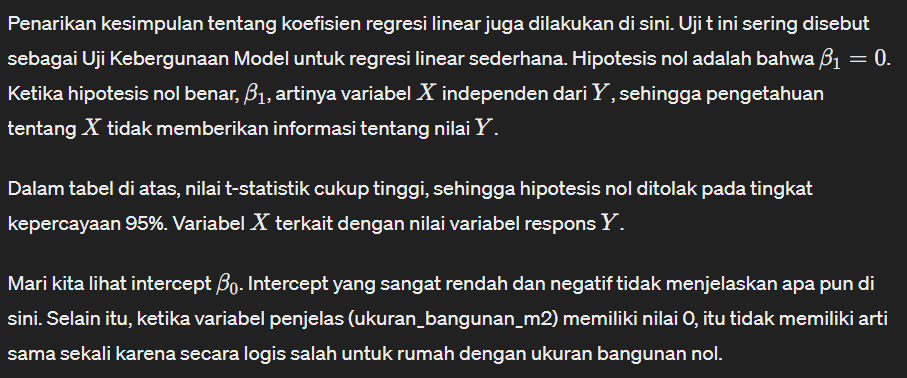

#### keterangan tabel 
Tabel yang Anda berikan berisi hasil estimasi koefisien regresi, kesalahan standar, nilai t-statistik, nilai p-nilai (P>|t|), serta interval kepercayaan 95% untuk koefisien building_size_m2.

- **Koefisien building_size_m2:** Angka 2.481e+07 menunjukkan perkiraan nilai koefisien untuk variabel building_size_m2. Ini berarti ketika ukuran bangunan meningkat sebesar 1 unit, harga rumah diperkirakan akan meningkat sebesar 2.481e+07 unit mata uang (misalnya, Rupiah).

- **Kesalahan standar (std err):** Angka 4.23e+05 adalah kesalahan standar dari estimasi koefisien building_size_m2.

- **Nilai t-statistik (t):** Angka 58.728 adalah nilai t-statistik untuk koefisien building_size_m2. Ini menunjukkan seberapa signifikan koefisien tersebut dalam model regresi. Nilai t-statistik yang tinggi menunjukkan bahwa koefisien building_size_m2 secara signifikan berbeda dari 0.

- **Nilai p-nilai (P>|t|):** Angka 0.000 menunjukkan nilai p-nilai untuk koefisien building_size_m2. Nilai p-nilai yang sangat rendah (0.000) menunjukkan bahwa koefisien building_size_m2 secara signifikan berbeda dari 0 pada tingkat signifikansi 0.05.

- **Interval kepercayaan 95%:** Interval kepercayaan 95% untuk koefisien building_size_m2 adalah (2.4e+07, 2.56e+07). Ini menunjukkan rentang di mana kita yakin koefisien sebenarnya berada dengan tingkat kepercayaan 95%. Dalam hal ini, kita yakin bahwa efek ukuran bangunan terhadap harga rumah antara 2.4e+07 dan 2.56e+07 unit mata uang.

In [95]:
# regression formula
# price_in_rp ~ building_size_m2
lm_1 = OLS(y, X)
results_1 = lm_1.fit()
results_1.summary().tables[0]

<class 'statsmodels.iolib.table.SimpleTable'>

#### keterangan tabel/output

Informasi ini diperoleh dari output suatu analisis regresi linear menggunakan metode OLS (Ordinary Least Squares), yang merupakan metode umum yang digunakan untuk menemukan garis regresi terbaik yang sesuai dengan data. 

Berikut adalah penjelasan untuk beberapa istilah yang terdapat dalam output tersebut:

- **Dep. Variable (Variabel Dependen)**: Variabel yang diprediksi atau dijelaskan oleh model. Dalam hal ini, variabel "y" merupakan variabel dependen.

- **R-squared (Koefisien Determinasi)**: Mencerminkan proporsi variabilitas dari variabel dependen yang dapat dijelaskan oleh variabel independen dalam model. Nilai R-squared sebesar 0.529 menunjukkan bahwa sekitar 52.9% variabilitas dari variabel dependen dapat dijelaskan oleh variabel independen dalam model.

- **Adj. R-squared (Koefisien Determinasi Disesuaikan)**: Versi penyesuaian dari R-squared yang memperhitungkan jumlah variabel independen dan jumlah sampel dalam model. 

- **F-statistic**: Uji statistik yang menguji signifikansi keseluruhan model regresi. Nilai F-statistic sebesar 3449 dengan Prob (F-statistic) 0.00 menunjukkan bahwa model secara keseluruhan signifikan secara statistik.

- **No. Observations (Jumlah Observasi)**: Jumlah sampel atau observasi yang digunakan dalam analisis.

- **Df Residuals (Derajat Kebebasan Residual)**: Derajat kebebasan dari residual, yaitu jumlah observasi dikurangi jumlah parameter dalam model.

- **Df Model (Derajat Kebebasan Model)**: Jumlah parameter dalam model, termasuk intercept dan variabel independen.

- **Covariance Type (Tipe Kovariansi)**: Menunjukkan jenis kovariansi yang digunakan dalam menghitung kesalahan standar dan uji statistik. Dalam hal ini, tipe kovariansi adalah "nonrobust", yang berarti tidak ada penyesuaian untuk ketidaknormalan atau heteroskedastisitas dalam data.

In [96]:
results_1.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

#### keterangan output

hasil estimasi koefisien untuk variabel independen "building_size_m2" dalam model regresi linear. Berikut adalah penjelasan dari setiap kolom:

coef (Koefisien): Angka 2.481e+07 menunjukkan perkiraan nilai koefisien untuk variabel independen "building_size_m2" dalam model regresi. Ini berarti ketika ukuran bangunan meningkat sebesar 1 unit, harga rumah diperkirakan akan meningkat sebesar 2.481e+07 unit mata uang (misalnya, Rupiah).

std err (Kesalahan Standar): Angka 4.23e+05 adalah kesalahan standar dari estimasi koefisien "building_size_m2". Ini menunjukkan seberapa akurat estimasi koefisien tersebut.

t (Nilai t-statistik): Angka 58.728 adalah nilai t-statistik untuk koefisien "building_size_m2". Nilai t-statistik yang tinggi menunjukkan bahwa koefisien tersebut signifikan secara statistik.

P>|t| (Nilai p-nilai): Angka 0.000 menunjukkan nilai p-nilai untuk koefisien "building_size_m2". Nilai p-nilai yang sangat rendah menunjukkan bahwa koefisien "building_size_m2" signifikan secara statistik pada tingkat signifikansi 0.05.

[0.025 0.975] (Interval Kepercayaan 95%): Rentang di mana kita yakin koefisien sebenarnya berada dengan tingkat kepercayaan 95%. Dalam hal ini, rentangnya adalah antara 2.4e+07 dan 2.56e+07. Artinya, kita yakin bahwa efek ukuran bangunan terhadap harga rumah antara 2.4e+07 dan 2.56e+07 unit mata uang.

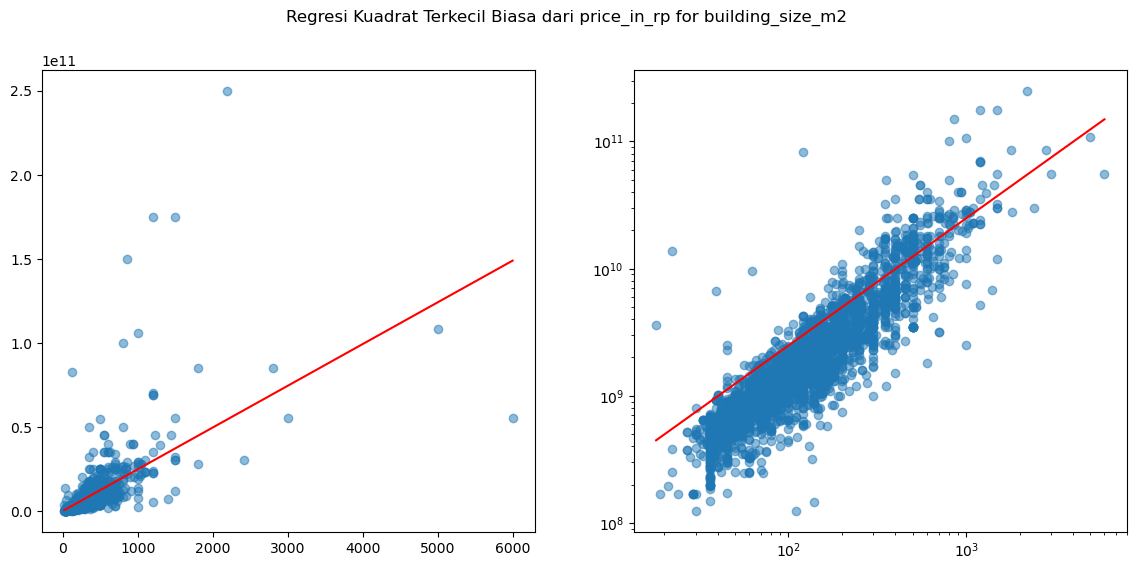

In [97]:
# linear OLS
y_predict_1 = results_1.predict(X)
mse_1 = mean_squared_error(y, y_predict_1)
# plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for ax_ in ax:
    ax_.scatter(X.building_size_m2, y, alpha=0.5)
    ax_.plot(
        np.sort(X.building_size_m2),
        y_predict_1[np.argsort(X.building_size_m2)], color='r',
        label=f'RMSE = {np.sqrt(mse_1)}'
        )
ax[1].set_xscale('log')
ax[1].set_yscale('log')
fig.suptitle('Regresi Kuadrat Terkecil Biasa dari price_in_rp for building_size_m2')
plt.show()
 

#### keterangan output

Ketidakpastian/variabilitas dari y sepanjang garis regresi cenderung meningkat. Gambar di sisi kanan melibatkan observasi yang sama, tetapi baik sumbu x maupun sumbu y memiliki skala logaritmik. Gambar tersebut menunjukkan bagaimana varians yang konstan seharusnya terlihat, tidak seperti yang ditunjukkan oleh gambar di sisi kiri.

Namun, gambar di sisi kanan menjelaskan bahwa ada hubungan linear antara variabel penjelas dan variabel target kita, tetapi jangan tertipu oleh respons yang tersebar secara merata (varians konstan) sepanjang garis regresi karena hasil aktualnya adalah gambar di sisi kiri.

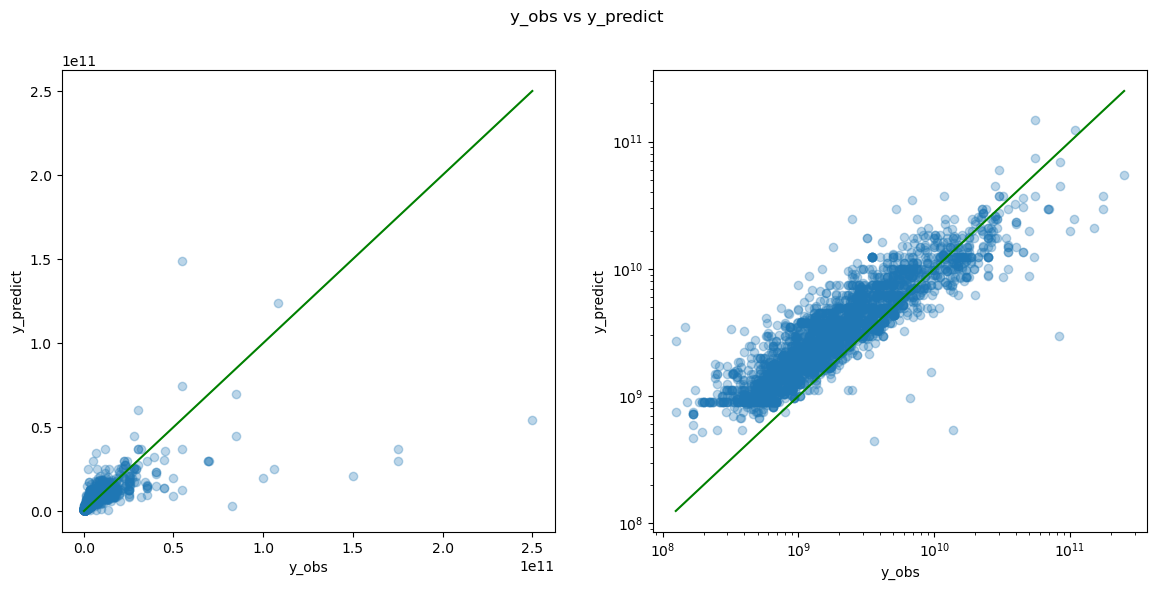

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for ax_ in ax:
    ax_.scatter(x=y, y=y_predict_1, alpha=0.3)
    ax_.plot(np.sort(y), np.sort(y), color='g')
    ax_.set_xlabel('y_obs')
    ax_.set_ylabel('y_predict')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
fig.suptitle('y_obs vs y_predict')
plt.show()

Plot di atas menunjukkan observasi aktual vs prediksi model linear. Perhatikan bahwa penyebaran observasi juga dapat diidentifikasi pada plot di sisi kiri di atas. Model linear yang memiliki karakteristik ideal seharusnya mirip dengan apa yang ditunjukkan plot di sisi kanan.

Garis hijau mewakili x = y = y_obs, garis prediksi tepat dari y_obs. Model linear kita tampaknya memperkirakan y terlalu tinggi untuk harga rumah yang lebih rendah.

### Analisis Residual Regresi Linier Sederhana

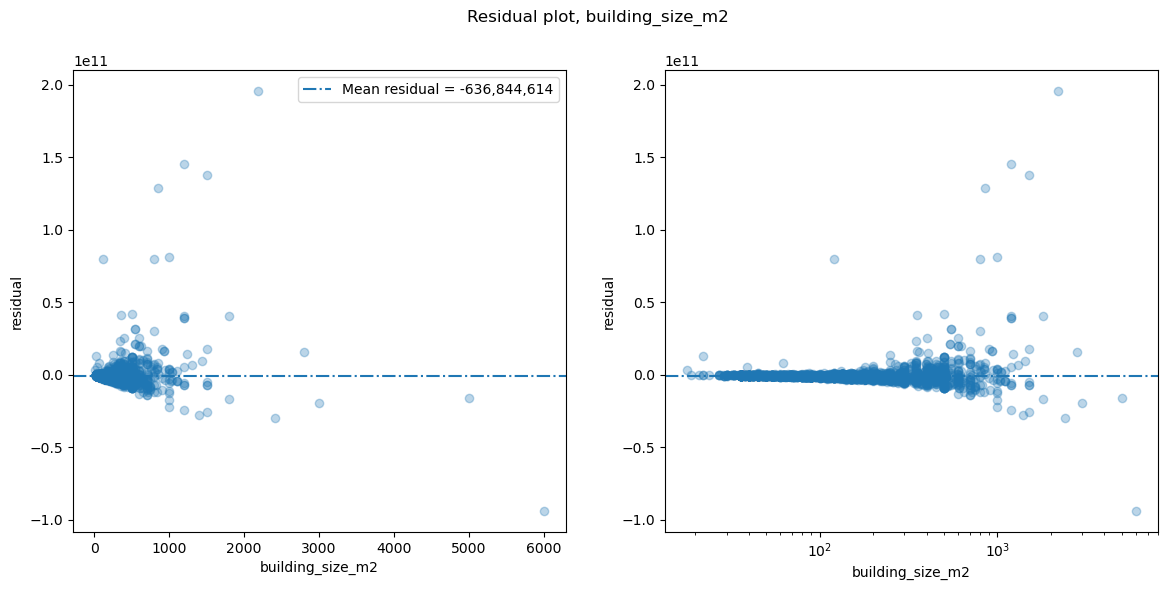

In [99]:
resid_1 = y - y_predict_1
mean_resid_1 = np.mean(resid_1)
# matpltlib plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for ax_ in ax:
    ax_.scatter(x=X_train.building_size_m2.values.reshape(-1, 1), y=resid_1, alpha=0.3)
    ax_.axhline(
        y=resid_1.mean(), linestyle='-.',
        label=f'Mean residual = {mean_resid_1:,.0f}')
    ax_.set_xlabel('building_size_m2')
    ax_.set_ylabel('residual')
fig.suptitle('Residual plot, building_size_m2')
ax[0].legend()
ax[1].set_xscale('log') 

Gambar di sebelah kiri menunjukkan bahwa variabilitas residu agak meningkat seiring dengan bertambahnya ukuran bangunan. Gambar di sebelah kanan memperbesar pola peningkatan residu, menunjukkan residu positif pada sumbu skala log.

 rata-rata residu mendekati setengah miliar Rupiah, itu menunjukkan bahwa model regresi cenderung melakukan prediksi yang terlalu tinggi atau terlalu rendah secara konsisten. Hal ini menandakan bahwa model memiliki bias yang signifikan, yang dapat mengganggu interpretasi dan penggunaannya dalam memprediksi nilai-nilai baru. Pelanggaran terhadap asumsi kesalahan OLS dapat mengarah pada estimasi parameter yang tidak konsisten atau tidak efisien. Dalam hal ini, perlu dieksplorasi lebih lanjut untuk mengidentifikasi sumber bias dan memperbaiki model.

 kesimpulan : model yang didapatkan belum cukup bagus- karena masih terdapat bias

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



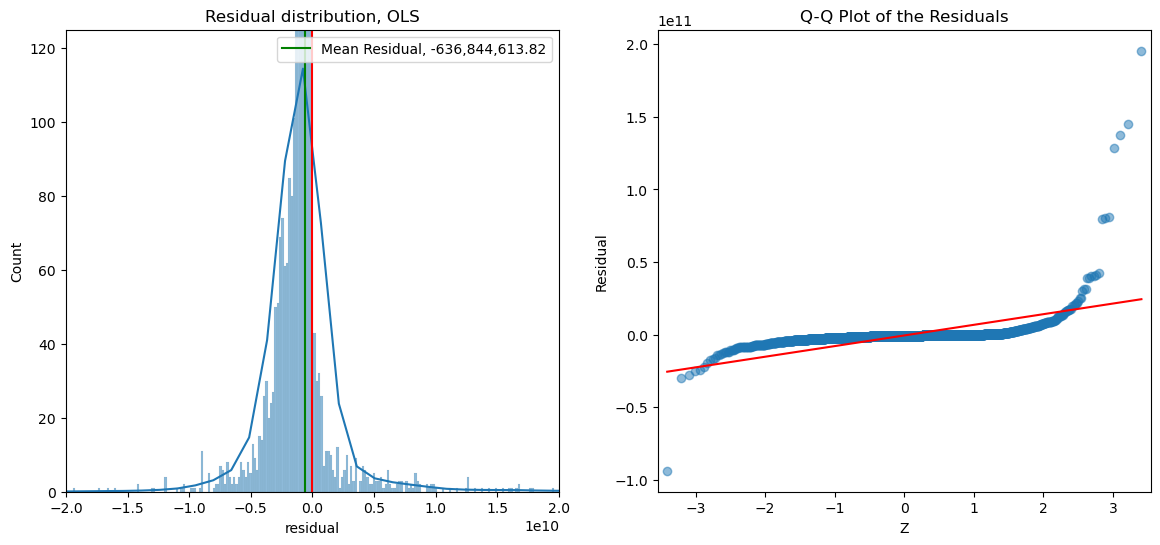

In [100]:
from statsmodels.graphics.gofplots import ProbPlot

# ditribution of residual plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(x=resid_1, ax=ax[0], kde=True)
ax[0].set_title('Residual distribution, OLS')
ax[0].set_xlabel('residual')
ax[0].set_xlim(-2e10, 2e10)
ax[0].set_ylim(0, 125)
ax[0].axvline(color='red')
ax[0].axvline(mean_resid_1, color='green', label=f'Mean Residual, {mean_resid_1:,.2f}')
ax[0].legend()
# Q-Q Plot
pplot = ProbPlot(resid_1)
pplot.qqplot(ax=ax[1], alpha=0.5, line='s')
ax[1].set_title('Q-Q Plot of the Residuals')
ax[1].set_xlabel('Z')
ax[1].set_ylabel('Residual')
plt.show()

#### keterangan output

Garis merah di sebelah kiri gambar adalah garis vertikal yang menjelaskan sisa = 0. Distribusinya agak bergeser ke kiri, dan karena sisa = yobs - yprediksi, ini membuktikan bahwa, secara umum, model kita melebih-lebihkan y sebenarnya. Oleh karena itu, dapat disimpulkan bahwa residunya tidak terletak pada 0.

Gambar sebelah kanan adalah plot Q-Q residu terhadap distribusi normal baku. Jika sisa terdistribusi secara normal, plot sisa harus ditempatkan rapat di dekat garis merah. Angka ini juga membuktikan bahwa distribusinya lebih bersifat fat-tailed dibandingkan distribusi normal.

Kuadrat Terkecil Biasa (OLS), menurut Teorema Gauss-Markov, berwarna BIRU: Penduga Tidak Bias Linier Terbaik, bila model kita memenuhi keenam asumsi klasik, termasuk asumsi varians konstan. ‘Terbaik’ mengacu pada varian minimum atau distribusi sampling tersempit. Namun, kumpulan data kami memiliki varian yang tidak konstan, yang biasa disebut dengan adanya heteroskedasitas. Dari gambar di atas, terlihat jelas bahwa kuadrat terkecil biasa merupakan penduga yang bias untuk kumpulan data kita.

Kami akan menggunakan uji Breusch-Pagan untuk heteroskedasitas menggunakan kode di bawah ini. Konsep uji Breusch-Pagan adalah mengestimasi regresi auxillary, yaitu regresi kuadrat residu pada variabel prediktor, kemudian menghitung statistik uji berdasarkan regresi tersebut. Namun karena pelanggaran normalitas seperti dijelaskan di atas, sebenarnya yang diuji adalah varian Koenker yang kuat terhadap distribusi tidak normal.



In [101]:
# uji heteroskedastisitas dalam model regresi

from statsmodels.stats.diagnostic import het_breuschpagan

exog_het = X_train['building_size_m2'].values.reshape(-1, 1)
# since auxillary regression of residual 
# must have an intercept constant:
exog_het = add_constant(exog_het) 
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(resid_1, exog_het, robust=True)
pd.DataFrame({
    'statistic': ['lagrange multiplier', 'f'],
    'statistic_value': [lm, fvalue],
    'p_value': [lm_pvalue, f_pvalue]
    })

statistic  statistic_value  p_value
0  lagrange multiplier           273.16     0.00
1                    f           299.67     0.00

Hasil di atas menolak hipotesis nol tentang homoskedastisitas, yang menunjukkan bahwa varians kesalahan model tidak konstan, tetapi berubah-ubah sepanjang rentang nilai prediktor. Dalam situasi ini, metode Kuadrat Terkecil Tertimbang (Weighted Least Squares/ WLS) dapat digunakan sebagai alternatif untuk mengatasi masalah heteroskedastisitas.

Dalam WLS, bobot diberikan pada setiap observasi berdasarkan invers variansnya. Observasi dengan varians yang lebih kecil akan diberi bobot yang lebih tinggi, sehingga penekanan lebih besar diberikan pada observasi yang dianggap lebih andal atau memiliki variabilitas yang lebih rendah. Dengan menggunakan WLS, kita dapat menghasilkan estimasi parameter model yang lebih efisien dan konsisten.

Dengan menerapkan WLS, kita dapat mengatasi masalah heteroskedastisitas dalam model regresi dan meningkatkan akurasi serta keandalan prediksi. 

---

Output ini menunjukkan hasil dari tes homoskedastisitas, di mana hipotesis nolnya adalah homoskedastisitas, yang berarti varians kesalahan model konstan di sepanjang rentang nilai prediktor. Jika p-value yang terkait dengan tes tersebut rendah (biasanya di bawah tingkat signifikansi yang telah ditentukan, misalnya 0.05), maka kita menolak hipotesis nol, yang berarti kita menyimpulkan bahwa ada bukti yang cukup untuk menyatakan bahwa kesalahan model tidak homoskedastik.

Dalam output yang Anda berikan, dua uji homoskedastisitas telah dilakukan:

1. **Lagrange Multiplier Test**: Statistik tes adalah 273.16 dan p-value adalah 0.00. Karena p-value sangat kecil, kita menolak hipotesis nol, yang berarti kita memiliki bukti yang cukup untuk menyatakan bahwa model tidak homoskedastik.

2. **F-Test**: Statistik tes adalah 299.67 dan p-value adalah 0.00. Sama seperti sebelumnya, p-value yang sangat kecil menunjukkan bahwa kita menolak hipotesis nol tentang homoskedastisitas.

Dengan demikian, Hasil di atas menolak hipotesis nol tentang homoskedasitas. Kuadrat terkecil tertimbang (Weighted Least Square) dapat menjadi salah satu cara untuk mengatasi kondisi heteroskedasitas ini.

### Dealing with Non-Constant Variance

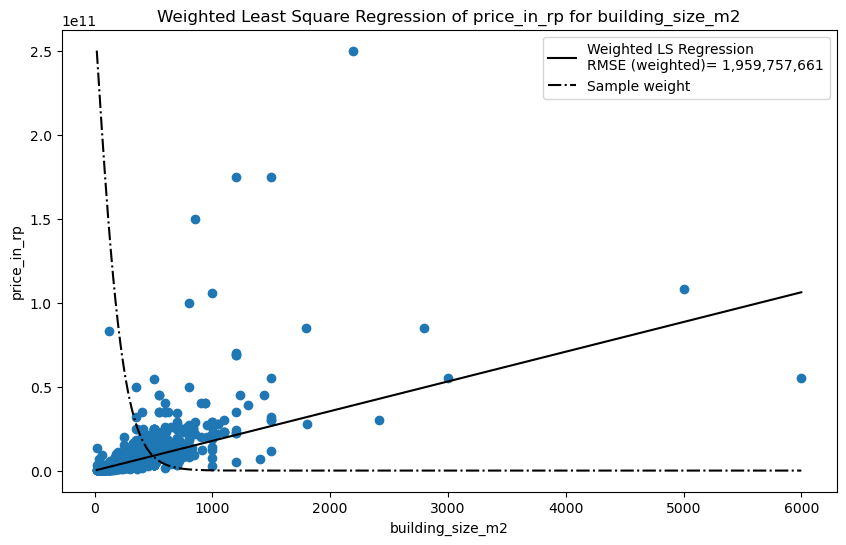

In [102]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_is_fitted

class HetRobustRegression(BaseEstimator, RegressorMixin):
    """ 
    Heteroscedacity-Robust Regression. Reference:
    Atkinson, A.C, Riani, M., Torti, F.2016. Robust Methods for Heteroskedastic Regression.
    Computational Statistics and Data Analysis 104 (2016), 209 to 222.
    A form of weighted least square, which using parametric weight that is estimated
    iteratively.

    Parameters:
    -----------
    fit_intercept : Fit regressor using intercept. Default = True
    max_iter      : Max iteration limit. Default = 10000
    tol           : Tolerance until iteration stopped. Default = 1e-8
    """

    def __init__(self, fit_intercept=True, max_iter=10000, 
            initialbeta=None, initialgamma=None, tol=1e-8):
        self.fit_intercept = fit_intercept
        self.initialbeta = initialbeta # not applied yet, instead being estimated
        self.initialgamma = initialgamma
        self.max_iter = max_iter
        self.tol = tol

    def _estimate_gamma(self, X, y, Z):
        """ Estimate gamma for the parametric weight"""
        reg = LinearRegression(fit_intercept=self.fit_intercept)
        reg_result0 = reg.fit(X, y)
        self._n_params = reg_result0.n_features_in_ + int(self.fit_intercept)
        # since ._validate_data() has been performed by sklearn estimator,
        # length for response (n_samples, ) has been checked to match with
        # regressor (n_samples, n_features), so:
        self._n_samples = len(y)
        residual = y - reg_result0.predict(X)
        sigma2 = \
            residual.T @ residual / (self._n_samples - self._n_params) # estimate of variance
        # initial estimate of gamma, using Z and 
        #
        response_gamma0 = \
            self._n_samples * np.square(residual) / np.sum(np.square(residual)) - 1
        # Shape of Z (n_samples, n_heteroscedastic_features)
        # will also be verified by sklearn estimator to match with 
        # response y (n_samples, )
        reg_gamma = reg.fit(Z, response_gamma0)
        if self.fit_intercept:
            return reg_gamma.intercept_, reg_gamma.coef_
        return reg_gamma.coef_

    def _weighted_regressor(self, X, y, Z, gamma):
        if self.fit_intercept:
            zgamma = (np.c_[np.repeat(1, self._n_samples), Z] @ gamma.T).flatten()
        else:
            zgamma = (Z @ gamma.T).flatten()
        expzgamma = np.exp(zgamma)
        weight = np.power((1 + expzgamma), -1)
        reg = self._reg.fit(X, y, sample_weight=weight)
        # checking fitted data porperties
        if not self._n_params:
            self._n_params = reg.n_features_in_ + int(self.fit_intercept)
        if not self._n_samples:
            self._n_samples = len(y)
        return reg
    
    def _scoring(self, X, y, Z, fitted_regressor, gamma):
        if self.fit_intercept:
            zgamma = (np.c_[np.repeat(1, self._n_samples), Z] @ gamma.T).flatten()
        else:
            zgamma = (Z @ gamma.T).flatten()
        y_predict = fitted_regressor.predict(X)
        expzgamma = np.exp(zgamma)
        weight = np.power((1 + expzgamma), -1)
        sqrtweight = np.sqrt(weight)
        weighted_res2 = np.square(sqrtweight * (y - y_predict))
        sigma2 = np.sum(weighted_res2) / (self._n_samples - self._n_params)
        q = expzgamma / (1 + expzgamma)
        zq = Z * q.reshape(-1, 1)
        res2 = np.square(y - y_predict)
        yq = res2 / (sigma2 * (1 + expzgamma)) - 1
        reg_q = self._reg.fit(zq, yq)
        if self.fit_intercept:
            gamma_q = np.c_[reg_q.intercept_, reg_q.coef_]
        else:
            gamma_q = reg_q.coef_
        return gamma_q

    def _fitted_weight(self, Z):
        n_samples = Z.shape[0]
        if self.fit_intercept:
            zgamma = (np.c_[np.repeat(1, n_samples), Z] @ self.gamma_.T).flatten()
        else:
            zgamma = (Z @ self.gamma_.T).flatten()
        expzgamma = np.exp(zgamma)
        weight = np.power((1 + expzgamma), -1)
        return weight

    def fit(self, X, y, Z):
        """ 
        Fit the regressor into the dataset.

        Parameters:
        -----------
        X : Explanatory variable.
            An array of shape (n_samples, n_params)
        y : Dependent/response variable.
            An array of shape (n_samples, )
        Z : Explanatory variable responsible to heteroscedacity.
            An array of shape (n_samples, n_params).
            Must corresponds to one of X features.
        
        Attributes:
        -----------
        coef_       : Coefficient of regression model
        intercept_  : Intercept (if fit_intercept = True)
        gamma_      : Explanatory variable of sample_weight
                      sample_weight = f(gamma)
        weight_     : Sample weight of samples used in fit().
        n_iter_     : Number of iterations performed
        self.n_features_in_ : Number of features detected
                              during fit().

        Returns:
        --------
        LinearRegression : Fitted LinearRegression object.
        """

        # since we wrap sklearn function, ._validate_data() will be
        # performed under sklearn estimator
        self._n_params = None
        self._n_samples = None
        self._reg = LinearRegression(fit_intercept=self.fit_intercept)
        if self.initialgamma:
            gamma = self.initialgamma
        else:
            if self.fit_intercept:
                gamma_intercept, gamma_coef = self._estimate_gamma(X, y, Z)
                gamma = np.c_[gamma_intercept, gamma_coef]
            else:
                gamma = self._estimate_gamma(X, y, Z)                                                                                                 
        gamma_arr = gamma.reshape(1, Z.shape[1] + int(self.fit_intercept))
        reg_result_arr = np.array([self._weighted_regressor(X, y, Z, gamma)]).reshape(-1, 1)
        if self.fit_intercept:
            reg_params_arr = \
                np.c_[[reg_result_arr[0, 0].intercept_], reg_result_arr[0, 0].coef_]\
                    .reshape(1, self._n_params)
        else:
            reg_params_arr = reg_result_arr[0, 0].coef_.reshape(1, self._n_params)
        d_arr = np.c_[reg_params_arr, gamma_arr]
        delta = 1
        # initiate iter k + 1 until tolerance satisfied
        # or max_iter excedeed  
        for i in range(self.max_iter):
            gamma_q = \
                self._scoring(X, y, Z, reg_result_arr[i, 0], gamma_arr[i])\
                    .reshape(1, Z.shape[1] + int(self.fit_intercept))
            gamma_new = (gamma_arr[i] + delta * gamma_q[0])\
                .reshape(1, Z.shape[1] + int(self.fit_intercept))
            gamma_arr = np.r_[gamma_arr, gamma_new]
            reg_new = np.array([
                self._weighted_regressor(X, y, Z, gamma_arr[i + 1])
                ]).reshape(-1, 1)
            if self.fit_intercept:
                reg_params_new = np.c_[
                    [reg_new[0, 0].intercept_], reg_new[0, 0].coef_
                ].reshape(1, self._n_params)
            else:
                reg_params_new = reg_new[0, 0].coef_.reshape(1, self._n_params)
            d_new = np.c_[reg_params_new, gamma_new]
            reg_result_arr = np.r_[reg_result_arr, reg_new]
            reg_params_arr = np.r_[reg_params_arr, reg_params_new]
            d_arr = np.r_[d_arr, d_new]
            # distance is ||d_new - d||^2 / ||d||^2 < tol
            tol = \
                np.square(np.linalg.norm(d_arr[i + 1] - d_arr[i]))\
                / np.square(np.linalg.norm(d_arr[i]))
            if tol < self.tol:
                break
            elif i == (self.max_iter - 1):
                print(f'Warning: Iteration did not converge after {self.max_iter} iterations.')
        # Final converged parameter
        gamma = gamma_arr[-1]
        if self.fit_intercept:
            zgamma = (np.c_[np.repeat(1, self._n_samples), Z] @ gamma.T).flatten()
        else:
            zgamma = (Z @ gamma.T).flatten()   
        expzgamma = np.exp(zgamma)
        weight = np.power((1 + expzgamma), -1) 
        self._reg_result = reg_result_arr[-1, 0]
        y_predict = self._reg_result.predict(X)
        resid = np.sqrt(weight) * (y - y_predict) # weighted residual
        if self.fit_intercept:
            sigma2 = resid.T @ resid / (X.shape[0] - X.shape[1] - 1)
        else:
            sigma2 = resid.T @ resid / (X.shape[0] - X.shape[1])
        self.variance_ = sigma2
        self.coef_ = self._reg_result.coef_
        self.intercept_ = self._reg_result.intercept_
        self.n_features_in_ = self._reg_result.n_features_in_
        try:
            self.feature_names_in_ = self._reg_result.feature_names_in_
        except AttributeError:
            pass
        self.gamma_ = gamma
        self.weight_ = weight
        self.n_iter_ = iter
        return self      

    def predict(self, X):
        """ 
        Predict response/dependent variable
        Parameters:
        -----------
        X : Explanatory variable.
            An array of shape (n_samples, n_params)

        Returns:
        --------
        y : Predicted response.
            An array of shape (n_samples, )
        """

        check_is_fitted(self)
        return self._reg_result.predict(X)

    def get_sample_weight(self, Z):
        """ 
        Get the sample weight, which Z must correspond to X
        Returns sample weights of array (n_samples, ).
        Regressor must be fitted first.

        Parameters:
        -----------
        Z : Explanatory variable responsible to heteroscedacity.
            An array of shape (n_samples, n_params).

        Returns:
        --------
        weight : sample_weight of given explanatory variable
                 An array of shape(n_samples,)
        """
        check_is_fitted(self)
        weight = self._fitted_weight(Z)
        return weight

    def score(self, X, y, Z=None):
        """ 
        Calculate linear model (non-adjusted) R2 score.
        if Z is provided, weighted scoring will be performed.
        Regressor must be fitted first. 
        Score is calculated using fit(X) against y.

        Parameters:
        -----------
        X : Explanatory variable.
            An array of shape (n_samples, n_params)
        Z : Explanatory variable responsible to heteroscedacity.
            An array of shape (n_samples, n_params)

        Returns:
        --------
        R2 : R2 score of weighted least square regression
        """
        check_is_fitted(self)
        weight = None
        if Z.any():
            weight = self._fitted_weight(Z)
        return self._reg_result.score(X, y, sample_weight=weight)


#panggil
X = X_train['building_size_m2'].values.reshape(-1, 1)
y = y_train['price_in_rp'].values
robust_reg = HetRobustRegression(fit_intercept=False)
# Weighted LS with full dataset
lm_2a = robust_reg.fit(X, y, X)
y_predict_2a = robust_reg.predict(X)
sample_weight_a = lm_2a.weight_
sample_weight_a_normlzd = \
    (sample_weight_a - np.min(sample_weight_a)) / (np.max(sample_weight_a) - np.min(sample_weight_a))
scaled_weight_a = sample_weight_a_normlzd * np.max(y)
mse_2a = mean_squared_error(y, y_predict_2a, sample_weight=sample_weight_a)
# plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=X, y=y)
ax.plot(
    np.sort(X.flatten()), 
    y_predict_2a [np.argsort(X.flatten())], color='black',
    label=f'Weighted LS Regression\nRMSE (weighted)= {np.sqrt(mse_2a):,.0f}',
    )
ax.plot(
    np.sort(X.flatten()), 
    scaled_weight_a[np.argsort(X.flatten())], color='black',
    label='Sample weight', ls='-.'
    )
ax.set_title('Weighted Least Square Regression of price_in_rp for building_size_m2')
ax.set_xlabel('building_size_m2')
ax.set_ylabel('price_in_rp')
ax.legend()
plt.show()

Gambar di atas menunjukkan tren bobot dalam garis putus-putus. Di sini kita dapat melihat bobot menjadi jauh lebih kecil, terkait dengan peningkatan ukuran_m2 bangunan, dan mendekati nol tepat setelah data mulai menyebar.

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



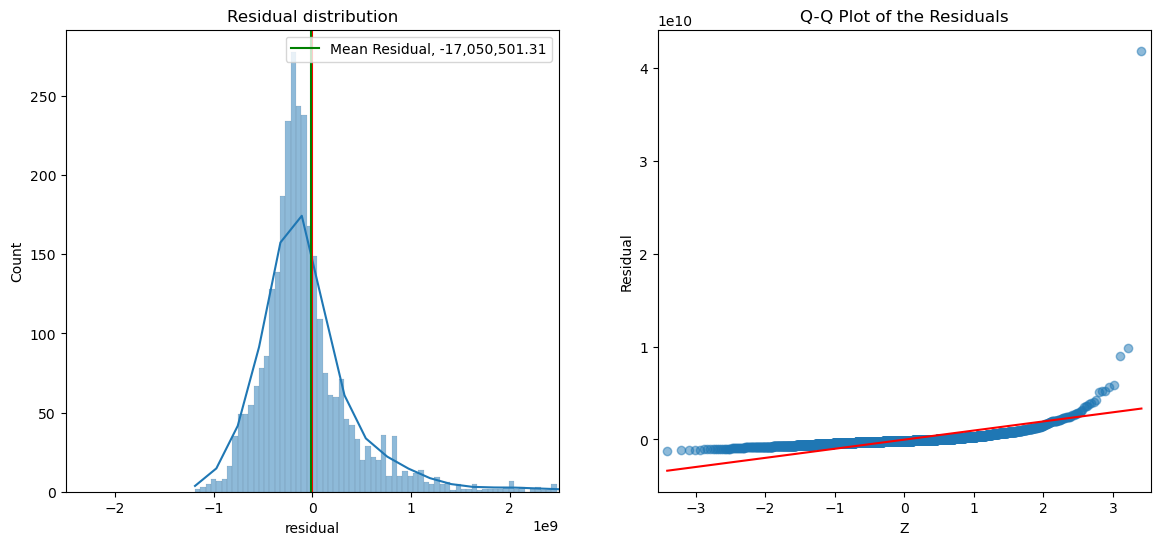

In [103]:
resid_2a = np.sqrt(sample_weight_a) * (y - y_predict_2a)
mean_resid_2a = np.mean(resid_2a)
# ditribution of residual plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(x=resid_2a, ax=ax[0], kde=True)
ax[0].set_title('Residual distribution')
ax[0].set_xlabel('residual')
ax[0].set_xlim(-2.5e9, 2.5e9)
ax[0].axvline(color='red')
ax[0].axvline(mean_resid_2a, color='green', label=f'Mean Residual, {mean_resid_2a:,.2f}')
ax[0].legend()
# Q-Q Plot
pplot = ProbPlot(resid_2a)
pplot.qqplot(ax=ax[1], alpha=0.5, line='s')
ax[1].set_title('Q-Q Plot of the Residuals')
ax[1].set_xlabel('Z')
ax[1].set_ylabel('Residual')
plt.show()

---
Rata-rata sisa berkurang drastis dibandingkan model OLS, dan mendekati 0. Perhatikan bahwa plot QQ juga lebih rapat ke garis normal standar.

Plot QQ (Quantile-Quantile) adalah plot yang digunakan untuk membandingkan distribusi kuantil dari dua set data. Biasanya, satu set data adalah distribusi yang diamati atau dihitung dari data aktual, sedangkan yang lain adalah distribusi yang teoritis atau diharapkan (misalnya, distribusi normal).

Plot QQ digunakan untuk mengevaluasi kesesuaian antara dua distribusi dengan membandingkan kuantilnya. Jika dua distribusi cocok dengan baik, titik-titik pada plot QQ akan mengikuti garis diagonal yang dikenal sebagai "garis QQ". Namun, jika ada perbedaan antara distribusi yang diamati dan yang diharapkan, titik-titik akan menjauh dari garis QQ.

Plot QQ biasanya digunakan dalam analisis statistik untuk memeriksa apakah data mengikuti distribusi tertentu, seperti distribusi normal. Jika titik-titik pada plot QQ berada dekat dengan garis diagonal, ini menunjukkan bahwa distribusi data cukup dekat dengan distribusi yang diharapkan. Namun, jika titik-titik menjauh dari garis diagonal, ini menunjukkan bahwa distribusi data tidak cocok dengan distribusi yang diharapkan.

Dengan demikian, plot QQ memberikan cara visual untuk mengevaluasi kesesuaian distribusi data dengan distribusi yang diharapkan, dan merupakan alat yang berguna dalam analisis statistik dan pengujian asumsi model.

### Outliers Detection: Studentized Residual, Leverage Point, Cook Distance

Bentuk standar dari residu pengamatan, atau umumnya disebut sebagai residual studentized, dapat digunakan untuk mendeteksi apakah sebuah observasi adalah outlier. Hal ini karena residu standar ke-i mengindikasikan seberapa jauh observasi ke-i yang sesuai tersebut dari prediksi ke-i dalam satuan deviasi standar.

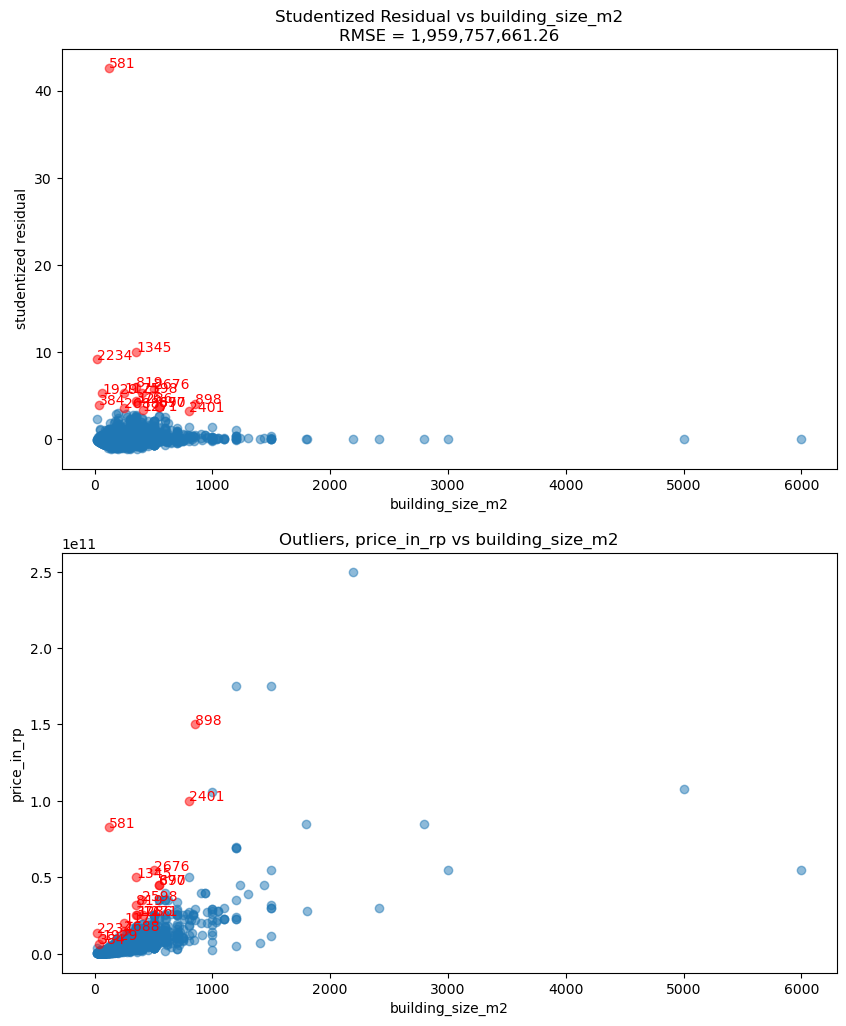

In [104]:
from scipy.sparse import diags

# Cook Distance
X = X_train['building_size_m2'].values.reshape(-1, 1)
y = y_train['price_in_rp'].values
W = diags(sample_weight_a)
p = X.shape[1] # no intercept
Xw = np.sqrt(W) @ X
yw = y * np.sqrt(sample_weight_a)
I = np.identity(len(y))
H = Xw @ np.linalg.inv((Xw.T) @ Xw) @ (Xw.T)
resid = (I - H) @ yw
se2 = np.square(np.linalg.norm(resid)) / (len(y) - p) # se2 = SSE / (n - p), p = 1 since no intercept

# leverage is (weighted) hat matrix diagonal
h = np.diag(H)
student_resid = resid / np.sqrt(se2 * (1 - h))
outlier_obs = (np.absolute(student_resid) > 3)
outlier_obs_index = np.where(outlier_obs)[0]
# plot
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Studentized Residual Plot
ax[0].scatter(x=X[~outlier_obs], y=student_resid[~outlier_obs], alpha=0.5)
ax[0].scatter(x=X[outlier_obs], y=student_resid[outlier_obs], alpha=0.5, color='r', label='Outliers')
for x, student_resid, index in np.c_[X[outlier_obs], student_resid[outlier_obs], outlier_obs_index]:
    ax[0].text(x=x, y=student_resid, s=str(int(index)), color='r')
ax[0].set_ylabel('studentized residual')
ax[0].set_xlabel('building_size_m2')
ax[0].set_title(f'Studentized Residual vs building_size_m2\nRMSE = {np.sqrt(mse_2a):,.2f}')
# Observations Plot
ax[1].scatter(x=X[~outlier_obs], y=y[~outlier_obs], alpha=0.5)
ax[1].scatter(x=X[outlier_obs], y=y[outlier_obs], alpha=0.5, color='r', label='Outliers')
for x, y, index in np.c_[X[outlier_obs], y[outlier_obs], outlier_obs_index]:
    ax[1].text(x=x, y=y, s=str(int(index)), color='r')
ax[1].set_title('Outliers, price_in_rp vs building_size_m2')
ax[1].set_ylabel('price_in_rp')
ax[1].set_xlabel('building_size_m2')
plt.show()

---
Dalam plot yang dibuat, titik data biru menunjukkan observasi yang tidak dianggap sebagai outlier berdasarkan kriteria yang diberikan, sementara titik data merah menunjukkan observasi yang dianggap sebagai outlier.

(0.0, 2000.0)

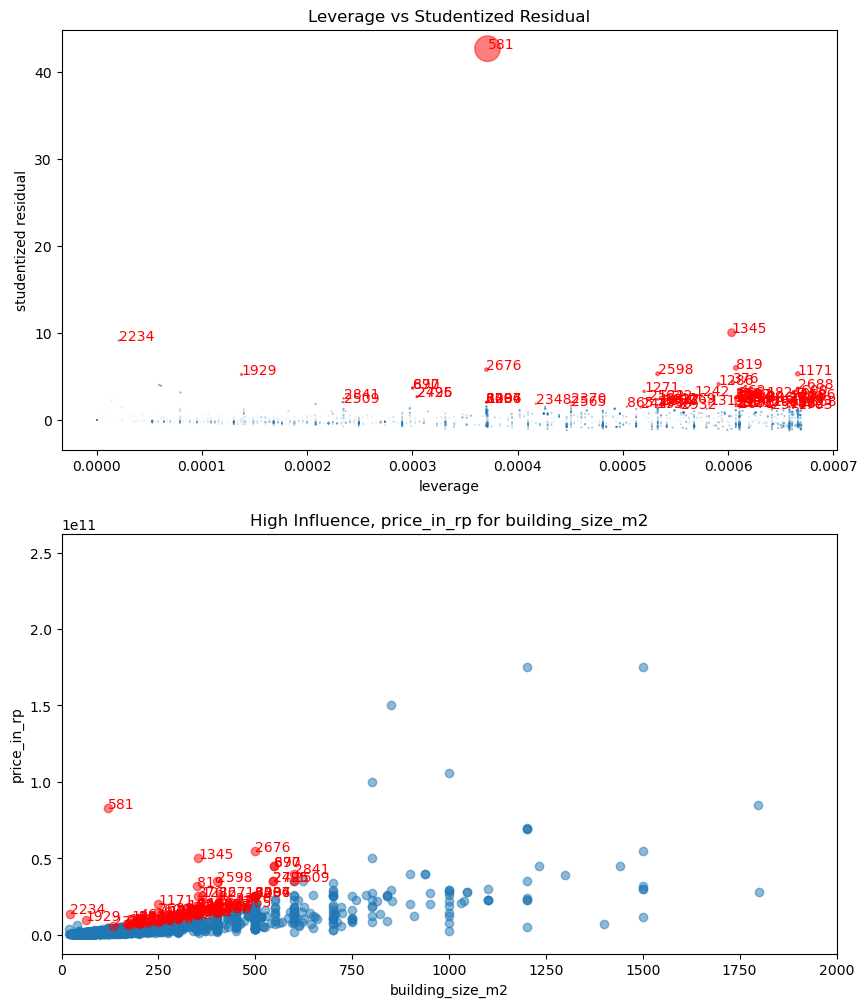

In [105]:
# Cook Distance
X = X_train['building_size_m2'].values.reshape(-1, 1)
y = y_train['price_in_rp'].values
W = diags(sample_weight_a)
p = X.shape[1] # no intercept
Xw = np.sqrt(W) @ X
yw = y * np.sqrt(sample_weight_a)
I = np.identity(len(y))
H = Xw @ np.linalg.inv((Xw.T) @ Xw) @ (Xw.T)
resid = (I - H) @ yw
se2 = np.square(np.linalg.norm(resid)) / (len(y) - p) # se2 = SSE / (n - p), p = 1 since no intercept
# leverage is (weighted) hat matrix diagonal
h = np.diag(H)
student_resid = resid / np.sqrt(se2 * (1 - h))
cooks_dist = (np.square(resid) / (p * se2)) * (h / np.square(1 - h))
high_influence_obs = (cooks_dist >= (3 / (X.shape[0] - p)))
high_influence_obs_index = np.where(high_influence_obs)[0]
# High Influence Plot
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
ax[0].scatter(
    x=h[~high_influence_obs], y=student_resid[~high_influence_obs], 
    s= cooks_dist[~high_influence_obs] * 500, alpha=0.5)
ax[0].scatter(
    x=h[high_influence_obs], y=student_resid[high_influence_obs], 
    alpha=0.5, color='r', s=cooks_dist[high_influence_obs] * 500,
    label='high influence')
for lev, stud_resid, index in np.c_[
    h[high_influence_obs], student_resid[high_influence_obs], high_influence_obs_index]:
    ax[0].text(x=lev, y=stud_resid, s=str(int(index)), color='r')
ax[0].set_ylabel('studentized residual')
ax[0].set_xlabel('leverage')
ax[0].set_title('Leverage vs Studentized Residual')
# Observations Plot
ax[1].scatter(
    x=X[~high_influence_obs], y=y[~high_influence_obs], alpha=0.5)
ax[1].scatter(
    x=X[high_influence_obs], y=y[high_influence_obs], 
    alpha=0.5, color='r', label='Outliers')
for x, y, index in np.c_[X[high_influence_obs], y[high_influence_obs], high_influence_obs_index]:
    ax[1].text(x=x, y=y, s=str(int(index)), color='r')
ax[1].set_title('High Influence, price_in_rp for building_size_m2')
ax[1].set_ylabel('price_in_rp')
ax[1].set_xlabel('building_size_m2')
ax[1].set_xlim(0, 2000)

Perlu dicatat bahwa metode kuadrat terkecil tertimbang kami tidak mengidentifikasi luas bangunan yang lebih besar sebagai pengaruh tinggi, karena telah mempertimbangkan bobotnya. Estimator sekarang lebih fokus pada sampel dengan bobot yang lebih tinggi (misalnya, luas bangunan yang lebih kecil). Perhatikan bahwa beberapa indeks yang ditandai sebagai outlier sebelumnya juga ditampilkan di atas.

Sekarang mari kita akhiri model kami untuk mengecualikan observasi yang memiliki pengaruh tinggi tersebut.

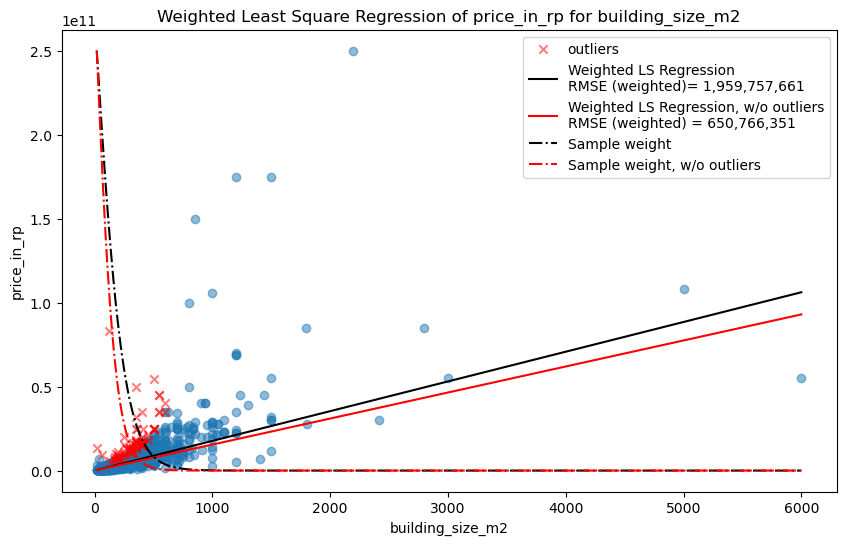

In [106]:
X = X_train['building_size_m2'].values.reshape(-1, 1)
y = y_train['price_in_rp'].values
# Weighted OLS without outliers
lm_2b = robust_reg.fit(X[~high_influence_obs], y[~high_influence_obs], X[~high_influence_obs])
y_predict_2b = robust_reg.predict(X[~high_influence_obs])
sample_weight_b = lm_2b.weight_
sample_weight_b_normlzd = \
    (sample_weight_b - np.min(sample_weight_b)) / (np.max(sample_weight_b) - np.min(sample_weight_b))
scaled_weight_b = sample_weight_b_normlzd * np.max(y)
mse_2b = mean_squared_error(y[~high_influence_obs], y_predict_2b, sample_weight=sample_weight_b)
# plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=X[~high_influence_obs], y=y[~high_influence_obs], alpha=0.5)
ax.scatter(
    x=X[high_influence_obs], y=y[high_influence_obs], 
    marker='x', color='r',alpha=0.5, label='outliers'
    )
ax.plot(
    np.sort(X.flatten()), 
    y_predict_2a[np.argsort(X.flatten())], color='black',
    label=f'Weighted LS Regression\nRMSE (weighted)= {np.sqrt(mse_2a):,.0f}',
    )
ax.plot(
    np.sort(X[~high_influence_obs].flatten()), 
    y_predict_2b[np.argsort(X[~high_influence_obs].flatten())], color='red',
    label=f'Weighted LS Regression, w/o outliers\nRMSE (weighted) = {np.sqrt(mse_2b):,.0f}',
    )
ax.plot(
    np.sort(X.flatten()), 
    scaled_weight_a[np.argsort(X.flatten())], color='black',
    label='Sample weight', ls='-.'
    )
ax.plot(
    np.sort(X[~high_influence_obs].flatten()), 
    scaled_weight_b[np.argsort(X[~high_influence_obs].flatten())], color='red',
    label='Sample weight, w/o outliers', ls='-.'
    )
ax.set_title('Weighted Least Square Regression of price_in_rp for building_size_m2')
ax.set_xlabel('building_size_m2')
ax.set_ylabel('price_in_rp')
ax.legend()
plt.show()

Gambar tersebut adalah plot yang menunjukkan hasil analisis Regresi Kuadrat Terkecil Tertimbang (Weighted Least Square Regression) dari `price_in_rp` (harga dalam Rupiah) terhadap `building_size_m2` (ukuran bangunan dalam meter persegi). Berikut adalah penjelasan komponen-komponen yang ada pada gambar:

1. **Judul**: "Weighted Least Square Regression of price_in_rp for building_size_m2" - Ini menunjukkan jenis analisis regresi yang dilakukan dan variabel yang terlibat.

2. **Sumbu**:
   - **Sumbu X**: Mewakili `building_size_m2`, ukuran bangunan dalam meter persegi.
   - **Sumbu Y**: Mewakili `price_in_rp`, harga dalam Rupiah Indonesia.

3. **Titik Data**:
   - Lingkaran biru mewakili titik data yang digunakan dalam analisis.
   - Tanda silang merah (x) mewakili outlier yang teridentifikasi dalam dataset.

4. **Garis Regresi**:
   - **Garis Hitam**: Garis regresi WLS untuk seluruh dataset, termasuk outlier. RMSE (Root Mean Squared Error) untuk regresi ini dilabeli sebagai "RMSE (weighted) = 1,959,757,661".
   - **Garis Merah**: Garis regresi WLS untuk dataset yang mengeluarkan outlier. RMSE untuk regresi ini dilabeli sebagai "RMSE (weighted) = 650,766,351".

5. **Garis Bobot Sampel**:
   - **Garis Hitam Titik-Titik**: Mewakili bobot sampel saat menyertakan outlier.
   - **Garis Merah Titik-Titik**: Mewakili bobot sampel saat mengeluarkan outlier.

6. **Legenda**: Menjelaskan simbol dan garis yang digunakan dalam plot:
   - **outliers**: Ditandai dengan tanda silang merah.
   - **Weighted LS Regression**: Garis hitam dengan RMSE-nya.
   - **Weighted LS Regression, w/o outliers**: Garis merah dengan RMSE-nya.
   - **Sample weight**: Diwakili oleh garis hitam titik-titik.
   - **Sample weight, w/o outliers**: Diwakili oleh garis merah titik-titik.

### Interpretasi:
- Plot menunjukkan bahwa ketika outlier disertakan (garis hitam), garis regresi dan RMSE sangat terpengaruh, yang menunjukkan kecocokan model yang lebih buruk.
- Mengeluarkan outlier (garis merah) menghasilkan RMSE yang lebih rendah, yang menunjukkan kecocokan model yang lebih baik dengan data.
- Kehadiran outlier mempengaruhi baik kemiringan garis regresi maupun metrik kesalahan, yang menunjukkan bahwa model lebih cocok untuk sebagian besar data 
- RMSE yang lebih rendah = Model yang lebih baik, karena menunjukkan bahwa model memiliki kesalahan prediksi yang lebih kecil dan lebih cocok dengan data aktual.tanpa nilai-nilai ekstrem ini.

### Kesimpulan:
Plot ini menggambarkan dampak outlier pada analisis regresi dan menyoroti peningkatan akurasi model (ditunjukkan oleh RMSE yang lebih rendah) ketika outlier dikeluarkan.

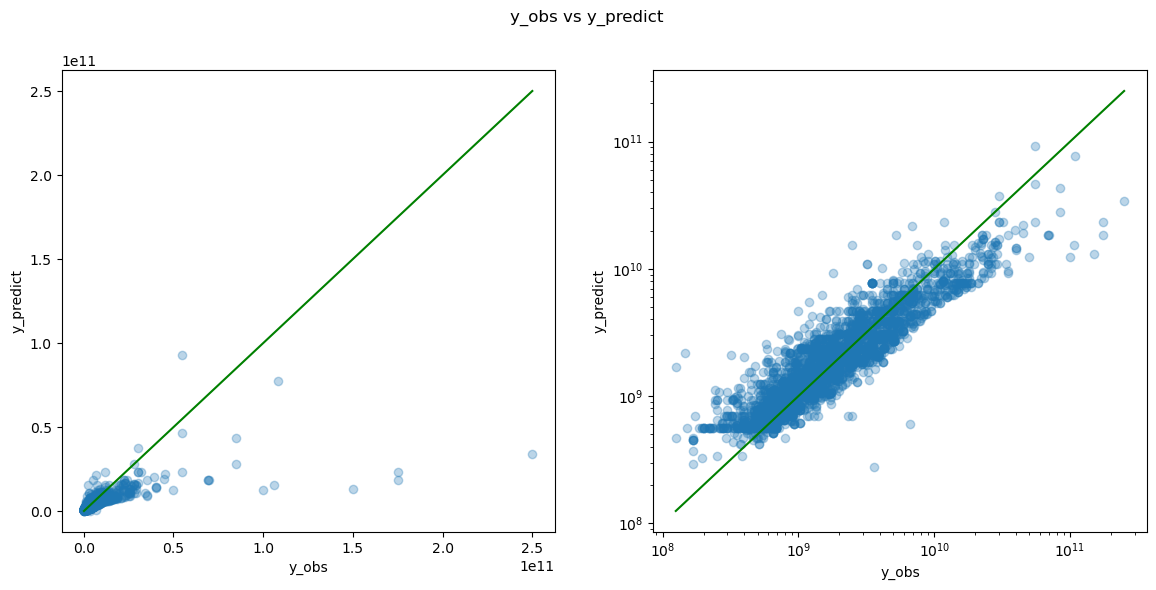

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for ax_ in ax:
    ax_.scatter(x=y[~high_influence_obs], y=y_predict_2b, alpha=0.3)
    ax_.plot(np.sort(y[~high_influence_obs]), np.sort(y[~high_influence_obs]), color='g')
    ax_.set_xlabel('y_obs')
    ax_.set_ylabel('y_predict')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
fig.suptitle('y_obs vs y_predict')
plt.show()

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



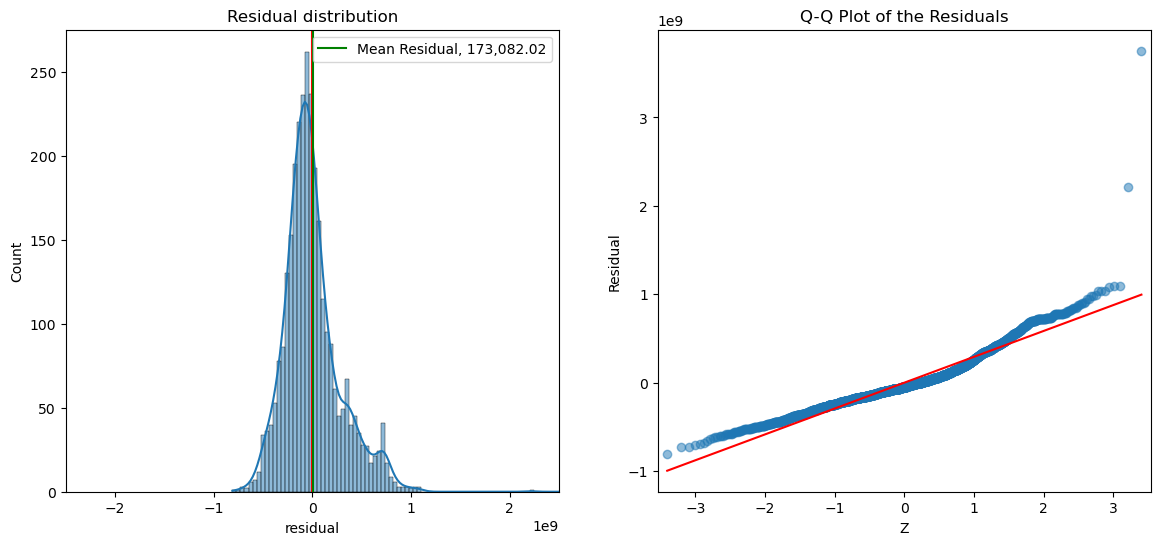

In [108]:
resid_2b = np.sqrt(sample_weight_b) * (y[~high_influence_obs] - y_predict_2b)
mean_resid_2b = np.mean(resid_2b)
# ditribution of residual plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(x=resid_2b, ax=ax[0], kde=True)
ax[0].set_title('Residual distribution')
ax[0].set_xlabel('residual')
ax[0].set_xlim(-2.5e9, 2.5e9)
ax[0].axvline(color='red')
ax[0].axvline(mean_resid_2b, color='green', label=f'Mean Residual, {mean_resid_2b:,.2f}')
ax[0].legend()
# Q-Q Plot
pplot = ProbPlot(resid_2b)
pplot.qqplot(ax=ax[1], alpha=0.5, line='s')
ax[1].set_title('Q-Q Plot of the Residuals')
ax[1].set_xlabel('Z')
ax[1].set_ylabel('Residual')
plt.show()

Hasilnya membaik, sisa menjadi mendekati nol mean dan semakin mendekati normalitas, meskipun sedikit condong positif.

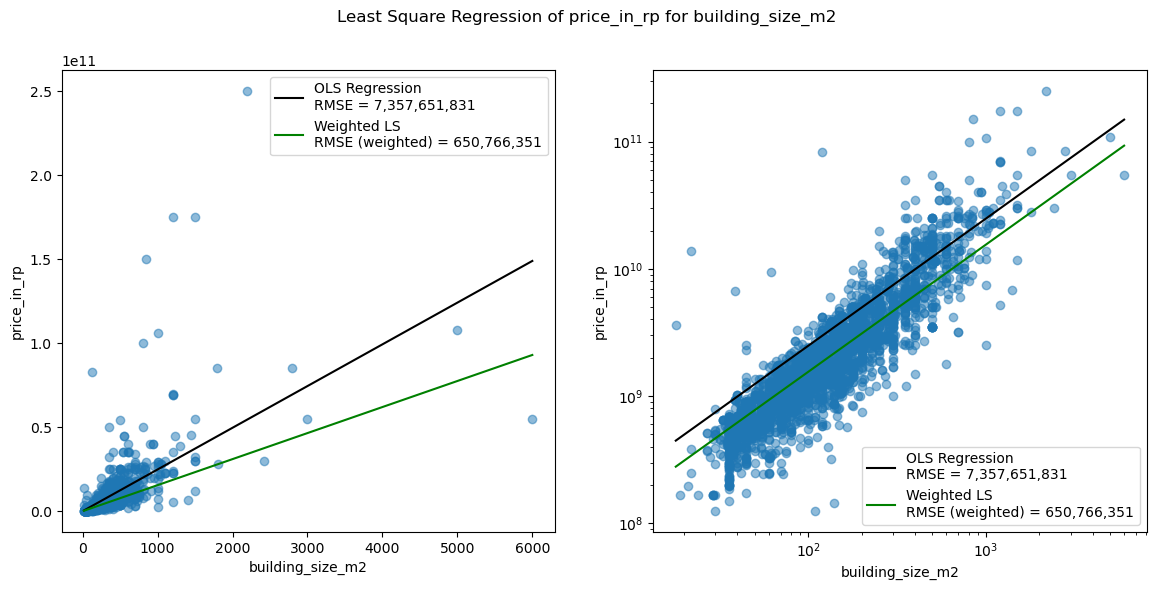

In [109]:
X = X_train['building_size_m2'].values
y = y_train['price_in_rp'].values
# plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for ax_ in ax:
    ax_.scatter(X, y, alpha=0.5)
    ax_.plot(
        np.sort(X),
        y_predict_1[np.argsort(X)], color='black',
        label=f'OLS Regression\nRMSE = {np.sqrt(mse_1):,.0f}'       
        )
    ax_.plot(
        np.sort(X[~high_influence_obs].flatten()), 
        y_predict_2b[np.argsort(X[~high_influence_obs].flatten())], color='green',
        label=f'Weighted LS\nRMSE (weighted) = {np.sqrt(mse_2b):,.0f}',
    )  
    ax_.legend()
    ax_.set_xlabel('building_size_m2')
    ax_.set_ylabel('price_in_rp')
fig.suptitle('Least Square Regression of price_in_rp for building_size_m2')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

---

Gambar tersebut adalah plot yang menunjukkan hasil analisis regresi Ordinary Least Squares (OLS) dan Weighted Least Squares (WLS) untuk variabel `price_in_rp` (harga dalam Rupiah) terhadap `building_size_m2` (ukuran bangunan dalam meter persegi). Plot ini terdiri dari dua sub-plot: satu dengan skala normal (kiri) dan satu dengan skala logaritmik (kanan). Berikut adalah penjelasan detail dari elemen-elemen yang ada dalam gambar tersebut:

### Sub-Plot Kiri (Skala Normal)
1. **Judul**: "Least Square Regression of price_in_rp for building_size_m2" - Menunjukkan jenis analisis regresi yang dilakukan dan variabel yang terlibat.

2. **Sumbu**:
   - **Sumbu X**: `building_size_m2`, ukuran bangunan dalam meter persegi.
   - **Sumbu Y**: `price_in_rp`, harga dalam Rupiah Indonesia.

3. **Titik Data**:
   - Lingkaran biru mewakili titik data yang digunakan dalam analisis.

4. **Garis Regresi**:
   - **Garis Hitam**: Garis regresi OLS, dengan RMSE sebesar 7,357,651,831. Ini menunjukkan garis regresi yang dihasilkan dari metode kuadrat terkecil biasa.
   - **Garis Hijau**: Garis regresi WLS, dengan RMSE sebesar 650,766,351. Ini menunjukkan garis regresi yang dihasilkan dari metode kuadrat terkecil tertimbang.

5. **Legenda**:
   - **OLS Regression**: Ditunjukkan oleh garis hitam dengan RMSE = 7,357,651,831.
   - **Weighted LS**: Ditunjukkan oleh garis hijau dengan RMSE (weighted) = 650,766,351.

### Sub-Plot Kanan (Skala Logaritmik)
1. **Sumbu**:
   - **Sumbu X**: `building_size_m2` dalam skala logaritmik.
   - **Sumbu Y**: `price_in_rp` dalam skala logaritmik.

2. **Titik Data**:
   - Lingkaran biru mewakili titik data yang digunakan dalam analisis dalam skala logaritmik.

3. **Garis Regresi**:
   - **Garis Hitam**: Garis regresi OLS pada skala logaritmik.
   - **Garis Hijau**: Garis regresi WLS pada skala logaritmik.

### Interpretasi:
- **Garis Hitam (OLS)**: Metode regresi ini memberikan garis yang cocok berdasarkan kuadrat terkecil tanpa mempertimbangkan bobot data. RMSE yang lebih tinggi (7,357,651,831) menunjukkan bahwa model ini memiliki kesalahan prediksi yang lebih besar dibandingkan dengan model WLS.
- **Garis Hijau (WLS)**: Metode regresi ini memberikan garis yang cocok dengan mempertimbangkan bobot dari data. RMSE yang lebih rendah (650,766,351) menunjukkan bahwa model ini memiliki kesalahan prediksi yang lebih kecil, yang berarti prediksi lebih akurat dibandingkan dengan model OLS.

### Kesimpulan:
- RMSE yang lebih rendah pada regresi WLS menunjukkan bahwa model ini lebih akurat dalam memprediksi `price_in_rp` berdasarkan `building_size_m2`.
- Skala logaritmik pada subplot kanan membantu untuk memahami distribusi data dan regresi dalam skala yang lebih luas serta mengatasi masalah skewness dalam data.

Secara keseluruhan, plot ini menunjukkan bahwa regresi tertimbang **(WLS) lebih efektif dalam memodelkan hubungan antara harga dan ukuran bangunan dibandingkan dengan regresi kuadrat terkecil biasa (OLS)**, karena menghasilkan kesalahan prediksi yang lebih rendah (RMSE lebih rendah).



In [110]:
def coefficient(x, y_null, boot_resid):
    epsilon = np.random.choice([1, -1], len(y_null), p=[0.5, 0.5]) # Flachair's pick distribution
    boot_resid_ = boot_resid.flatten()
    resid_dgp = boot_resid_ * epsilon
    y_dgp = (y_null + resid_dgp).flatten()
    lm_boots = OLS(y_dgp, x)
    result_boots = lm_boots.fit()
    coef_boots = result_boots.params[0]
    return coef_boots

X = X_train['building_size_m2'].values.reshape(-1, 1)[~high_influence_obs]
y = y_train['price_in_rp'].values[~high_influence_obs]
# prediction
lm = HetRobustRegression(fit_intercept=False)
results = lm.fit(X, y, X)
y_predict = results.predict(X) # y_predict here serves beta as the null hypotheses for bootstrap
coef = results.coef_
# calculate hat matrix
h = np.diag(X @ np.linalg.inv((X.T) @ X) @ (X.T)) #  = h_t in Flachair (2003)
# calculate adjusted residual
residual = y - y_predict # = OLS restricted residuals in Flachair (2003)
a = 1/ (1 - h) # using HC3 as proposed by Flachair (2003)
resid = a * residual
adj_resid = resid - np.mean(resid)
# bootstrap
arr = np.empty(len(y))
sample = (arr, )
confidence_level = 0.95
lower_tail = (1 - confidence_level) / 2
upper_tail = 1 - lower_tail 
bootstrap_res = bootstrap(
    sample, lambda arr: coefficient(X, y_predict, adj_resid), vectorized=False, 
    confidence_level=confidence_level, method='percentile'
)
pd.DataFrame([
    {'model': 'Weighted OLS, w/o outliers', 
    'coef': coef[0],
    f'ci_low ({lower_tail:.3f})': bootstrap_res.confidence_interval[0],
    f'ci_high({upper_tail:.3f})': bootstrap_res.confidence_interval[1],
    'bootstrap_se': bootstrap_res.standard_error}
    ])

model          coef  ci_low (0.025)  ci_high(0.975)  \
0  Weighted OLS, w/o outliers 15,490,373.55   10,973,499.39   19,982,454.81   

   bootstrap_se  
0  2,383,513.13

Intervalnya tidak mencakup 0, oleh karena itu dalam batas kepercayaan 95%, ukuran_m2 bangunan adalah parameter regresi linier yang signifikan secara statistik. Estimasi nilainya adalah Rp. 15.490.373 dengan margin of error kurang dari 5.000.000.

Bandingkan dengan interval yang dihitung menggunakan distribusi t siswa berdasarkan kesalahan standar koefisien:

In [111]:
results_1.summary(alpha=0.05).tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

Intinya adalah bahwa untuk kumpulan data besar dengan kecondongan dan varians tidak konstan, interval kepercayaan yang dihitung menggunakan metode bootstrap lebih andal daripada distribusi-t, karena bootstrap lebih baik dalam menggambarkan distribusi koefisien yang sebenarnya.

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



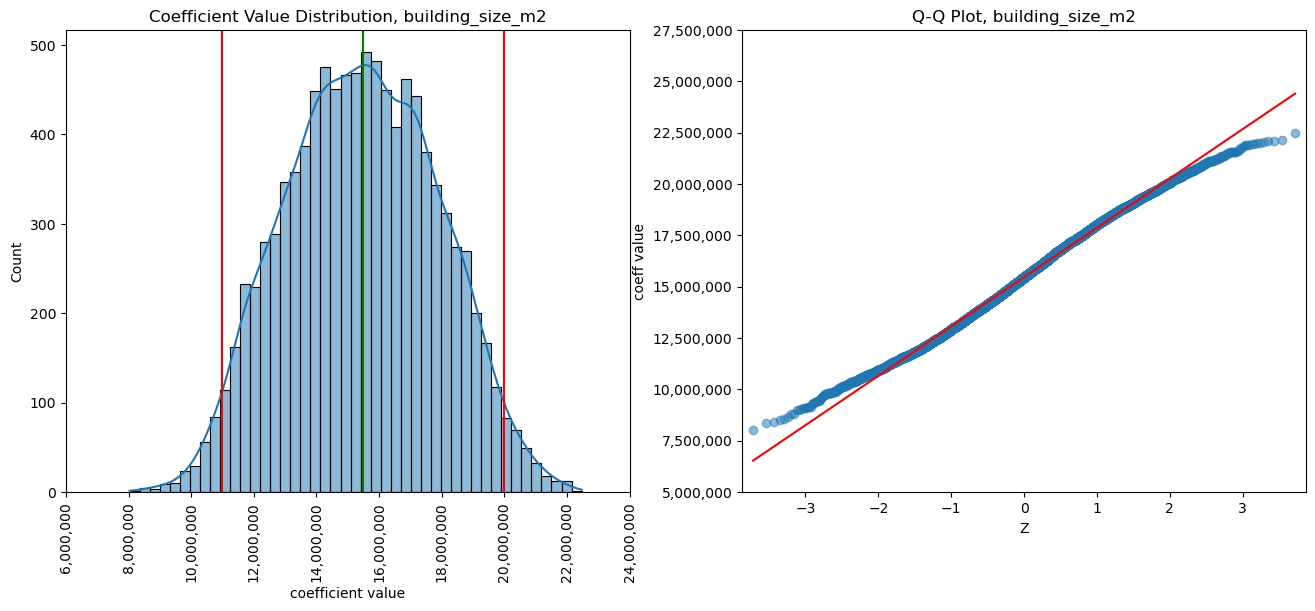

In [112]:
X = X_train['building_size_m2'].values.reshape(-1, 1)[~high_influence_obs]
y = y_train['price_in_rp'].values[~high_influence_obs]
# prediction
lm = HetRobustRegression(fit_intercept=False)
results = lm.fit(X, y, X)
y_predict = results.predict(X) # y_predict here serves beta as the null hypotheses for bootstrap
coef = results.coef_
# calculate hat matrix
h = np.diag(X @ np.linalg.inv((X.T) @ X) @ (X.T)) #  = h_t in Flachair (2003)
# calculate adjusted residual
residual = y - y_predict # = OLS restricted residuals in Flachair (2003)
a = 1/ (1 - h) # using HC3 as proposed by Flachair (2003)
resid = a * residual
adj_resid = resid - np.mean(resid)
# bootstrapping
n_iter = 9999
arr = np.empty((n_iter, 1))
bootstrap_coeff_value = \
    np.apply_along_axis(lambda x: coefficient(X, y_predict, resid), 1, arr)
# plotting bootstrap result
conf_low = bootstrap_res.confidence_interval[0]
conf_high = bootstrap_res.confidence_interval[1]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(
    x=bootstrap_coeff_value, kde=True, ax=ax[0]
    )
ax[0].axvline(coef[0], color='g')
ax[0].axvline(conf_low, color='r')
ax[0].axvline(conf_high, color='r')
xticks = ax[0].get_xticks()
ax[0].set_title('Coefficient Value Distribution, building_size_m2')
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(['{:,.0f}'.format(x) for x in xticks], rotation=90)
ax[0].set_xlabel('coefficient value')
# Q-Q Plot
pplot = ProbPlot(bootstrap_coeff_value.flatten())
pplot.qqplot(ax=ax[1], alpha=0.5, line='s')
yticks = ax[1].get_yticks()
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(['{:,.0f}'.format(y) for y in yticks])
ax[1].set_title('Q-Q Plot, building_size_m2')
ax[1].set_xlabel('Z')
ax[1].set_ylabel('coeff value')
plt.show()

Meskipun plot Q-Q menunjukkan kecenderungan mendekati normalitas, distribusinya memiliki ekor yang tebal (fat-tailed), yang menandakan adanya skewness. Efek dari ukuran sampel yang belum mencukupi dapat menyebabkan distribusi tersebut belum mendekati normalitas sepenuhnya.

Distribusi yang skewed dan memiliki ekor yang tebal akan dipertimbangkan dalam perhitungan Interval BCa yang telah dihitung menggunakan program `scipy.stats.bootstrap`. Hal ini memastikan bahwa interval kepercayaan bootstrap (bootstrap confidence interval, CI) memberikan pilihan perhitungan CI yang lebih meyakinkan.

Dalam konteks rumus regresi kita, yaitu $y = 15,490,373 \times X$, di mana $y$ adalah harga rata-rata dalam Rp pada suatu ukuran_m2 bangunan tertentu, interval kepercayaan untuk parameter $X$ akan memungkinkan inferensi terhadap harga rata-rata $y$ pada tingkat kepercayaan 95%.

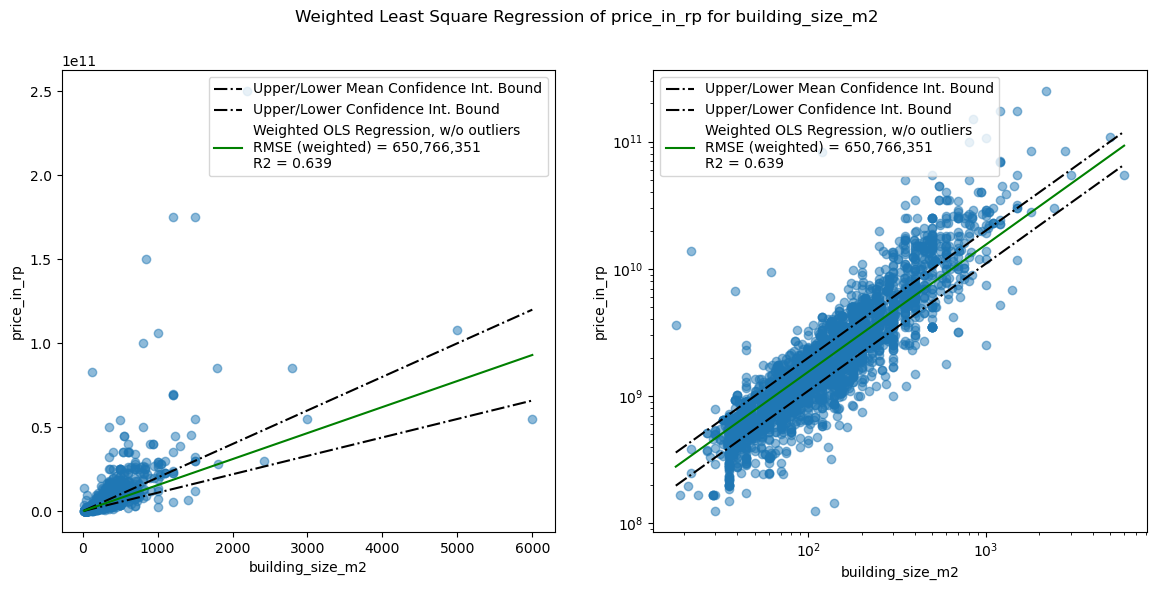

In [113]:
X = X_train['building_size_m2'].values
y = y_train['price_in_rp'].values
low_ci = (X * conf_low)
high_ci = (X * conf_high)
r2 = lm_2b.score(
    X[~high_influence_obs].reshape(-1, 1), 
    y[~high_influence_obs],
    X[~high_influence_obs].reshape(-1, 1))
# plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for ax_ in ax:
    ax_.scatter(X, y, alpha=0.5)
    ax_.plot(
        np.sort(X),
        high_ci[np.argsort(X)], color='black', ls='-.',
        label='Upper/Lower Mean Confidence Int. Bound'       
    )
    ax_.plot(
        np.sort(X),
        low_ci[np.argsort(X)], color='black', ls='-.',
        label='Upper/Lower Confidence Int. Bound'       
    )
    ax_.plot(
        np.sort(X[~high_influence_obs].flatten()), 
        y_predict_2b[np.argsort(X[~high_influence_obs].flatten())], color='green',
        label=\
            'Weighted OLS Regression, w/o outliers'
            f'\nRMSE (weighted) = {np.sqrt(mse_2b):,.0f}'
            f'\nR2 = {r2:.3f}'
    )  
    ax_.legend()
    ax_.set_xlabel('building_size_m2')
    ax_.set_ylabel('price_in_rp')
fig.suptitle('Weighted Least Square Regression of price_in_rp for building_size_m2')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

---
#### Maksud Grafik

Grafik ini menggambarkan hasil regresi kuadrat terkecil berbobot (Weighted Least Squares Regression) dari harga properti (price_in_rp) terhadap ukuran bangunan dalam meter persegi (building_size_m2). Grafik kiri menampilkan skala linier untuk kedua sumbu, sementara grafik kanan menggunakan skala logaritmik.

Elemen-elemen pada grafik dijelaskan sebagai berikut:

- **Garis Hijau**: Merupakan garis regresi berbobot (Weighted OLS Regression) yang dihasilkan dari data, dengan penghapusan outlier.
- **Garis Putus-Putus Hitam (Dash-dot)**: Batas atas dan bawah dari interval kepercayaan untuk rata-rata prediksi (Mean Confidence Interval).
- **Garis Putus-Putus Hitam (Dash)**: Batas atas dan bawah dari interval kepercayaan untuk prediksi (Prediction Confidence Interval).
- **Titik Biru**: Mewakili data individu yang menunjukkan hubungan antara ukuran bangunan dan harga.
- **RMSE (Root Mean Square Error)**: Nilai RMSE dari regresi berbobot, yang mengindikasikan seberapa baik model cocok dengan data.
- **R² (Koefisien determinasi)**: Menunjukkan proporsi variabilitas dalam data harga yang dapat dijelaskan oleh ukuran bangunan.

Secara keseluruhan, grafik ini memberikan informasi tentang hubungan antara harga properti dan ukuran bangunan, menampilkan interval kepercayaan untuk prediksi dan rata-rata prediksi, serta memberikan ukuran kesesuaian model melalui RMSE dan R². Penggunaan skala logaritmik pada grafik kanan membantu menyoroti pola data yang mungkin tidak terlihat pada skala linier di grafik kiri, terutama ketika terdapat rentang nilai yang luas.

---
### Interval Prediksi Regresi Sederhana

Interval prediksi dalam regresi linier adalah rentang nilai yang masuk akal untuk nilai Y di masa depan pada suatu nilai parameter x* tertentu. Rentang ini memperhitungkan variabilitas dari respons rata-rata Y yang disebabkan oleh variabilitas koefisien regresi dalam model, serta variabilitas yang disebabkan oleh istilah kesalahan yang tidak dapat dijelaskan oleh model regresi.

Kembali ke bagian sebelumnya, nilai R² model kita adalah 0,639, menunjukkan bahwa terdapat variabilitas yang tidak dapat dijelaskan oleh model regresi linier sederhana. Plot Y_obs vs Y_predicted juga menunjukkan variasi respons yang tidak dapat dijelaskan hanya dengan menggunakan building_size_m2.

Variabilitas dari istilah kesalahan juga terlihat pada plot residu, dimana residu cenderung berkumpul pada ukuran_m2 bangunan yang kecil namun menyebar secara luas pada ukuran_m2 bangunan yang besar.

Interval prediksi teoretis dalam OLS sangat bergantung pada asumsi normalitas dan varian konstan [Dev21], yang mungkin dilanggar oleh model regresi linier sederhana kami.

Mari kita telusuri interval prediksi yang dihitung dengan menggunakan Model Regresi Sederhana kami, yang dihitung secara sederhana dengan mengasumsikan normalitas dan varian konstan, dan mempertimbangkan apakah ini masih valid.h valid.

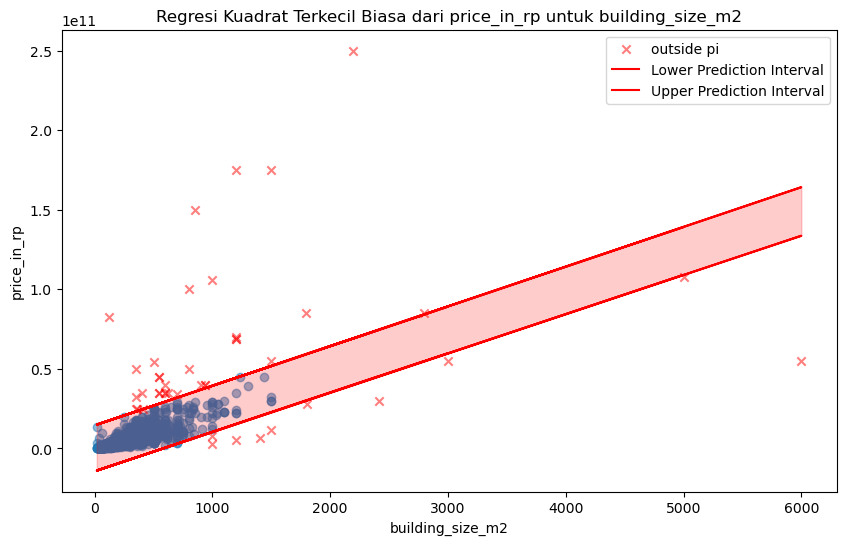

In [114]:
X = X_train['building_size_m2'].values
y = y_train['price_in_rp'].values
lm = OLS(y, X)
results = lm.fit()
y_predict = results.get_prediction(X).summary_frame(0.05)
pi_lower = y_predict.obs_ci_lower
pi_upper = y_predict.obs_ci_upper
outside_pi = np.logical_or(y > pi_upper, y < pi_lower)
# plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(
    x=X[~outside_pi], 
    y=y[~outside_pi], alpha=0.5
    )
ax.scatter(
    x=X[outside_pi], 
    y=y[outside_pi], alpha=0.5,
    color='red', marker='x',label='outside pi'
    )
ax.plot(X, pi_lower, color='r', label='Lower Prediction Interval')
ax.plot(X, pi_upper, color='r', label='Upper Prediction Interval')
ax.fill_between(
    x=np.sort(X), y1=pi_lower[np.argsort(X)], 
    y2=pi_upper[np.argsort(X)], alpha=0.2, color='r'
)
ax.set_xlabel('building_size_m2')
ax.set_ylabel('price_in_rp')
ax.set_title('Regresi Kuadrat Terkecil Biasa dari price_in_rp untuk building_size_m2')
ax.legend()
plt.show()

Variabilitas respon tidak tertangkap dengan baik pada interval prediksi di atas standar. Jika kita mempertimbangkan pengaturan model tertimbang, gambar di bawah menjelaskan interval prediksi yang memperhitungkan variabilitas sampel.

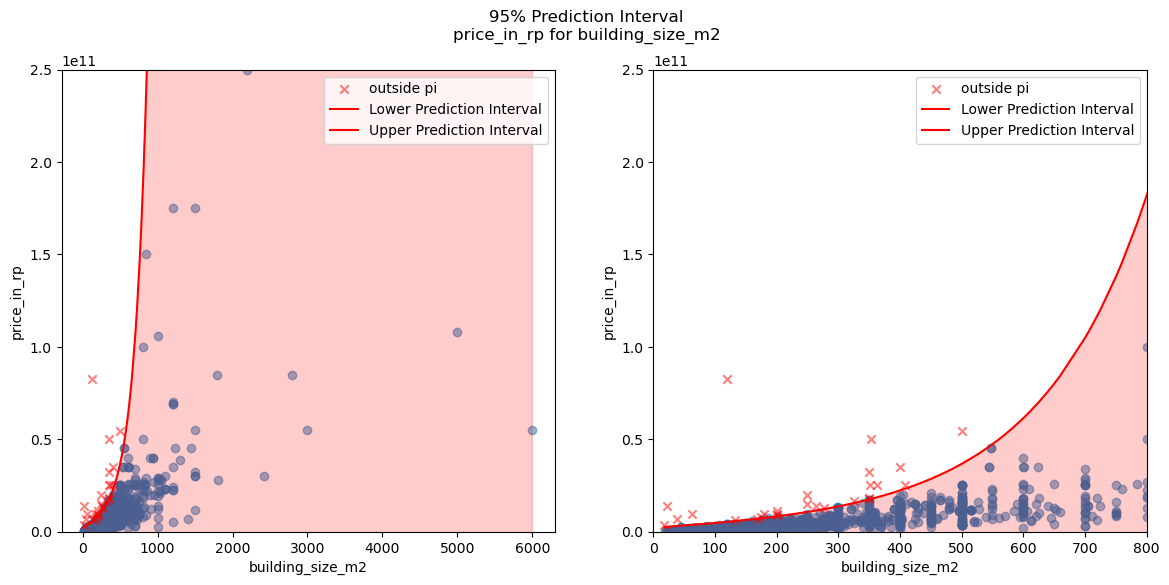

In [115]:
from scipy.stats import norm

X = X_train['building_size_m2'].values.reshape(-1, 1)
y = y_train['price_in_rp'].values
# prediction
lm = HetRobustRegression(fit_intercept=False)
results = lm.fit(X[~high_influence_obs], y[~high_influence_obs], X[~high_influence_obs])
y_predict = results.predict(X)
weight = results.get_sample_weight(X)
W = diags(weight)
p = X.shape[1] # no intercept
Xw = np.sqrt(W) @ X
yw = y * np.sqrt(weight)
I = np.identity(len(y))
H = Xw @ np.linalg.inv((Xw.T) @ Xw) @ (Xw.T)
resid = (I - H) @ yw
sigma2 = np.square(np.linalg.norm(resid)) / (len(y) - p)
sigma2i = sigma2 * np.power(weight, -1)
interval = norm().interval(0.95)
resid_lower = np.sqrt(sigma2i) * interval[0]
resid_upper = np.sqrt(sigma2i) * interval[1]
pi_lower = y_predict + resid_lower
pi_upper = y_predict + resid_upper
outside_pi = np.logical_or(y >= pi_upper, y <= pi_lower)
# plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for ax_ in ax:
    ax_.scatter(
        x=np.sort(X.flatten()[~outside_pi]), 
        y=y[~outside_pi][np.argsort(X.flatten()[~outside_pi])], alpha=0.5
        )
    ax_.scatter(
        x=np.sort(X.flatten()[outside_pi]), 
        y=y[outside_pi][np.argsort(X.flatten()[outside_pi])], alpha=0.5,
        color='red', marker='x', label='outside pi'
        )
    ax_.plot(np.sort(X.flatten()), pi_lower[np.argsort(X.flatten())], color='r', label='Lower Prediction Interval')
    ax_.plot(np.sort(X.flatten()), pi_upper[np.argsort(X.flatten())], color='r', label='Upper Prediction Interval')
    ax_.fill_between(
        x=np.sort(X.flatten()), 
        y1=pi_lower[np.argsort(X.flatten())],
        y2=pi_upper[np.argsort(X.flatten())], 
        alpha=0.2, color='r'
    )
    ax_.set_xlabel('building_size_m2')
    ax_.set_ylabel('price_in_rp')
    ax_.set_ylim(0, np.max(y))
    ax_.legend()
fig.suptitle('95% Prediction Interval\nprice_in_rp for building_size_m2')    
ax[1].set_xlim(0, 800)
plt.show()

Batas prediksi yang meningkat drastis setelah ukuran_m2 bangunan tertentu (sekitar 500), menunjukkan adanya ketidakpastian yang sangat besar ketika menggeneralisasi harga rumah dengan ukuran bangunan lebih besar dari 500m2. Oleh karena itu, model linier yang dikembangkan menggunakan dataset ini dapat diandalkan untuk ukuran bangunan<=500m2
.

---
### Kesimpulan: Simple Regresi Linear 

Regresi linear sederhana menggunakan variabel building_size_m2 terbukti signifikan secara statistik untuk menggeneralisasi harga rumah di Jabodetabek. Namun, model ini hanya mampu menjelaskan sekitar 60% dari variabilitas yang ada dalam dataset. Variabilitas dataset meningkat seiring dengan peningkatan ukuran bangunan.

Model linear ini representatif untuk memprediksi harga rata-rata rumah di Jabodetabek dengan ukuran bangunan dalam interval [18m2, 600m2]. Peningkatan ukuran bangunan sebesar 1m2 akan menaikkan harga rumah sebesar 15.490.373. Perlu diketahui bahwa, karena adanya variabilitas, model ini tampaknya memberikan hasil yang presisi hanya untuk ukuran bangunan tidak lebih dari 500m2.

---

## Multiple Linear Regression

- **Penggunaan Banyak Prediktor:** Dalam regresi linear berganda, lebih dari satu variabel independen (prediktor) digunakan untuk mencoba menangkap lebih banyak variabilitas dalam data.

- **Matriks Kovarians HC3:** Kami menggunakan matriks kovarians HC3 yang tahan terhadap heteroskedastisitas untuk memperkirakan standar error yang lebih andal. Ini membantu mengatasi masalah heteroskedastisitas, di mana variabilitas kesalahan tidak konstan.

- **Pemilihan Prediktor:** Dengan menggunakan standar error yang tahan terhadap heteroskedastisitas, kami dapat memilih prediktor yang secara signifikan berkontribusi secara statistik, yang meningkatkan kualitas model.

- **Bootstrap Liar:** Untuk meningkatkan kualitas inferensi, kami akan menggunakan metode bootstrap liar, yang dikenal lebih tahan terhadap heteroskedastisitas.

- **Pengecualian Jakarta Pusat:** Dalam analisis ini, kami tidak hanya menghapus variabel prediktor yang mewakili Jakarta Pusat, tetapi juga menghapus semua observasi yang berkaitan dengan Jakarta Pusat. Hal ini dilakukan untuk mencegah model menganggap Jakarta Pusat sebagai kondisi dasar, yang dapat menyebabkan bias dalam hasil analisis.

Dengan pendekatan ini, kami berharap dapat meningkatkan kemampuan model untuk menangkap variabilitas data dan memberikan inferensi yang lebih akurat.

In [116]:
train_set_transfd = pd.merge(
    X_train, y_train, left_index=True, right_index=True
    )
jakpus_index = train_set_transfd[train_set_transfd.city == ' Jakarta Pusat'].index
train_set_transfd = train_set_transfd.drop(jakpus_index)
numerical_features = \
    X_train.select_dtypes(exclude=['object', 'category']).drop(['lat', 'long'], axis=1).columns
categorical_features = X_train.select_dtypes(include=['object']).columns
f = 'price_in_rp ~ '\
    + ' + '.join(numerical_features) + ' - 1 + '
f += 'C(certificate, Treatment(reference=3)) + ' # `SHM` as reference
f += 'C(property_condition, Treatment(reference=3)) + ' # `butuh renovasi` as reference
f += 'C(furnishing, Treatment(reference=2)) + '  # `unfurnished` as reference
f += 'C(city, Treatment(reference=0))' # `Bekasi` as reference

lm = OLS.from_formula(f, data=train_set_transfd)
results = lm.fit(cov_type='HC3')

**Penjelasan tentang Kode yang Telah Dilakukan**

1. **Penanganan Variabel Kategori dengan One-Hot Encoding**:
   - Kita menggunakan metode one-hot encoding dengan (k - 1) kategori, di mana satu nilai dalam kategori dianggap sebagai referensi.
   - Misalnya, Bekasi digunakan sebagai referensi dasar untuk prediktor kota setelah di-encode.
   - Sebagai contoh, koefisien dari encoded Tangerang diinterpretasikan sebagai peningkatan respons rata-rata jika kota adalah Tangerang dibandingkan dengan Bekasi.

2. **Mengatur Tipe Kovarians ke HC3**:
   - Kovarians diatur ke tipe HC3, yang membuat regresi OLS mempertimbangkan matriks kovarians yang robust.
   - Hal ini dilakukan untuk memastikan bahwa kita menggunakan metode yang tepat dalam menentukan t-statistik untuk estimasi parameter kita.
   - Menurut Flachaire [Fla03], HC3 bekerja lebih baik pada sampel terbatas dan lebih unggul daripada metode lain dalam kasus-kasus umum.

Dengan menggunakan pendekatan ini, kita memastikan bahwa:

- Variabel kategori ditangani dengan benar, menghindari masalah multikolinearitas dan memberikan interpretasi yang jelas untuk koefisien regresi.
- Regresi OLS menggunakan matriks kovarians yang robust (HC3) untuk mengatasi heteroskedastisitas, sehingga estimasi parameter dan inferensi statistik menjadi lebih akurat dan dapat diandalkan, terutama pada sampel yang terbatas.

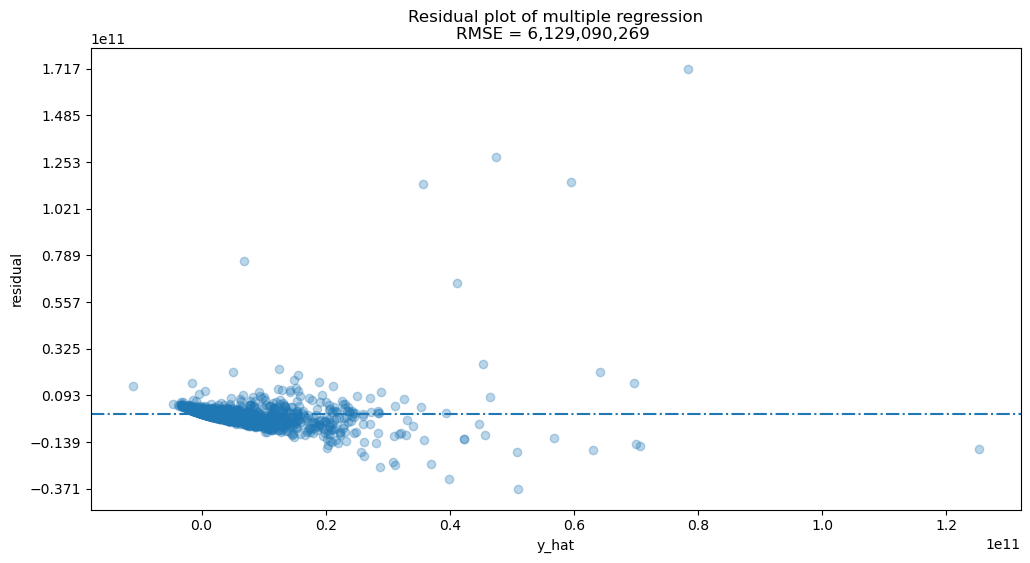

In [117]:
y = train_set_transfd['price_in_rp'].values.flatten()
y_hat = results.predict(train_set_transfd)
resid = train_set_transfd.price_in_rp - y_hat
mse = mean_squared_error(y, y_hat)
# matpltlib plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x=y_hat, y=resid, alpha=0.3)
ax.axhline(y=resid.mean(), linestyle='-.')
ax.set_title(f'Residual plot of multiple regression\nRMSE = {np.sqrt(mse):,.0f} ')
ax.set_yticks(np.linspace(resid.min(), resid.max(), 10))
ax.set_xlabel('y_hat')
ax.set_ylabel('residual')
plt.show()

In [118]:
results.summary().tables[0]

<class 'statsmodels.iolib.table.SimpleTable'>

dalam multiple regressi linier, adjusted R-squared lebih baik digunakan daripada regular R-squared karena adjusted R-squared memperhitungkan jumlah prediktor dalam model dan hanya meningkat jika prediktor baru benar-benar meningkatkan model, sementara regular R-squared cenderung meningkat dengan penambahan prediktor, bahkan jika mereka tidak signifikan secara statistik.


### Multicollinearity 
adalah fenomena di mana dua atau lebih variabel independen dalam model statistik memiliki hubungan kuat satu sama lain. Ini dapat menyebabkan masalah dalam analisis regresi karena dapat menyulitkan untuk menentukan efek individual dari setiap variabel independen terhadap variabel dependen. Dalam beberapa kasus, multicollinearity dapat menyebabkan koefisien regresi menjadi tidak stabil atau bahkan berlawanan dengan arah yang diharapkan. Untuk mengatasinya, seringkali dilakukan langkah-langkah seperti menghapus variabel yang berkorelasi tinggi atau menggunakan metode lain seperti regresi ridge atau regresi lasso.

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [120]:
high_vif_features = [
    'fac_basement', 'fac_gudang', 'bedrooms', 'bathrooms',
    'floors', 'fac_keamanan', 'fac_garden', 'lat', 'long'
]
numerical_features = \
    X_train.select_dtypes(exclude=['object', 'category']).drop(high_vif_features, axis=1).columns
f = 'price_in_rp ~ '\
    + ' + '.join(numerical_features) + ' - 1 + '
f += 'C(certificate, Treatment(reference=3)) + ' # `SHM` as reference
f += 'C(property_condition, Treatment(reference=3)) + ' # `butuh renovasi` as reference
f += 'C(furnishing, Treatment(reference=2)) + '  # `unfurnished` as reference
f += 'C(city, Treatment(reference=0))' # `Bekasi` as reference

lm = OLS.from_formula(f, data=train_set_transfd)
results = lm.fit(cov_type='HC3')

### Features Significancy

In [121]:
results.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

#### kesimpulan features

- Fitur sertifikat memiliki nilai p yang tinggi, yang berarti tidak ada bukti signifikan bahwa harga dalam rupiah akan terkait dengan jenis sertifikat yang berbeda. Ini juga teridentifikasi untuk parameter kondisi properti dan furnishing. Hal ini membuktikan poin kami dalam bab sebelumnya.

- Fitur maid_bedrooms memiliki nilai p yang rendah tetapi memberikan nilai koefisien yang tinggi karena dipompa oleh observasi dengan harga_in_rp yang tinggi (rumah yang lebih besar cenderung menyediakan kamar pembantu). Meskipun kondisi ini terbukti oleh data kami, namun kurang penting untuk menjadi parameter utama kami untuk generalisasi karena cenderung bias hanya untuk rumah besar sehingga saya hanya akan menjatuhkan fitur ini.

- Kami mengharapkan nilai positif untuk parameter fasilitas. Namun beberapa dari mereka memiliki nilai negatif, yang berarti bahwa mereka hanya menyesuaikan untuk parameter lain karena kurangnya cakupan di seluruh rentang harga secara keseluruhan. Ini akan mengurangi generalisasi kami sehingga saya akan menjatuhkan parameter-parameter tersebut. Untuk nilai koefisien positif dari fasilitas lainnya: [fac_kolam_renang, fac_akses_parkir, fac_canopy], kita akan mempertahankannya dan lihat bagaimana mereka akan disesuaikan setelah koefisien utama lainnya.

- Jakarta Utara memiliki nilai koefisien yang signifikan tinggi, tetapi nilai p-nya juga tinggi. Ingat dari bab sebelumnya, Jakarta Utara merupakan salah satu median tertinggi dari seluruh DKI Jakarta dan memiliki interval kepercayaan yang sempit (berbeda dengan Jakarta Pusat yang memiliki penyebaran yang besar!). Kami akan pertahankan fitur ini terlebih dahulu dan lihat bagaimana fitur ini berubah jika kami menyesuaikan fitur lainnya.

- Untuk fitur lain yang memiliki nilai p yang tinggi akan dijatuhkan.

In [122]:
from patsy import dmatrices

high_pvalue_features = [
    'fac_tempat_jemuran', 'fac_jogging_track', 'fac_jalur_telepon', 'fac_jogging_track', 'fac_masjid', 
    'fac_cctv', 'fac_kitchen_set', 'fac_playground', 'fac_wastafel', 'fac_ac', 'fac_lapangan_bola', 
    'fac_mesin_cuci', 'fac_lapangan_bulu_tangkis', 'fac_kulkas', 'fac_water_heater', 'fac_smart_home', 
    'fac_backyard_luas', 'fac_garasi', 'fac_balkon', 'fac_clubhouse', 'fac_service_area', 'fac_plumbing_system',
    'maid_bathrooms', 'maid_bedrooms', 'electricity_num'
]
noise_features = [
    'fac_one_gate_system', 'fac_tempat_gym', 'fac_kolam_ikan', 'fac_lapangan_voli', 'carports', 'garages',
    'fac_lapangan_basket', 'fac_lapangan_tenis', 'fac_akses_parkir', 'fac_canopy'
]
numerical_features = \
    X_train.select_dtypes(exclude=['object', 'category'])\
        .drop(high_vif_features, axis=1)\
        .drop(high_pvalue_features, axis=1)\
        .drop(noise_features, axis=1).columns
f = 'price_in_rp ~ ' + ' + '.join(numerical_features) + ' - 1 + '
f += 'C(city)'
y, X = dmatrices(f, train_set_transfd, return_type='dataframe')
X = X.drop(X.columns[[0]], axis=1) # `Bekasi` as reference
y = y.values.flatten()
lm = OLS(y, X)
results = lm.fit(cov_type='HC3')
results.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

---
Banyaknya koefisien kota yang negatif menunjukkan bahwa Bekasi mungkin bukan kota dengan harga rata-rata terendah. Hal ini kemungkinan disebabkan oleh kesamaan nilai rata-rata harga rumah antar lokasi tersebut.

In [123]:
# harga rata2 masing2 daerah di jabodetabek- berdasarkan trainsettrainset

train_set_transfd.groupby('city').aggregate({'price_in_rp':'mean'})

price_in_rp
city                              
 Bekasi           1,291,126,732.67
 Bogor            2,511,373,844.12
 Depok            1,263,725,108.23
 Jakarta Barat    4,794,971,098.27
 Jakarta Selatan 15,567,246,445.50
 Jakarta Timur    2,023,294,871.79
 Jakarta Utara   13,660,223,214.29
 Tangerang        3,673,188,679.25

#### kesimpulan tabel

- Rata-rata harga antara kota-kota hampir sama kecuali untuk Jakarta Selatan dan Jakarta Utara:
- Jakarta Barat dan Tangerang memiliki harga sedikit lebih tinggi daripada Bekasi, Bogor, Depok. Itulah mengapa interval mereka mencakup nilai positif dari koefisien. Namun, interval mereka juga mencakup 0 sehingga kami akan menghapus mereka.
- Rumah yang terletak di Jakarta Selatan dan Jakarta Utara, berdasarkan informasi di atas, diyakini memiliki harga yang signifikan lebih tinggi dibandingkan yang lain, sehingga kami akan mempertahankan fitur ini.





In [124]:
high_pvalue_features = [
    'fac_tempat_jemuran', 'fac_jogging_track', 'fac_jalur_telepon', 'fac_jogging_track', 'fac_masjid', 
    'fac_cctv', 'fac_kitchen_set', 'fac_playground', 'fac_wastafel', 'fac_ac', 'fac_lapangan_bola', 
    'fac_mesin_cuci', 'fac_lapangan_bulu_tangkis', 'fac_kulkas', 'fac_water_heater', 'fac_smart_home', 
    'fac_backyard_luas', 'fac_garasi', 'fac_balkon', 'fac_clubhouse', 'fac_service_area', 'fac_plumbing_system',
    'maid_bathrooms', 'maid_bedrooms', 'electricity_num'
]
noise_features = [
    'fac_one_gate_system', 'fac_tempat_gym', 'fac_kolam_ikan', 'fac_lapangan_voli', 'carports', 'garages',
    'fac_lapangan_basket', 'fac_lapangan_tenis', 'fac_akses_parkir', 'fac_canopy'
]
numerical_features = \
    X_train.select_dtypes(exclude=['object', 'category'])\
        .drop(high_vif_features, axis=1)\
        .drop(high_pvalue_features, axis=1)\
        .drop(noise_features, axis=1).columns
f = 'price_in_rp ~ ' + ' + '.join(numerical_features) + ' - 1 + '
f += 'C(city)'
y, X = dmatrices(f, train_set_transfd, return_type='dataframe')
X = X.drop(X.columns[[0, 1, 2, 3, 5, 7]], axis=1)
y = y.values.flatten()
lm = OLS(y, X)
results = lm.fit(cov_type='HC3')
results.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [125]:
high_pvalue_features = [
    'fac_tempat_jemuran', 'fac_jogging_track', 'fac_jalur_telepon', 'fac_jogging_track', 'fac_masjid', 
    'fac_cctv', 'fac_kitchen_set', 'fac_playground', 'fac_wastafel', 'fac_ac', 'fac_lapangan_bola', 
    'fac_mesin_cuci', 'fac_lapangan_bulu_tangkis', 'fac_kulkas', 'fac_water_heater', 'fac_smart_home', 
    'fac_backyard_luas', 'fac_garasi', 'fac_balkon', 'fac_clubhouse', 'fac_service_area', 'fac_plumbing_system',
    'maid_bathrooms', 'maid_bedrooms', 'electricity_num', 'fac_kolam_renang'
]
noise_features = [
    'fac_one_gate_system', 'fac_tempat_gym', 'fac_kolam_ikan', 'fac_lapangan_voli', 'carports', 'garages',
    'fac_lapangan_basket', 'fac_lapangan_tenis', 'fac_akses_parkir', 'fac_canopy'
]
numerical_features = \
    X_train.select_dtypes(exclude=['object', 'category'])\
        .drop(high_vif_features, axis=1)\
        .drop(high_pvalue_features, axis=1)\
        .drop(noise_features, axis=1).columns
f = 'price_in_rp ~ ' + ' + '.join(numerical_features) + ' - 1 + '
f += 'C(city)'
y, X = dmatrices(f, train_set_transfd, return_type='dataframe')
X = X.drop(X.columns[[0, 1, 2, 3, 5, 7]], axis=1)
features = X.columns
y = y.values.flatten()
lm = OLS(y, X)
results = lm.fit(cov_type='HC3')
results.summary().tables[0]

<class 'statsmodels.iolib.table.SimpleTable'>

## Optimizing Multiple Regression

Text(0, 0.5, 'residual')

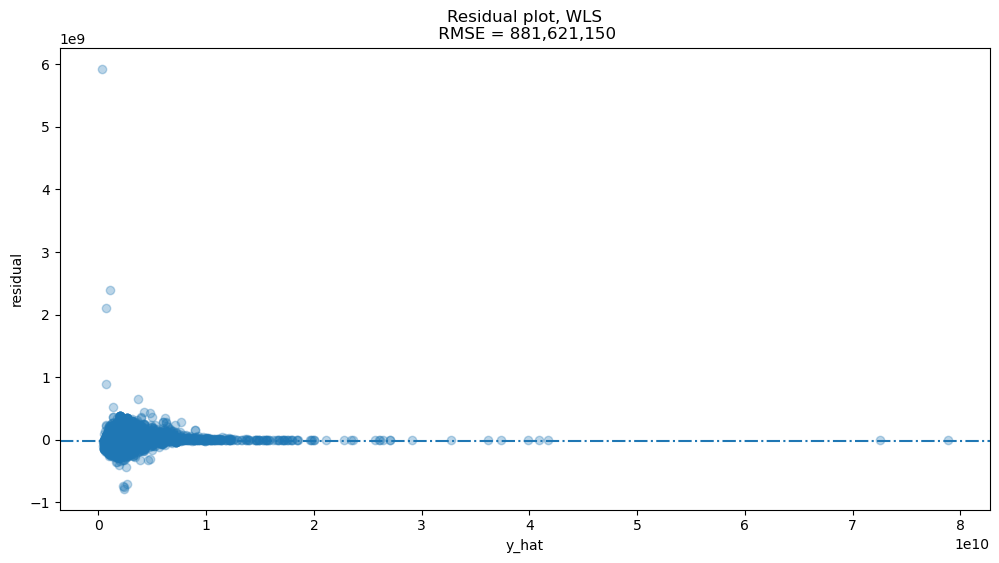

In [126]:
X = X.values
Z = X[:, [2, 3]]# Variables responsible for heteroscedacity
# Robust Regression
reg = HetRobustRegression(fit_intercept=False)
results = reg.fit(X, y, Z)
y_hat = results.predict(X)
weight = results.weight_
weighted_resid = weight * (y - y_hat)
mse = mean_squared_error(y, y_hat, sample_weight=weight)
# matpltlib plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x=y_hat, y=weighted_resid, alpha=0.3)
ax.axhline(y=weighted_resid.mean(), linestyle='-.')
ax.set_title(f'Residual plot, WLS\n RMSE = {np.sqrt(mse):,.0f}')
ax.set_xlabel('y_hat')
ax.set_ylabel('residual')

dari grafik tersehut dapat dilihat bahwa masih banyak data yang outlier

Text(0.5, 0, 'Obs. Number')

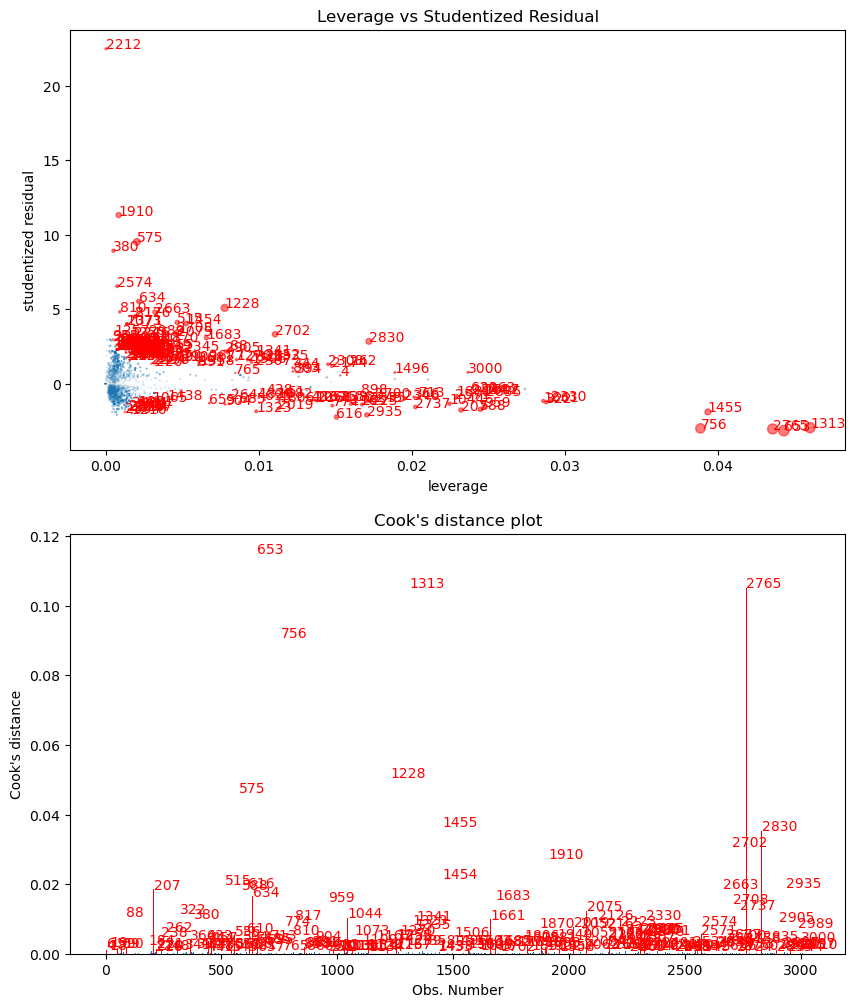

In [127]:
# Cook Distance
W = diags(weight)
p = X.shape[1] # no intercept
Xw = np.sqrt(W) @ X
yw = y * np.sqrt(weight)
I = np.identity(len(y))
H = Xw @ np.linalg.inv((Xw.T) @ Xw) @ (Xw.T)
resid = (I - H) @ yw
se2 = np.square(np.linalg.norm(resid)) / (len(y) - p) # se2 = SSE / (n - p), p = 1 since no intercept
# leverage is (weighted) hat matrix diagonal
h = np.diag(H)
student_resid = resid / np.sqrt(se2 * (1 - h))
cooks_dist = (np.square(resid) / (p * se2)) * (h / np.square(1 - h))
high_influence_obs = (cooks_dist >= (3 / (X.shape[0] - p)))
high_influence_obs_index = np.where(high_influence_obs)[0]
# High Influence Plot
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
ax[0].scatter(
    x=h[~high_influence_obs], y=student_resid[~high_influence_obs], 
    s= cooks_dist[~high_influence_obs] * 500, alpha=0.5)
ax[0].scatter(
    x=h[high_influence_obs], y=student_resid[high_influence_obs], 
    alpha=0.5, color='r', s=cooks_dist[high_influence_obs] * 500,
    label='high influence')
for lev, stud_resid, index in np.c_[
    h[high_influence_obs], student_resid[high_influence_obs], high_influence_obs_index]:
    ax[0].text(x=lev, y=stud_resid, s=str(int(index)), color='r')
ax[0].set_ylabel('studentized residual')
ax[0].set_xlabel('leverage')
ax[0].set_title('Leverage vs Studentized Residual')
# Cook's distance Plot
obs_index = np.where(y)[0]
ax[1].bar(
    x=obs_index[~high_influence_obs], height=cooks_dist[~high_influence_obs])
ax[1].bar(
    x=obs_index[high_influence_obs], height=cooks_dist[high_influence_obs], 
    color='r', label='Outliers')
for x_, y_ in np.c_[obs_index[high_influence_obs], cooks_dist[high_influence_obs]]:
    ax[1].text(x=x_, y=y_, s=str(int(x_)), color='r')
ax[1].set_title('Cook\'s distance plot')
ax[1].set_ylabel('Cook\'s distance')
ax[1].set_xlabel('Obs. Number')

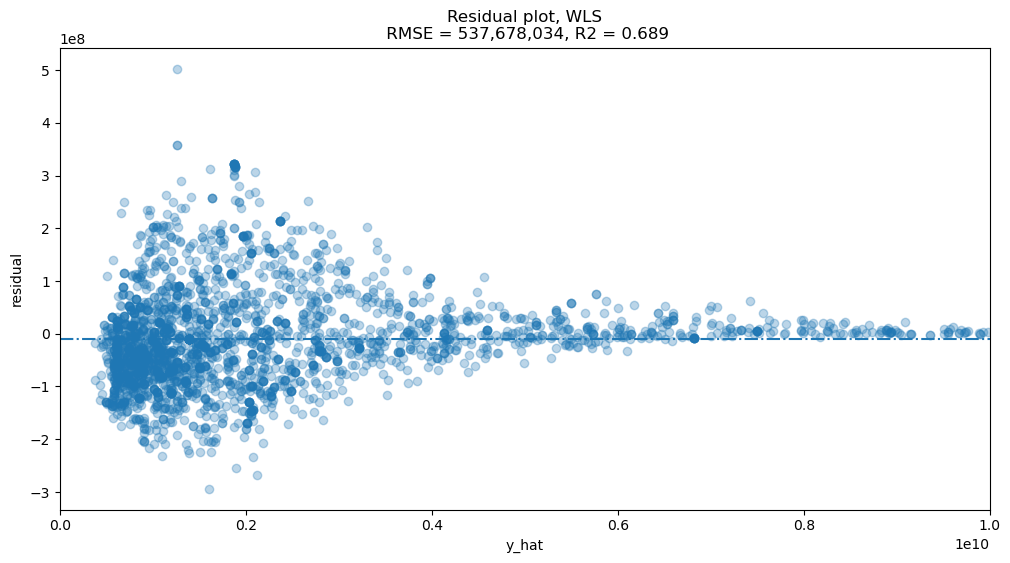

In [128]:
X = X[~high_influence_obs, :]
y = y[~high_influence_obs]
Z = X[:, [2, 3]] # Variables responsible for heteroscedacity
# Robust Regression
reg = HetRobustRegression(fit_intercept=False)
results = reg.fit(X, y, Z)
r2 = results.score(X, y, Z)
y_hat = results.predict(X)
weight = results.weight_
weighted_resid = weight * (y - y_hat)
mse = mean_squared_error(y, y_hat, sample_weight=weight)
# matpltlib plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x=y_hat, y=weighted_resid, alpha=0.3)
ax.axhline(y=weighted_resid.mean(), linestyle='-.')
ax.set_title(f'Residual plot, WLS\n RMSE = {np.sqrt(mse):,.0f}, R2 = {r2:.3f}')
ax.set_xlabel('y_hat')
ax.set_ylabel('residual')
ax.set_xlim(0, 1e10)
plt.show()

Plot residual di atas menunjukkan bahwa dataset kita memiliki variabilitas yang dapat ditoleransi untuk harga rumah tidak lebih dari Rp. 5.000.000.000. Ini menyarankan bahwa prediksi adalah dapat dipercaya jika harga rumah yang diprediksi tidak melebihi Rp. 5.000.000.000. Hal ini memberikan batas atas yang berguna untuk memastikan bahwa prediksi kita tetap dalam kisaran yang dapat diterima secara praktis dan konsisten dengan data yang ada.

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



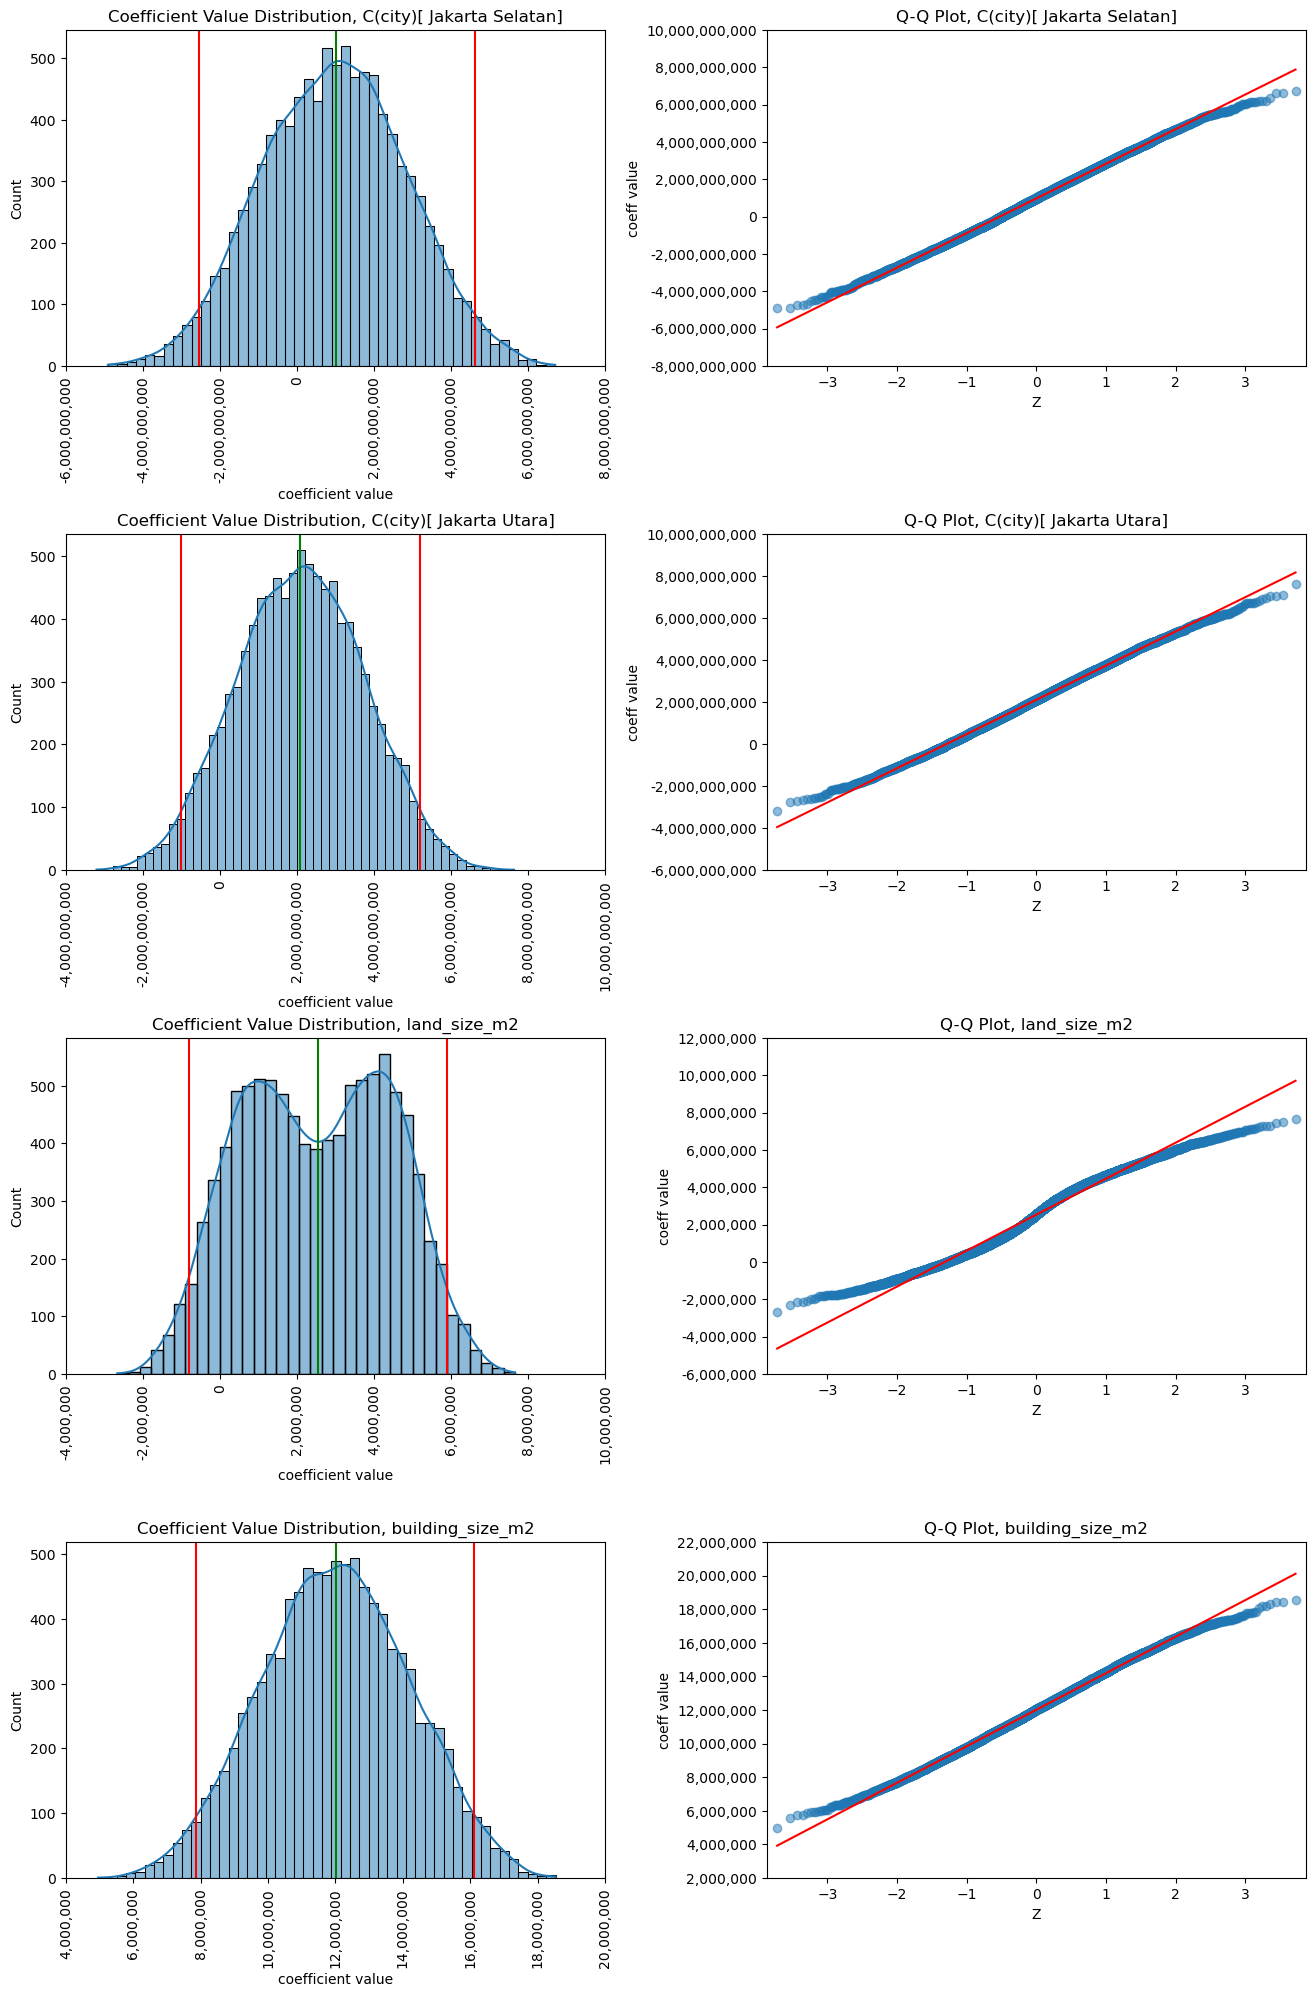

In [129]:
# verify the confidence interval of regression coefficient.

from sklearn.linear_model import LinearRegression
from joblib import dump, load

def coefficient(x, y_null, boot_resid):
    epsilon = np.random.choice([1, -1], len(y_null), p=[0.5, 0.5]) # Flachair's pick distribution
    boot_resid_ = boot_resid.flatten()
    resid_dgp = boot_resid_ * epsilon
    y_dgp = (y_null + resid_dgp).flatten()
    lm_boots = LinearRegression(fit_intercept=False)
    result_boots = lm_boots.fit(x, y_dgp)
    coef_boots = result_boots.coef_
    return coef_boots

# prediction
lm = HetRobustRegression(fit_intercept=False)
results = lm.fit(X, y, Z)
dump(results, 'modules\\fitted_regressor.joblib') # store fitted regressor
y_predict = results.predict(X) # y_predict here serves beta as the null hypotheses for bootstrap
coef = results.coef_
# calculate hat matrix
h = np.diag(X @ np.linalg.inv((X.T) @ X) @ (X.T)) #  = h_t in Flachair (2003)
# calculate adjusted residual
residual = y - y_predict # = OLS restricted residuals in Flachair (2003)
a = 1/ (1 - h) # using HC3 as proposed by Flachair (2003)
resid = a * residual
adj_resid = resid - np.mean(resid)
# bootstrap ci
arr = np.empty(len(y))
sample = (arr, )
confidence_level = 0.95
lower_tail = (1 - confidence_level) / 2
upper_tail = 1 - lower_tail 
bootstrap_res = bootstrap(
    sample, lambda arr: coefficient(X, y_predict, adj_resid), vectorized=False, 
    confidence_level=confidence_level, method='percentile', n_resamples=9999
)
# Features
coef = coef.reshape(-1, 1)
features_name = features.values.reshape(-1, 1)
p = len(features_name)
# bootstrapping distribution
n_iter = 9999
arr = np.empty((n_iter, 1))
bootstrap_coeff_value = \
    np.apply_along_axis(lambda x: coefficient(X, y_predict, adj_resid), 1, arr)
# plotting bootstrap result
conf_low = bootstrap_res.confidence_interval[0].reshape(-1, 1)
conf_high = bootstrap_res.confidence_interval[1].reshape(-1, 1)
coef_array = np.c_[features_name, coef, conf_low, conf_high]
fig, ax = plt.subplots(p, 2, figsize=(16, 6 * p))

for index, (feature, coef_, ci_l_, ci_h_) in enumerate(coef_array):
    sns.histplot(
        x=bootstrap_coeff_value[:, index], kde=True, ax=ax[index, 0]
        )
    ax[index, 0].axvline(coef_, color='green')
    ax[index, 0].axvline(ci_l_, color='r')
    ax[index, 0].axvline(ci_h_, color='r')
    xticks = ax[index, 0].get_xticks()
    ax[index, 0].set_title(f'Coefficient Value Distribution, {feature}')
    ax[index, 0].set_xticks(xticks)
    ax[index, 0].set_xticklabels(['{:,.0f}'.format(x) for x in xticks], rotation=90)
    ax[index, 0].set_xlabel('coefficient value')
    # Q-Q Plot
    pplot = ProbPlot(bootstrap_coeff_value[:, index].flatten())
    pplot.qqplot(ax=ax[index, 1], alpha=0.5, line='s')
    yticks = ax[index, 1].get_yticks()
    ax[index, 1].set_yticks(yticks)
    ax[index, 1].set_yticklabels(['{:,.0f}'.format(y) for y in yticks])
    ax[index, 1].set_title(f'Q-Q Plot, {feature}')
    ax[index, 1].set_xlabel('Z')
    ax[index, 1].set_ylabel('coeff value')
plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [130]:
pd.DataFrame(
    coef_array,
    columns=['features_name', 'coef', 'conf_low', 'conf_high']
    ).set_index('features_name')

coef          conf_low        conf_high
features_name                                                                
C(city)[ Jakarta Selatan] 1,019,125,860.57 -2,539,711,900.12 4,614,000,125.42
C(city)[ Jakarta Utara]   2,091,510,620.53 -1,011,936,794.79 5,190,877,328.89
land_size_m2                  2,541,730.38       -812,551.56     5,906,889.21
building_size_m2             12,005,662.20      7,848,476.81    16,104,449.63

## Kinerja Prediktif Model Linear

Dalam bagian ini, kami akan mengevaluasi kinerja model linear kami dalam memprediksi harga rumah untuk data yang tidak diketahui. Kami akan menggunakan set pengujian yang telah dikecualikan dari setiap analisis pembuatan model linear kami. Hal ini dilakukan untuk memastikan tidak ada informasi yang bocor ke dalam model.

Kami akan membandingkan semua model yang telah dikembangkan:
1) Regresi Linier Sederhana OLS,
2) Regresi Linier Sederhana WLS,
3) Regresi Linier Berganda OLS,
4) Regresi Linier Berganda WLS

Kami juga akan membuat fungsi transformer untuk mendeteksi dan menghapus outlier sehingga setiap model memiliki penanganan outlier yang konsisten.

Perlu dicatat bahwa data kami memiliki variasi harga rumah yang dapat ditoleransi hingga Rp. 5.000.000.000, oleh karena itu, kami akan menganggap ini sebagai nilai maksimum yang akan diprediksi.ksi.

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



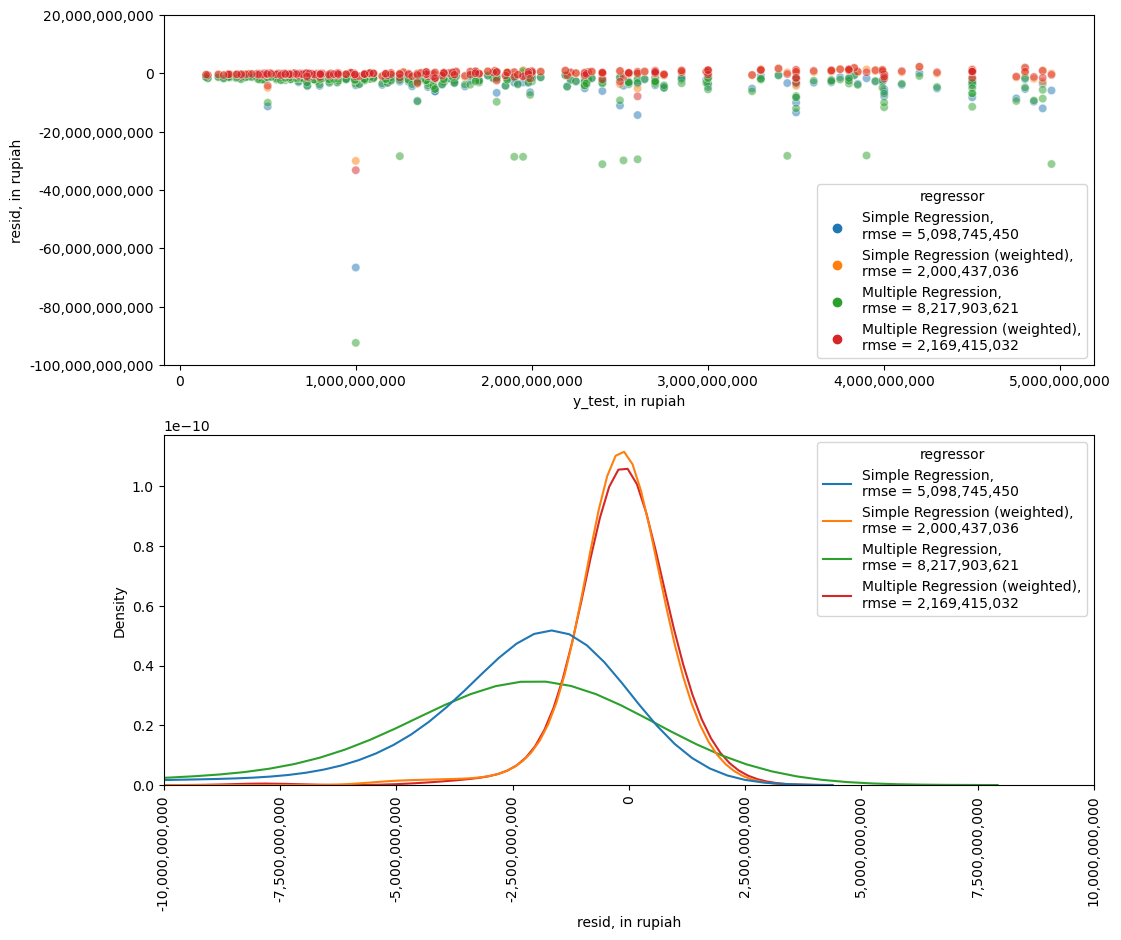

In [131]:
from patsy import dmatrix
import seaborn as sns

def transform_set(X):
    high_pvalue_features = [
        'fac_tempat_jemuran', 'fac_jogging_track', 'fac_jalur_telepon', 'fac_jogging_track', 'fac_masjid', 
        'fac_cctv', 'fac_kitchen_set', 'fac_playground', 'fac_wastafel', 'fac_ac', 'fac_lapangan_bola', 
        'fac_mesin_cuci', 'fac_lapangan_bulu_tangkis', 'fac_kulkas', 'fac_water_heater', 'fac_smart_home', 
        'fac_backyard_luas', 'fac_garasi', 'fac_balkon', 'fac_clubhouse', 'fac_service_area', 'fac_plumbing_system',
        'maid_bathrooms', 'maid_bedrooms', 'electricity_num', 'fac_kolam_renang'
    ]
    noise_features = [
        'fac_one_gate_system', 'fac_tempat_gym', 'fac_kolam_ikan', 'fac_lapangan_voli', 'carports', 'garages',
        'fac_lapangan_basket', 'fac_lapangan_tenis', 'fac_akses_parkir', 'fac_canopy'
    ]
    numerical_features = \
        X_train.select_dtypes(exclude=['object', 'category'])\
            .drop(high_vif_features, axis=1)\
            .drop(high_pvalue_features, axis=1)\
            .drop(noise_features, axis=1).columns
    f = ' + '.join(numerical_features) + ' - 1 + '
    f += 'C(city)'
    X_transfd = dmatrix(f, X, return_type='dataframe')
    X_transfd = X_transfd.drop(X_transfd.columns[[0, 1, 2, 3, 4, 6, 8]], axis=1)
    return X_transfd

def remove_outliers(X, y):
    """ For OLS only"""
    I = np.identity(len(y))
    H = X @ np.linalg.inv((X.T) @ X) @ (X.T)
    p = X.shape[1]
    resid = (I - H) @ y
    se2 = np.square(np.linalg.norm(resid)) / (len(y) - p)
    # leverage is (weighted) hat matrix diagonal
    h = np.diag(H)
    cooks_dist = (np.square(resid) / (p * se2)) * (h / np.square(1 - h))
    high_influence_obs = (cooks_dist >= (3 / (X.shape[0] - p)))
    high_influence_obs_index = np.where(high_influence_obs)[0]
    return X[high_influence_obs_index, :], y[high_influence_obs_index ]

y_test = pd.read_csv('y_test.csv').values
y_mask = (y_test < 5e9) # Setting constraint of our prediction to be < Rp. 5,000,000,000
X_test = pd.read_csv('X_test.csv')[y_mask]
y_test = y_test[y_mask].flatten()
X_test = transform_set(X_test).values
Z_test = X_test[:, [2, 3]]
n_samples = len(y_test)

# prepared model
X_fit_simple = pd.read_csv('X_train.csv')['building_size_m2'].values.reshape(-1, 1)
y_fit_simple = pd.read_csv('y_train.csv').values
X_fit_multiple = transform_set(pd.read_csv('X_train.csv')).values
y_fit_multiple = pd.read_csv('y_train.csv').values
X_fit_simple, y_fit_simple = remove_outliers(X_fit_simple, y_fit_simple)
X_fit_multiple, y_fit_multiple = remove_outliers(X_fit_multiple, y_fit_multiple)
regressor_1 = OLS(y_fit_simple, X_fit_simple).fit() # single regressor using `building_size_m2`
regressor_2 = lm_2b # single regressor (weighted) using `building_size_m2`
regressor_3 = OLS(y_fit_multiple, X_fit_multiple).fit() # multiple regressor, [y, X] from train set
regressor_4 = results # weighted multiple regressor
# predict
y_test_pred_1 = regressor_1.predict(X_test[:, 3]).reshape(-1, 1)
y_test_pred_2 = regressor_2.predict(X_test[:, 3].reshape(-1, 1)).reshape(-1, 1)
y_test_pred_3 = regressor_3.predict(X_test).reshape(-1, 1)
y_test_pred_4 = regressor_4.predict(X_test).reshape(-1, 1)
# residual
resid_test_1 = (y_test.reshape(-1, 1) - y_test_pred_1)
resid_test_2 = (y_test.reshape(-1, 1) - y_test_pred_2)
resid_test_3 = (y_test.reshape(-1, 1) - y_test_pred_3)
resid_test_4 = (y_test.reshape(-1, 1) - y_test_pred_4)
# mse
rmse_test_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_1.flatten()))
rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_2.flatten()))
rmse_test_3 = np.sqrt(mean_squared_error(y_test, y_test_pred_3.flatten()))
rmse_test_4 = np.sqrt(mean_squared_error(y_test, y_test_pred_4.flatten()))
# create df
resid_test_1 = \
    np.c_[
    y_test.reshape(-1, 1),
    y_test_pred_1, 
    resid_test_1, 
    np.repeat([f'Simple Regression,\nrmse = {rmse_test_1:,.0f}'], 
    n_samples).reshape(-1, 1)]
resid_test_2 = \
    np.c_[
    y_test.reshape(-1, 1),
    y_test_pred_2, 
    resid_test_2, 
    np.repeat([f'Simple Regression (weighted),\nrmse = {rmse_test_2:,.0f}'], 
    n_samples).reshape(-1, 1)]
resid_test_3 = \
    np.c_[
    y_test.reshape(-1, 1),
    y_test_pred_3, 
    resid_test_3, 
    np.repeat([f'Multiple Regression,\nrmse = {rmse_test_3:,.0f}'], 
    n_samples).reshape(-1, 1)]
resid_test_4 = \
    np.c_[
    y_test.reshape(-1, 1),    
    y_test_pred_4, 
    resid_test_4, 
    np.repeat([f'Multiple Regression (weighted),\nrmse = {rmse_test_4:,.0f}'], 
    n_samples).reshape(-1, 1)]

resid_df = pd.DataFrame(
    np.r_[resid_test_1, resid_test_2, resid_test_3, resid_test_4],
    columns=['y_test', 'y_pred', 'resid', 'regressor']
    )
resid_df = resid_df.assign(
    y_test = pd.to_numeric(resid_df.y_test),
    y_pred=pd.to_numeric(resid_df.y_pred),
    resid=pd.to_numeric(resid_df.resid)
    )
# plot
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
sns.scatterplot(
    data=resid_df, x='y_test', y='resid', ax=ax[0], hue='regressor', alpha=0.5
    )
sns.kdeplot(
    data=resid_df, x='resid',
    hue='regressor', ax=ax[1]
    )
xticks_1 = ax[0].get_xticks()[1:-1]
ax[0].set_xticks(xticks_1)
ax[0].set_xticklabels(['{:,.0f}'.format(x) for x in xticks_1])
yticks = ax[0].get_yticks()
ax[0].set_yticks(yticks)
ax[0].set_yticklabels(['{:,.0f}'.format(y) for y in yticks])
ax[0].set_xlabel('y_test, in rupiah')
ax[0].set_ylabel('resid, in rupiah')
ax[1].set_xlabel('resid, in rupiah')
ax[1].set_xlim(-1e10, 1e10)
xticks_2 = ax[1].get_xticks()
ax[1].set_xticks(xticks_2)
ax[1].set_xticklabels(['{:,.0f}'.format(x) for x in xticks_2], rotation=90)
plt.show()

---
Dari gambar di atas, jelas bahwa OLS memiliki bias (bahkan setelah menghapus observasi yang memiliki pengaruh tinggi!). Distribusi WLS agak lebih normal daripada OLS. Perlu dicatat bahwa kami memplot residual mentah (non-weighted) di sini. Kami juga dapat melihat beberapa observasi yang diprediksi buruk oleh OLS tetapi WLS memberikan hasil yang baik.

Model Simple WLS sedikit lebih unggul daripada regresi majemuk di sini. Hasilnya serupa, yang mungkin menunjukkan interval kepercayaan koefisien regresi majemuk yang mencakup nilai 0. Namun, untuk bagian selanjutnya, kami lebih memilih model dengan lebih banyak variabel prediktor.

RMSE juga menggunakan residual mentah. Namun, nilai tersebut cukup tinggi tetapi ini mungkin disebabkan oleh keberadaan observasi yang tidak biasa di sini yang disetujui oleh semua model.

In [132]:
#  statistik ringkasan untuk residual
resid_test_1 = (y_test.reshape(-1, 1) - y_test_pred_1)
resid_test_2 = (y_test.reshape(-1, 1) - y_test_pred_2)
resid_test_3 = (y_test.reshape(-1, 1) - y_test_pred_3)
resid_test_4 = (y_test.reshape(-1, 1) - y_test_pred_4)
resid_df = pd.DataFrame(
    np.c_[resid_test_1, resid_test_2, resid_test_3, resid_test_4],
    columns=[
        'Simple Regression', 'Simple Regression (weighted)', 
        'Multiple Regression', 'Multiple Regression (weighted)'
        ],
    dtype='float'
)
resid_df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).T.rename(columns={'50%': 'median'}).T

Simple Regression  Simple Regression (weighted)  Multiple Regression  \
count              284.00                        284.00               284.00   
mean    -2,636,008,995.02               -310,386,221.08    -3,724,053,535.27   
std      4,372,181,548.81              1,979,699,159.02     7,338,596,286.50   
min    -66,540,868,206.60            -29,980,747,102.80   -92,371,368,846.86   
10%     -4,626,578,998.99             -1,084,199,854.11    -5,564,749,963.78   
25%     -3,043,332,518.69               -471,357,578.39    -3,188,001,451.33   
median  -1,756,142,549.94               -175,744,611.45    -1,979,248,081.77   
75%     -1,151,489,929.69                203,762,752.22    -1,416,757,645.19   
90%       -778,697,888.18                691,710,546.97    -1,047,140,400.36   
max        147,547,907.60              2,341,155,173.83       818,892,903.29   

        Multiple Regression (weighted)  
count                           284.00  
mean                   -268,599,296.45  
std                   2,156,522,970.10  
min                 -33,178,245,911.41  
10%                    -961,738,259.02  
25%                    -398,732,472.37  
median                 -174,567,156.44  
75%                     219,288,996.36  
90%                     708,342,579.92  
max                   2,266,224,842.65

Meskipun RMSE cukup besar, perhatikan jarak antara median dan kuantilnya. Kuantil dari regresi majemuk terbobot hanya berbeda dari median-nya paling banyak sebesar 150 juta. Ternyata model ini berperforma baik untuk data yang tidak diketahui. Ini menunjukkan bahwa meskipun RMSE besar, model masih mampu memprediksi dengan cukup baik dan konsisten, dengan sebagian besar prediksi berada dalam kisaran yang wajar dari nilai sebenarnya.

Dengan demikian, berdasarkan analisis ini, model regresi majemuk terbobot kemungkinan merupakan model yang paling baik karena kinerjanya yang stabil dan konsisten dalam memprediksi harga rumah untuk data yang tidak diketahui.

### Penerapan Model Parametrik: Memaksimalkan Keuntungan Penjualan Rumah

#### Contoh Kasus

Mari kita pertimbangkan sebuah contoh kasus fiktif yang berfokus pada merancang parameter umum proyek perumahan untuk mencapai tujuan memaksimalkan keuntungan penjualan rumah dengan memperhatikan berbagai kendala dan persyaratan yang diberikan oleh tim pengembang. Tujuan utama adalah:

1. Menentukan parameter umum yang terkait dengan sentimen harga rumah di wilayah Jabodetabek yang dapat dihubungkan melalui model matematika, terutama menggunakan persamaan linear.

2. Mengembangkan solusi matematis untuk mencari nilai optimal dari setiap parameter yang dapat memaksimalkan keuntungan, dengan memperhitungkan kendala dan persyaratan yang telah ditetapkan oleh setiap divisi dari tim pengembang.

Berikut adalah beberapa contoh permintaan/kendala sederhana yang mungkin dijelaskan/dipenuhi:

- Divisi Proyek menetapkan bahwa anggaran maksimum biaya proyek khusus untuk produksi rumah (tidak peduli berapa banyak rumah yang akan dibangun) adalah Rp. 15.000.000.000 (15 miliar rupiah). Biaya produksi per unit untuk beberapa parameter diberikan dalam file `unit_price.xlsx`.

- Divisi Desain menetapkan bahwa ukuran lahan (untuk setiap rumah) harus minimal 1,5 kali lipat dari jejak rumah. Jumlah lantai tidak boleh lebih dari 2. Luas bangunan untuk lantai kedua umumnya adalah 60% dari luas jejak. Desainer juga meminta untuk menjelaskan ukuran bangunan yang umum di kalangan rumah tangga Jabodetabek.

- Divisi Hukum dapat menetapkan harga tanah untuk beberapa wilayah Jabodetabek yang diberikan dalam file `land_cost.xlsx`. Spreadsheet juga berisi luas tanah yang tersedia (belum terisi) yang dapat disediakan sepenuhnya untuk proyek perumahan.

- Divisi Pemasaran meminta penjelasan berbagai pilihan harga seperti: harga rata-rata/standar, harga promosi, dan harga optimis untuk mendapatkan keuntungan penuh.

#### Solusi

**Asumsi:**
Kami berasumsi bahwa cara rumah tangga di Jabodetabek menilai harga rumah dapat diprediksi melalui analisis data dari sumber eksternal yang mencakup daftar harga rumah baru dan bekas. Dari data tersebut, kami mengidentifikasi pola dan tren yang memungkinkan kami untuk menggeneralisasikan harga rumah berdasarkan karakteristik tertentu, seperti lokasi, ukuran bangunan, dan ukuran tanah.

Dengan menggunakan model matematika, kami dapat memprediksi harga rata-rata rumah berdasarkan parameter-parameter tertentu. Selain itu, kami juga dapat menetapkan rentang harga yang dianggap wajar oleh konsumen, sehingga membantu dalam penetapan harga optimal.

**Parameter Umum:**
Kami telah mengembangkan sebuah persamaan linear yang memungkinkan kami untuk menghitung harga rumah rata-rata berdasarkan parameter-parameter yang signifikan secara statistik dalam konteks sentimen harga rumah di Jabodetabek.  tersebut aalah:

\[ \umah} = 2.541.730 \times \tenah} + 12.005.662 imes \text{ukuran bangunan} \]

Persamaan di atas mencerminkan harga rumah rata-rata di wilayah Jakarta Barat, Jakarta Timur, Bekasi, Depok, Bogor, dan Tangerang. Untuk lokasi spesifik seperti Jakarta Selatan dan Jakarta Utara, terdapat penyesuaian tambahan pada harga rata-rata.

**Kendala:**
Kami juga memperhatikan kendala-kendala yang ditetapkan oleh masing-masing divisi:

1. **Divisi Proyek:**
   - Kami harus memastikan bahwa total biaya produksi tidak melebihi anggaran maksimum yang telah ditetapkan.
   - Biaya produksi per unit dari parameter-parameter tertentu harus dipertimbangkan dalam perhitungan total biaya.

2. **Divisi Desain:**
   - Ukuran lahan harus memenuhi persyaratan minimal yang ditetapkan.
   - Jumlah lantai dan luas bangunan harus disesuaikan sesuai dengan kendala yang telah ditetapkan.

3. **Divisi Hukum:**
   - Harga tanah untuk wilayah-wilayah tertentu di Jabodetabek harus diperhitungkan.
   - Kami juga harus mempertimbangkan luas tanah yang tersedia untuk menentukan biaya tambahan yang terkait dengan akuisisi tanah.

4. **Divisi Pemasaran:**
   - Kami akan mempertimbangkan berbagai pilihan harga, seperti harga rata-rata/standar, harga promosi, dan harga optimis untuk mendapatkan keuntungan maksimal.

Dengan memperhitungkan semua kendala dan persyaratan yang diberikan, kami akan mengembangkan solusi matematis yang dapat memberikan nilai optimal dari setiap parameter yang terlibat dalam proyek perumahan, sehingga memastikan keuntungan penjualan rumah maksimal dengan menggunakan anggaran yang telah ditetapkan.ggunakan anggaran yang telah ditetapkan.etabek} \endatu wilayah Jakarta Selatan atau Jakarta Utara.

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



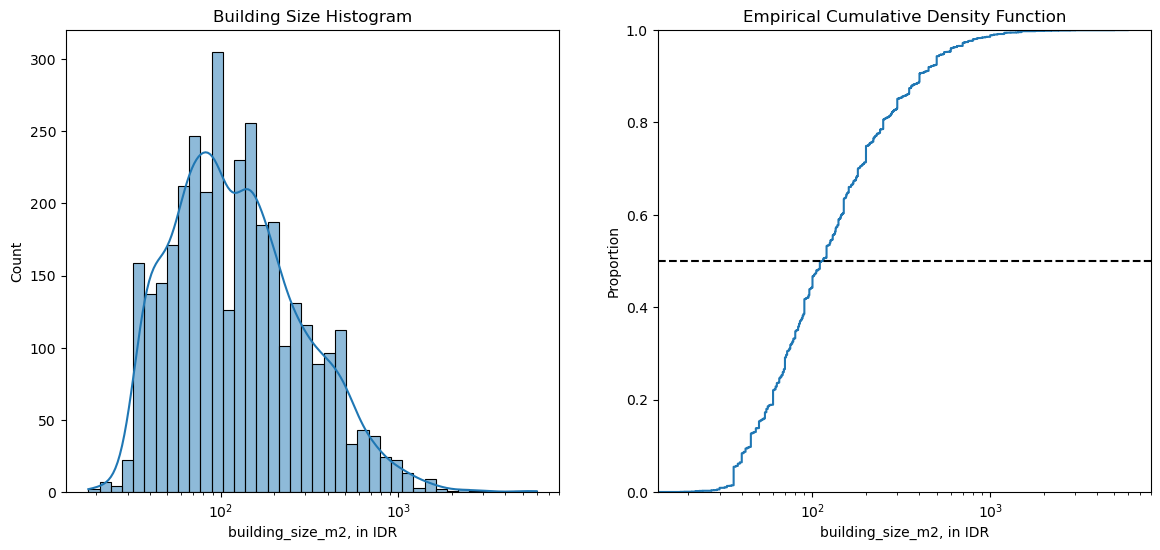

In [133]:
house_df = pd.read_csv('jabodetabek_house_data_prcsd.csv')
house_df.loc[house_df.city.str.contains('Jakarta'), 'city'] = ' DKI Jakarta'
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(
    data=house_df, x='building_size_m2', 
    kde=True, ax=ax[0], log_scale=True
    )
sns.ecdfplot(
    data=house_df, x='building_size_m2',ax=ax[1], log_scale=True
)
ax[0].set_title('Building Size Histogram')
ax[1].axhline(y=0.5, ls='--', color='black')
# ax[1].text(x=5*10e6, y=0.52, s=f'Proportion = 0.5,\nMedian={median:,.0f}')
ax[1].set_title('Empirical Cumulative Density Function')
for ax_ in ax:
    ax_.set_xlabel('building_size_m2, in IDR')

In [134]:
house_df[['building_size_m2']].describe(percentiles=[0.25, 0.5, 0.75]).T.rename(columns={'50%': 'median'})

count   mean    std   min   25%  median    75%      max
building_size_m2 3,443.00 186.96 249.52 18.00 67.00  113.00 205.00 6,000.00

Jika kami menafsirkan persentil 50% sebagai ukuran bangunan paling populer, kami menemukan bahwa luas sekitar 100 m2 cukup populer. Kisaran ukuran bangunan yang disarankan berdasarkan distribusi di atas dapat mencakup persentil 25% dan 75%, maka:
building size = [60m2, 200m2]

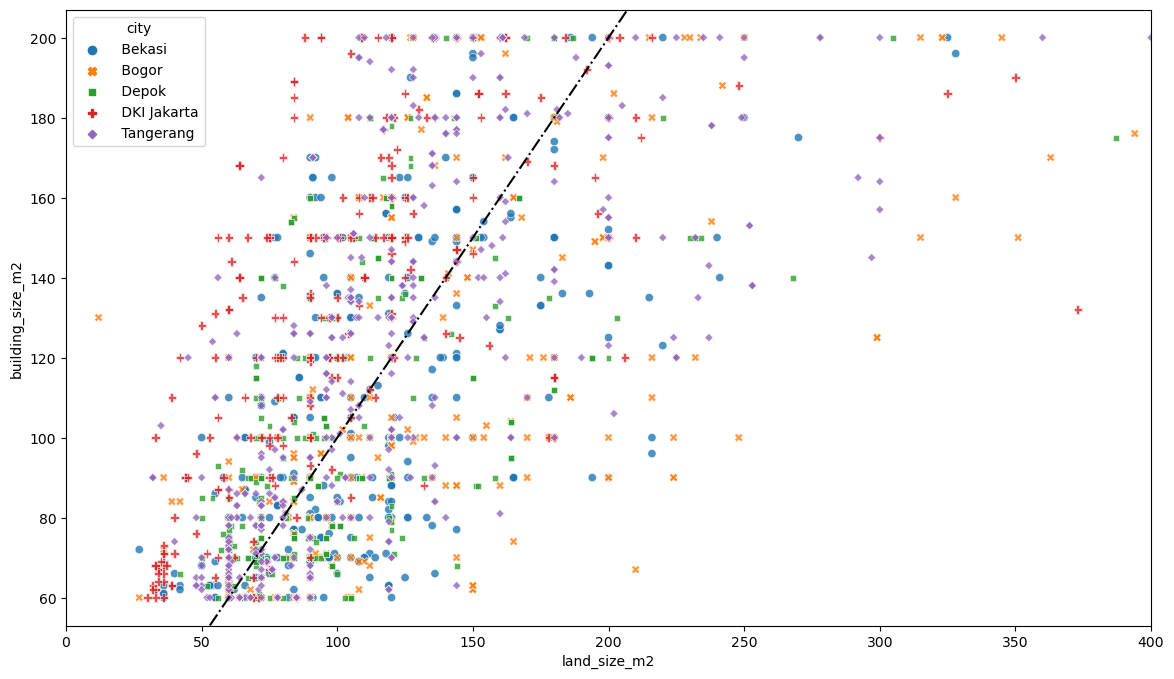

In [135]:
#Selain itu, kita mungkin dapat memeriksa pola ukuran bangunan untuk setiap lokasi menggunakan plot di bawah ini:

fig, ax = plt.subplots(figsize=(14, 8))
building_size_filter = \
    np.logical_and(
        (house_df.building_size_m2 >= 60),
        (house_df.building_size_m2 <= 200)
        )
sns.scatterplot(
    data=house_df[building_size_filter],
    x='land_size_m2', y='building_size_m2', hue='city', style='city',
    ax=ax, alpha=0.8
)
ax.axline(xy1=(60, 60), xy2=(200, 200), color='black', ls='-.')
ax.set_xlim(0, 400)
plt.show()

Garis diagonal berwarna hitam melambangkan building_size = land_size, jadi pengamatan yang diplot di atas garis ini mungkin menunjukkan bangunan dengan lebih dari 1 lantai.

Beberapa pola yang dapat dibedakan:
Ukuran bangunan < 100m2  cukup populer di Tangerang

Rumah yang memiliki lebih dari 1 lantai sedang populer di DKI Jakarta.

Mungkin rumah 1 lantai sedang populer di B
ogor.ogor.

In [136]:
pd.read_excel('unit_price.xlsx')

work_item          variable    price   unit
0             land prep      land_size_m2  1000000  rp/m2
1  house build, 1 floor  building_size_m2  4500000  rp/m2
2  house build, 2 floor  building_size_m2  6000000  rp/m2

In [137]:
pd.read_excel('land_price.xlsx')

no  location             city  price_per_m2  available_area_m2
0    1   bogor_1            Bogor       1200000                600
1    2   bogor_2            Bogor        900000                650
2    3   bogor_3            Bogor       2000000               1000
3    4   bogor_4            Bogor       1000000                800
4    5   bogor_5            Bogor       2000000                500
5    6   depok_1            Depok        800000                300
6    7   depok_2            Depok        700000                400
7    8   depok_3            Depok        900000                600
8    9   jakut_1    Jakarta Utara      10000000                100
9   10   jakut_2    Jakarta Utara       8000000                150
10  11  jaksel_1  Jakarta Selatan      14000000                 80
11  12    tang_1        Tangerang       3000000                600
12  13    tang_2        Tangerang       2000000                300
13  14    tang_3        Tangerang       1500000                500
14  15  bekasi_1           Bekasi       1300000                300


---

Mari kita telaah kode tersebut. Masalahnya bersifat kuadratik karena melibatkan perkalian variabel dan batasannya juga non-linear. Hal ini bisa membuatnya menjadi masalah non-convex dengan beberapa minimum lokal yang mungkin tidak sama dengan minimum global. Oleh karena itu, kami mengatur opsi `['limits/time']` untuk menghentikan proses setelah waktu tertentu berlalu. Solver mungkin memberikan sinyal jika menemukan solusi.

---

mengenai interval prediksi. Kami menggunakan model yang telah diselesaikan sebagai masukan. Kami menggunakan `confidence_level = 0,68` untuk mendapatkan interval standar deviasi rata-rata. Ingat bahwa ini mengacu pada deviasi rata-rata dari harga rumah yang tipikal. Penjelasan ini diilustrasikan dalam kode berikut:

---

In [138]:
import pyomo.environ as pyo
import logging

def get_solutions(x5, x6, x7, A, B, C):
    def price_func(model_):
        # Price func
        price = \
            2541730.38 * model_.x1 * model_.x2\
                + 12005662.20 * model_.x1 * model_.x3\
                + 1019125860.57 * model_.x1 * model_.x6\
                + 2091510620.53 * model_.x1 * model_.x7
        return price

    def cost_func(model_):
        cost = \
            model_.x1 * model_.x2 * model_.x5\
                + 1000000 * model_.x1 * model_.x2\
                + 3000000 * model_.x1 * model_.x3\
                + 1500000 * model_.x1 * model_.x3 * model_.x4
        return cost

    def objective_func(model_):
        return price_func(model_) - cost_func(model_)

    def cost_constraint(model_):
        return (cost_func(model_) <= model_.A)

    def price_constraint(model_):
        return ((price_func(model_) / model_.x1) <= model_.B)

    def area_constraint(model_):
        return ((model_.x1 * model_.x2) <= model_.C)

    def footprint_const(model_):
        return ((model_.x2 * (1 + 0.6 * (model_.x4 - 1)) / model_.x3) >= 1.5)

    variables = {
        'x1': pyo.Var(domain=pyo.NonNegativeIntegers, bounds=(1, None), initialize=np.random.randint(1, 20, size=1)[0]), 
        'x2': pyo.Var(domain=pyo.NonNegativeReals, initialize=np.random.uniform(1e-5, 300, size=1)[0]),
        'x3': pyo.Var(domain=pyo.NonNegativeReals, initialize=np.random.uniform(60, 200, size=1)[0], bounds=(60, 200)),
        'x4': pyo.Var(domain=pyo.NonNegativeIntegers, initialize=np.random.randint(1, 3, size=1)[0], bounds=(1, 2)),
        }
    parameters = {
        'x5': pyo.Param(domain=pyo.NonNegativeReals, initialize=x5),
        'x6': pyo.Param(domain=pyo.NonNegativeIntegers, initialize=x6),
        'x7': pyo.Param(domain=pyo.NonNegativeIntegers, initialize=x7),
        'A': pyo.Param(domain=pyo.NonNegativeReals, initialize=A),
        'B': pyo.Param(domain=pyo.NonNegativeReals, initialize=B), 
        'C': pyo.Param(domain=pyo.NonNegativeReals, initialize=C)
        }
    # setting up problem with pyomo API
    model = pyo.ConcreteModel()
    for var_key, var_value in variables.items():
        setattr(model, var_key, var_value)
    for param_key, param_value in parameters.items():
        setattr(model, param_key, param_value)
    model.objective = pyo.Objective(rule=objective_func, sense=pyo.maximize)
    model.cost_const = pyo.Constraint(rule=cost_constraint)
    model.price_const = pyo.Constraint(rule=price_constraint)
    model.area_const = pyo.Constraint(rule=area_constraint)
    model.foot_const = pyo.Constraint(rule=footprint_const)
    
    # output
    return model


In [139]:
def get_prediction_interval(model, quantile=None, confidence_level=0.68):
    fitted_regressor = load('fitted_regressor.joblib')
    x = np.array([model.x6(), model.x7(), model.x2(), model.x3()]).reshape(1, 4)
    z = np.array([model.x2(), model.x3()]).reshape(1, 2)
    sigma2 = fitted_regressor.variance_
    weight = fitted_regressor.get_sample_weight(z)
    sigma2i = sigma2 * np.power(weight, -1)
    if confidence_level:
        interval = norm.interval(confidence_level)
    else:
        interval = norm.ppf(quantile)
    resid_lower = np.sqrt(sigma2i) * interval[0]
    resid_upper = np.sqrt(sigma2i) * interval[1]
    mean = fitted_regressor.predict(x)
    pi_low = mean + resid_lower
    pi_high = mean + resid_upper
    return (pi_low[0], pi_high[0])

In [145]:
# creating the dataframe
input_to_optimize_df = pd.read_excel('land_price.xlsx')
input_to_optimize_df = input_to_optimize_df.assign(
    x5=lambda x: x.price_per_m2,
    x6=0, x7=0, x8 =0, x9 =0, x10 =0, x11=0,
    A=15000000000, B=5000000000, 
    C=lambda x: x.available_area_m2
    )
label = {
    'x6': 'Jakarta Selatan', 
    'x7' : 'Jakarta Utara',
    'x8' : 'Tangerang',
    'x9' : 'Bogor',
    'x10' : 'Depok',
    'x11' : 'Bekasi'
    }
for key, value in label.items():
    input_to_optimize_df.loc[
        input_to_optimize_df.city == value,
        key] = 1

input_to_optimize_df

no  location             city  price_per_m2  available_area_m2        x5  \
0    1   bogor_1            Bogor       1200000                600   1200000   
1    2   bogor_2            Bogor        900000                650    900000   
2    3   bogor_3            Bogor       2000000               1000   2000000   
3    4   bogor_4            Bogor       1000000                800   1000000   
4    5   bogor_5            Bogor       2000000                500   2000000   
5    6   depok_1            Depok        800000                300    800000   
6    7   depok_2            Depok        700000                400    700000   
7    8   depok_3            Depok        900000                600    900000   
8    9   jakut_1    Jakarta Utara      10000000                100  10000000   
9   10   jakut_2    Jakarta Utara       8000000                150   8000000   
10  11  jaksel_1  Jakarta Selatan      14000000                 80  14000000   
11  12    tang_1        Tangerang       3000000                600   3000000   
12  13    tang_2        Tangerang       2000000                300   2000000   
13  14    tang_3        Tangerang       1500000                500   1500000   
14  15  bekasi_1           Bekasi       1300000                300   1300000   

    x6  x7  x8  x9  x10  x11            A           B     C  
0    0   0   0   1    0    0  15000000000  5000000000   600  
1    0   0   0   1    0    0  15000000000  5000000000   650  
2    0   0   0   1    0    0  15000000000  5000000000  1000  
3    0   0   0   1    0    0  15000000000  5000000000   800  
4    0   0   0   1    0    0  15000000000  5000000000   500  
5    0   0   0   0    1    0  15000000000  5000000000   300  
6    0   0   0   0    1    0  15000000000  5000000000   400  
7    0   0   0   0    1    0  15000000000  5000000000   600  
8    0   1   0   0    0    0  15000000000  5000000000   100  
9    0   1   0   0    0    0  15000000000  5000000000   150  
10   1   0   0   0    0    0  15000000000  5000000000    80  
11   0   0   1   0    0    0  15000000000  5000000000   600  
12   0   0   1   0    0    0  15000000000  5000000000   300  
13   0   0   1   0    0    0  15000000000  5000000000   500  
14   0   0   0   0    0    1  15000000000  5000000000   300

In [143]:
def optimize_and_get_results(input_to_optimize_df):
    location_tag = input_to_optimize_df.location.values
    total_cost = []
    net_return = []
    roi = []
    house_nos = []
    cost_per_house = []
    house_price = []
    house_price_lower = []
    house_price_upper = []
    avail_land_size = []
    total_land_occupied = []
    land_size_per_house_m2 = []
    house_size_m2 = []
    floor_nos_each_house = []
    
    for index, row in input_to_optimize_df.iterrows():
        x5 = row['x5']
        x6 = row['x6']
        x7 = row['x7']
        A = row['A']
        B = row['B']
        C = row['C']
        solution = get_solutions(x5, x6, x7, A, B, C)
        pi_low, pi_high = get_prediction_interval(solution)
        
        total_cost.append(solution.cost_const())
        net_return.append(solution.objective())
        roi.append(solution.objective() / solution.cost_const())
        house_nos.append(solution.x1())
        cost_per_house.append(solution.cost_const() / solution.x1())
        house_price.append(solution.price_const())
        house_price_lower.append(pi_low)
        house_price_upper.append(pi_high)
        avail_land_size.append(solution.C())
        total_land_occupied.append(solution.area_const())
        land_size_per_house_m2.append(solution.x2())
        house_size_m2.append(solution.x3())
        floor_nos_each_house.append(solution.x4())
    
    optimization_result_df = pd.DataFrame({
        'location_tag': location_tag,
        'total_cost': total_cost,
        'net_return': net_return,
        'roi': roi,
        'house_nos': house_nos,
        'cost_per_house': cost_per_house,
        'house_price': house_price,
        'house_price_lower': house_price_lower,
        'house_price_upper': house_price_upper,
        'avail_land_m2': avail_land_size,
        'total_land_occupied': total_land_occupied,
        'land_size_per_house_m2': land_size_per_house_m2,
        'house_size_m2': house_size_m2,
        'floor_nos_each_house': floor_nos_each_house
    })
    
    return optimization_result_df


In [144]:
# Memanggil fungsi optimize_and_get_results
optimization_result_df = optimize_and_get_results(input_to_optimize_df)

# Menampilkan hasil output
print(optimization_result_df)


   location_tag        total_cost        net_return   roi  house_nos  \
0       bogor_1 11,170,534,455.57 10,990,603,877.69  0.98         17   
1       bogor_2 23,092,234,091.58 18,458,946,864.90  0.80         17   
2       bogor_3 26,777,208,591.93 24,550,321,324.68  0.92         19   
3       bogor_4  3,701,797,806.81  3,676,556,687.05  0.99          6   
4       bogor_5 13,399,191,069.30  9,836,381,883.63  0.73         16   
5       depok_1  2,759,445,298.93  3,734,366,139.81  1.35          6   
6       depok_2 20,685,347,587.37 16,886,378,093.68  0.82         17   
7       depok_3  2,974,271,878.78  3,954,001,674.08  1.33          5   
8       jakut_1 38,214,829,448.70 11,226,912,429.92  0.29         10   
9       jakut_2 11,624,028,617.46 12,255,433,236.15  1.05          5   
10     jaksel_1  9,906,487,833.65 -2,876,779,538.38 -0.29          2   
11       tang_1 22,132,935,448.35 10,207,214,465.07  0.46         11   
12       tang_2  8,644,540,622.48  6,630,724,680.56  0.77       

C:\Users\HANIN\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning:

Trying to unpickle estimator LinearRegression from version 1.2.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

C:\Users\HANIN\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning:

Trying to unpickle estimator LinearRegression from version 1.2.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

C:\Users\HANIN\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning:

Trying to unpickle estimator LinearRegression from version 1.2.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please

## KESIMPULAN
Menurut hasil optimisasi di atas, dapat dilihat bahwa pengoptimal lebih memilih untuk memaksimalkan jumlah rumah yang diproduksi, yang mencoba untuk mengisi seluruh luas tanah yang tersedia. Menariknya, ini juga menangkap potensi keuntungan dari area berukuran kecil di Jakarta Utara mengingat harga rumah yang diprediksi.

Batas anggaran yang ditentukan tampaknya agak berlebihan jika kita mempertimbangkan spesifikasi tanah dari lokasi yang tersedia. Hasil optimisasi di atas telah menemukan keuntungan maksimum dengan total biaya produksi hanya [nilai biaya].

Interval harga bawah dan atas di atas menjelaskan deviasi rata-rata harga rumah dari harga rata-ratanya, untuk luas tanah dan ukuran bangunan yang ditentukan. Ambil contoh harga rendah di bogor_4, kita dapat menafsirkan bahwa sebagian besar pemilik rumah setuju bahwa rumah tipe-60 di Bogor dengan harga [harga rendah] berada di bawah rata-rata. Harga rendah ini karena dataset kami berisi harga rumah bekas. Tetapi perhatikan dengan seksama bahwa ini di bawah biaya produksi.

Perhatikan juga bahwa jika kita memilih model yang bias, yang memperkirakan harga rumah terlalu tinggi dalam kasus kita, kita mungkin akan memperkirakan keuntungan yang terlalu tinggi dan pengoptimal akan memilih lokasi potensial yang salah. Untungnya kita menghindari situasi itu dengan memperhatikan karakteristik dataset kami dan menerapkan model yang sesuai.

Tentu saja, kita dapat memperluas masalah kita untuk memecahkan sebanyak mungkin masalah yang masuk akal! Beberapa contoh menarik:

- Menambahkan tujuan baru, katakanlah mencari solusi untuk juga meminimalkan durasi konstruksi, yang dapat menjadi fungsi dari jumlah rumah dan ukuran rumah. Melakukan masalah dengan beberapa tujuan ini mungkin membutuhkan langkah atau metode analisis lebih lanjut.

- Beberapa penduduk perumahan mungkin perlu menyediakan variasi ukuran rumah. Masalahnya bisa menjadi mencari kombinasi angka untuk setiap ukuran rumah yang memaksimalkan pendudukan tanah dan keuntungan.

Penutup
Kesimpulan
Analisis di atas menunjukkan bahwa dataset kami dapat digeneralisasikan dengan menggunakan Model Regresi Linier Berganda, meskipun Regresi Linier Sederhana sebagian besar memberikan hasil yang sebanding.

Untuk data heteroskedastik, Least Square Terbobot terbukti lebih unggul dari Least Square biasa untuk memperkirakan koefisien slope. Kita juga harus memilih metode inferensi yang sesuai untuk jenis data ini.

Tujuan model linier telah ditunjukkan dalam fungsi optimasi yang dijelaskan sebelumnya. Proses iteratif dapat dilakukan secara efisien. Perubahan spesifikasi sedikit, yang umum dalam aktivitas proyek, akan mempengaruhi waktu pengembangan yang tidak signifikan dan hasilnya dapat diperoleh kembali dengan cepat.

Berdasarkan hasil output yang Anda berikan, terdapat beberapa informasi terkait optimasi lahan properti di beberapa lokasi di Bogor:

1. **Total Biaya (Total Cost)**: Total biaya untuk pengembangan properti di setiap lokasi.
2. **Total Pengembalian Bersih (Net Return)**: Total pengembalian yang diperoleh dari investasi pada properti di setiap lokasi.
3. **Return on Investment (ROI)**: Rasio pengembalian investasi, dihitung sebagai Total Pengembalian Bersih dibagi Total Biaya. Semakin tinggi nilainya, semakin baik hasil investasinya.
4. **Jumlah Rumah (House Nos)**: Jumlah rumah yang dapat dibangun di setiap lokasi.
5. **Biaya per Rumah (Cost per House)**: Rata-rata biaya untuk membangun satu rumah di setiap lokasi.
6. **Harga Rumah (House Price)**: Harga jual prediksi untuk setiap rumah di setiap lokasi.
7. **Interval Harga Rumah (House Price Lower & Upper)**: Interval prediksi untuk harga jual rumah di setiap lokasi.
8. **Luas Lahan Tersedia (Available Land M2)**: Luas lahan yang tersedia untuk pengembangan properti di setiap lokasi.
9. **Total Luas Lahan yang Terpakai (Total Land Occupied)**: Total luas lahan yang digunakan untuk pengembangan properti di setiap lokasi.
10. **Luas Lahan per Rumah (Land Size per House M2)**: Rata-rata luas lahan yang dialokasikan untuk setiap rumah di setiap lokasi.
11. **Luas Bangunan Rumah (House Size M2)**: Rata-rata luas bangunan rumah yang direncanakan di setiap lokasi.
12. **Jumlah Lantai tiap Rumah (Floor Nos Each House)**: Rata-rata jumlah lantai yang direncanakan untuk setiap rumah di setiap lokasi.

Kesimpulannya, berdasarkan hasil optimasi, Anda dapat melihat performa investasi potensial di setiap lokasi di Bogor. Anda dapat mengevaluasi informasi ini lebih lanjut untuk membuat keputusan yang lebih baik dalam pengembangan properti di masa depan.


---
ROI (Return on Investment) adalah sebuah metrik yang digunakan untuk mengukur efisiensi atau keuntungan suatu investasi dengan membandingkan keuntungan bersih yang diperoleh dari investasi tersebut dengan total biaya investasi. Semakin tinggi ROI, semakin efisien investasi tersebut dalam menghasilkan keuntungan.

Jika Anda ingin memilih properti yang paling baik berdasarkan ROI dan faktor biaya lainnya, maka pilihan terbaik adalah properti yang memiliki ROI tinggi dan biaya investasi yang relatif rendah. Dengan kata lain, Anda mencari properti yang memberikan keuntungan yang tinggi relatif terhadap biaya investasi yang dikeluarkan.

Dalam konteks ini, properti dengan ROI tinggi dan biaya investasi rendah akan menjadi pilihan yang paling baik. Misalnya, jika ada properti dengan ROI tinggi tetapi biaya investasi yang juga tinggi, maka meskipun ROI tinggi, potensi keuntungannya mungkin tidak sebanding dengan risiko atau investasi yang dikeluarkan. Sebaliknya, properti dengan ROI yang cukup tinggi dan biaya investasi yang relatif rendah akan memberikan potensi keuntungan yang lebih besar.

Jadi, untuk memilih properti yang paling baik berdasarkan ROI dan faktor biaya lainnya, carilah properti yang memiliki kombinasi ROI tinggi dan biaya investasi yang rendah.

---
Tujuan keseluruhan proses ini adalah untuk melakukan optimasi pembangunan rumah di berbagai lokasi berdasarkan data harga tanah dan ukuran bangunan, serta untuk memaksimalkan keuntungan dari pembangunan tersebut.
Inti Keseluruhan
Proses ini memberikan panduan untuk memaksimalkan keuntungan dari pembangunan rumah di berbagai lokasi dengan mempertimbangkan biaya tanah, ukuran bangunan, dan harga jual. Output akhir membantu dalam pengambilan keputusan investasi yang lebih tepat dengan memberikan metrik-metrik penting dari hasil optimasi.

---
Berdasarkan tabel hasil optimasi, kita bisa menentukan lokasi yang paling bagus untuk investasi dengan mempertimbangkan beberapa metrik, seperti ROI (Return on Investment), total keuntungan bersih (net return), dan biaya per rumah (cost per house). Berikut adalah analisis beberapa metrik kunci:

1. **ROI (Return on Investment):**
   - Lokasi dengan ROI tertinggi adalah **Depok 1** dengan ROI sebesar 1.35.
   - Lokasi dengan ROI tinggi lainnya adalah **Depok 3** (1.33) dan **Jakut 2** (1.05).

2. **Total Keuntungan Bersih (Net Return):**
   - Lokasi dengan keuntungan bersih tertinggi adalah **Bogor 3** dengan net return sebesar 24,550,321,324.68.
   - Lokasi lain dengan keuntungan bersih tinggi adalah **Bogor 2** (18,458,946,864.90) dan **Jakut 1** (11,226,912,429.92).

3. **Biaya Per Rumah (Cost per House):**
   - Lokasi dengan biaya per rumah terendah adalah **Depok 1** dengan biaya per rumah sebesar 459,907,549.82.
   - Lokasi dengan biaya per rumah rendah lainnya adalah **Depok 3** (594,854,375.76) dan **Bogor 4** (616,966,301.13).

Jika kita mempertimbangkan ROI sebagai faktor utama untuk investasi yang bagus, maka **Depok 1** adalah lokasi terbaik untuk investasi. Namun, jika kita juga mempertimbangkan total keuntungan bersih dan biaya per rumah, **Bogor 3** dan **Bogor 2** juga menjadi lokasi yang sangat menarik untuk investasi.

### Rekomendasi Akhir:
1. **Depok 1** - ROI tinggi dan biaya per rumah terendah.
2. **Bogor 3** - Keuntungan bersih tertinggi dan ROI yang cukup tinggi.
3. **Depok 3** - ROI tinggi dan biaya per rumah rendah.

### Analisis Tambahan:
- **Jaksel 1** memiliki ROI negatif (-0.29) dan total keuntungan bersih negatif, menunjukkan bahwa lokasi ini tidak baik untuk investasi.
- **Jakut 1** memiliki keuntungan bersih tinggi tetapi ROI rendah (0.29), menunjukkan risiko yang lebih tinggi.

Dengan demikian, **Depok 1** adalah pilihan terbaik secara keseluruhan untuk investasi berdasarkan analisis ini.